In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set styles for visualizations
sns.set(style="darkgrid")

# Show that setup is complete
print("Setup complete!")


Setup complete!


In [2]:
import os
print(os.getcwd())


C:\Users\AngelaC


In [18]:
# Load the datasets
title_basics = pd.read_csv("title.basics.csv")
title_principals = pd.read_csv("title.principals.csv")
movie_gross = pd.read_csv("bom.movie_gross.csv")

# Display first few rows
title_basics.head()
title_principals.head()
movie_gross.head()


title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010

In [19]:
title_basics.columns
title_principals.columns
movie_gross.columns


Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [20]:
title_basics.dtypes
title_principals.dtypes
movie_gross.dtypes


title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [23]:
title_basics.describe()  # For numeric columns like revenue, year, etc.

start_year  runtime_minutes
count  146144.000000    114405.000000
mean     2014.621798        86.187247
std         2.733583       166.360590
min      2010.000000         1.000000
25%      2012.000000        70.000000
50%      2015.000000        87.000000
75%      2017.000000        99.000000
max      2115.000000     51420.000000

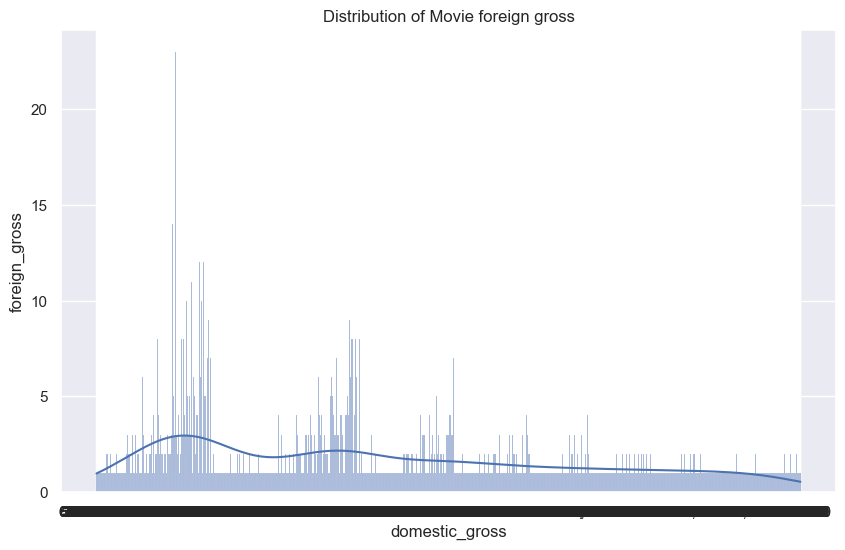

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(movie_gross['foreign_gross'], bins=30, kde=True)
plt.title('Distribution of Movie foreign gross')
plt.xlabel('domestic_gross')
plt.ylabel('foreign_gross')
plt.show()


In [28]:
# Check the columns in the dataset
print(movie_gross.columns)


Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')


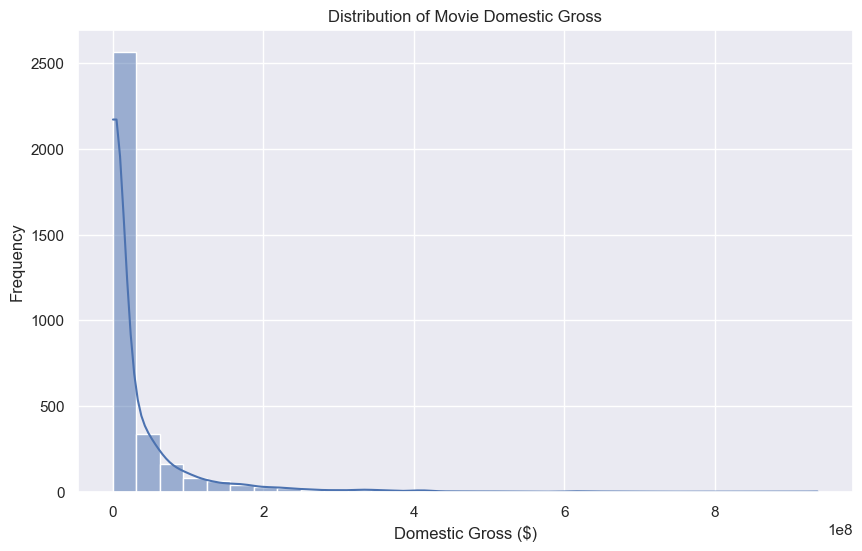

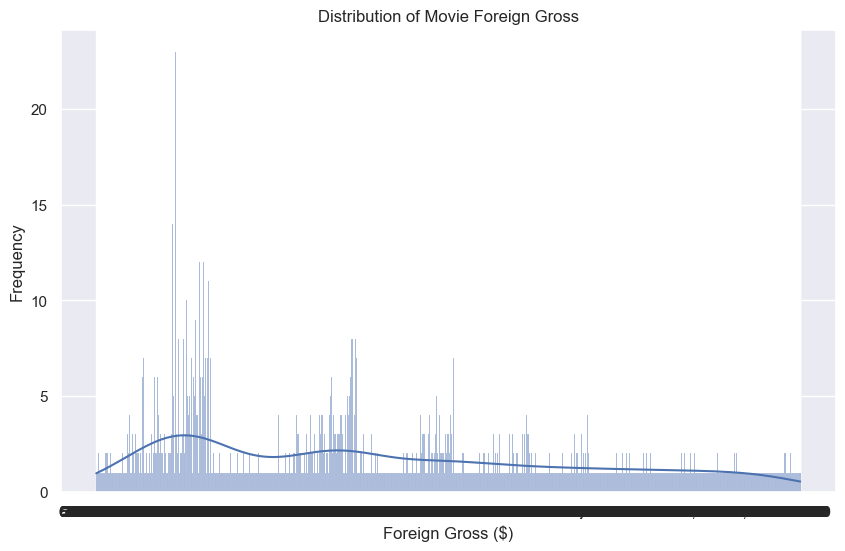

In [29]:
# Plot distribution of domestic_gross
plt.figure(figsize=(10, 6))
sns.histplot(movie_gross['domestic_gross'], bins=30, kde=True)
plt.title('Distribution of Movie Domestic Gross')
plt.xlabel('Domestic Gross ($)')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of foreign_gross
plt.figure(figsize=(10, 6))
sns.histplot(movie_gross['foreign_gross'], bins=30, kde=True)
plt.title('Distribution of Movie Foreign Gross')
plt.xlabel('Foreign Gross ($)')
plt.ylabel('Frequency')
plt.show()

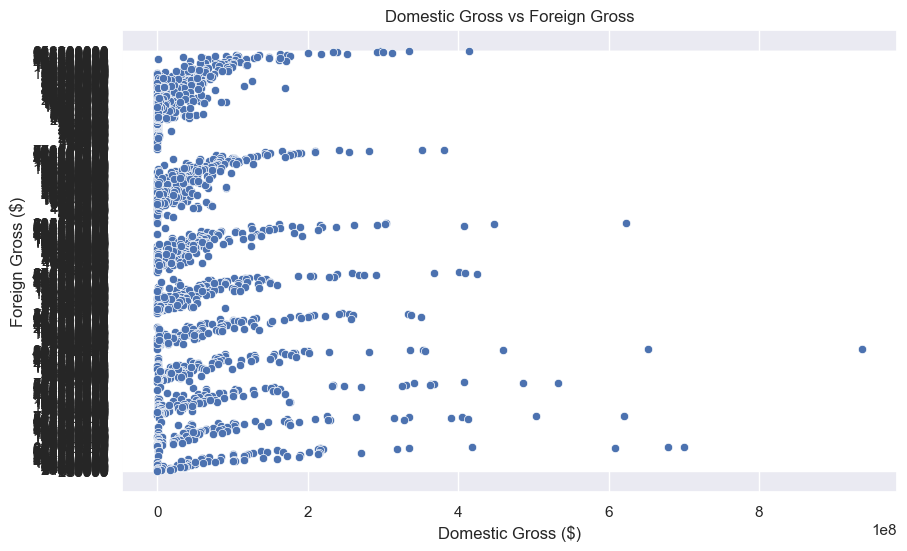

In [30]:
# Plot the relationship between domestic and foreign gross revenues
plt.figure(figsize=(10, 6))
sns.scatterplot(x=movie_gross['domestic_gross'], y=movie_gross['foreign_gross'])
plt.title('Domestic Gross vs Foreign Gross')
plt.xlabel('Domestic Gross ($)')
plt.ylabel('Foreign Gross ($)')
plt.show()

<Figure size 1000x600 with 0 Axes>

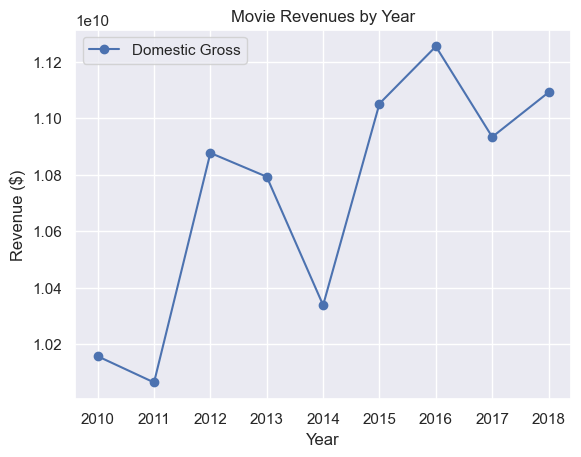

In [31]:
# Group by year and sum the domestic and foreign gross revenues
revenue_by_year = movie_gross.groupby('year')[['domestic_gross', 'foreign_gross']].sum()

# Plot the revenue trends by year
plt.figure(figsize=(10, 6))
revenue_by_year.plot(kind='line', marker='o')
plt.title('Movie Revenues by Year')
plt.xlabel('Year')
plt.ylabel('Revenue ($)')
plt.legend(['Domestic Gross', 'Foreign Gross'])
plt.show()


       domestic_gross         year
count    3.359000e+03  3387.000000
mean     2.874585e+07  2013.958075
std      6.698250e+07     2.478141
min      1.000000e+02  2010.000000
25%      1.200000e+05  2012.000000
50%      1.400000e+06  2014.000000
75%      2.790000e+07  2016.000000
max      9.367000e+08  2018.000000


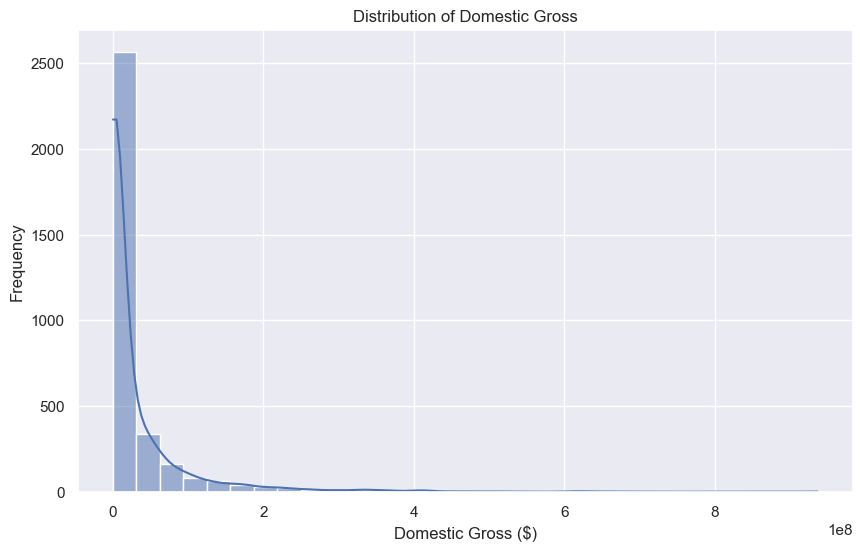

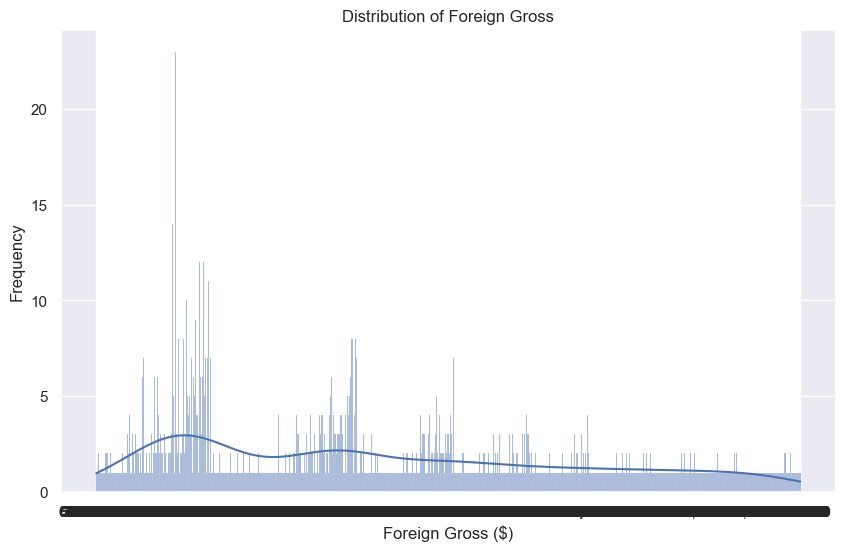

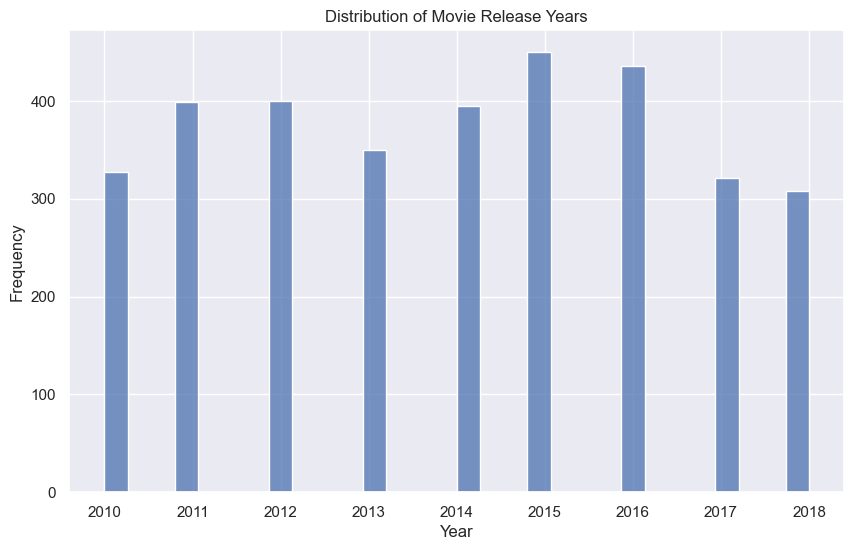

In [35]:
# Summary statistics for the relevant columns
summary_stats = movie_gross[['domestic_gross', 'foreign_gross', 'year']].describe()
print(summary_stats)

# Visualize distribution of domestic_gross
plt.figure(figsize=(10, 6))
sns.histplot(movie_gross['domestic_gross'], bins=30, kde=True)
plt.title('Distribution of Domestic Gross')
plt.xlabel('Domestic Gross ($)')
plt.ylabel('Frequency')
plt.show()

# Visualize distribution of foreign_gross
plt.figure(figsize=(10, 6))
sns.histplot(movie_gross['foreign_gross'], bins=30, kde=True)
plt.title('Distribution of Foreign Gross')
plt.xlabel('Foreign Gross ($)')
plt.ylabel('Frequency')
plt.show()

# Visualize distribution of year (released year)
plt.figure(figsize=(10, 6))
sns.histplot(movie_gross['year'], bins=30, kde=False)
plt.title('Distribution of Movie Release Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()


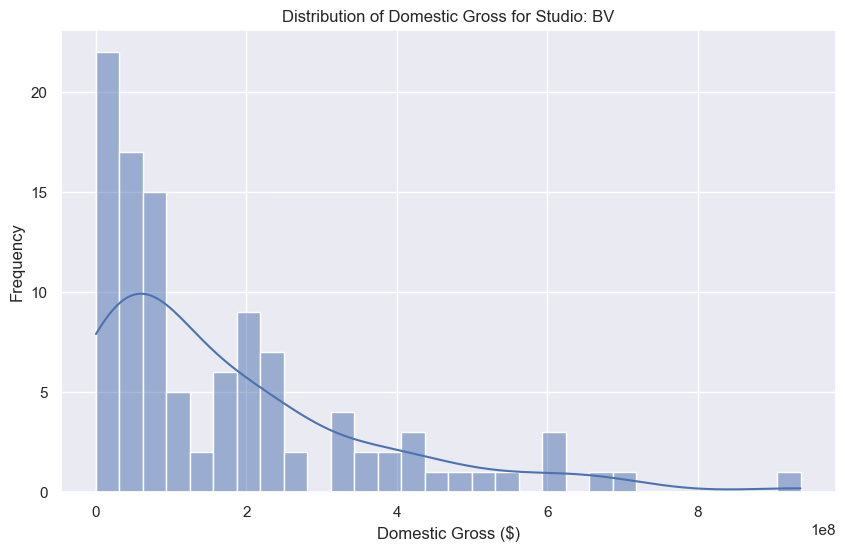

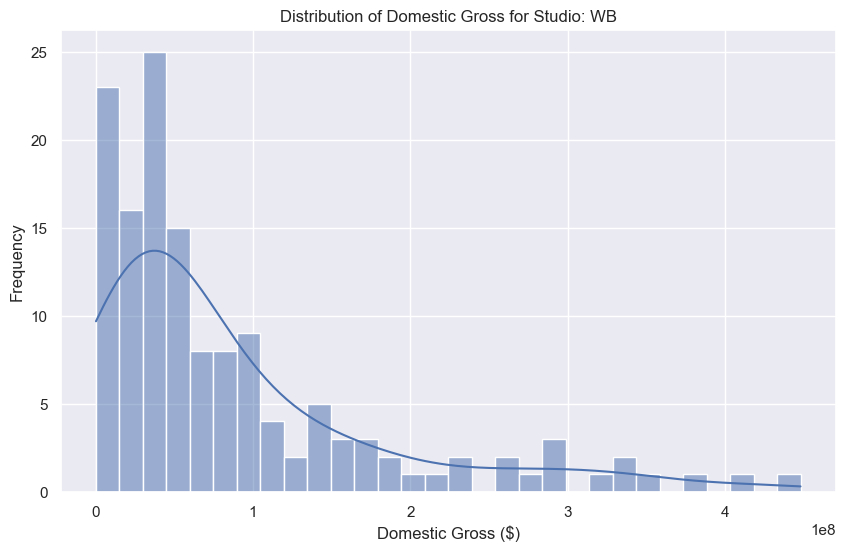

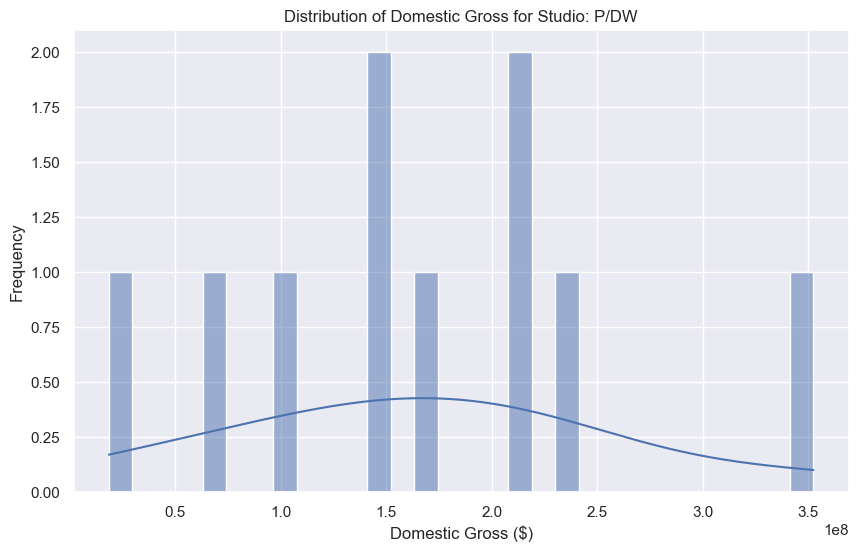

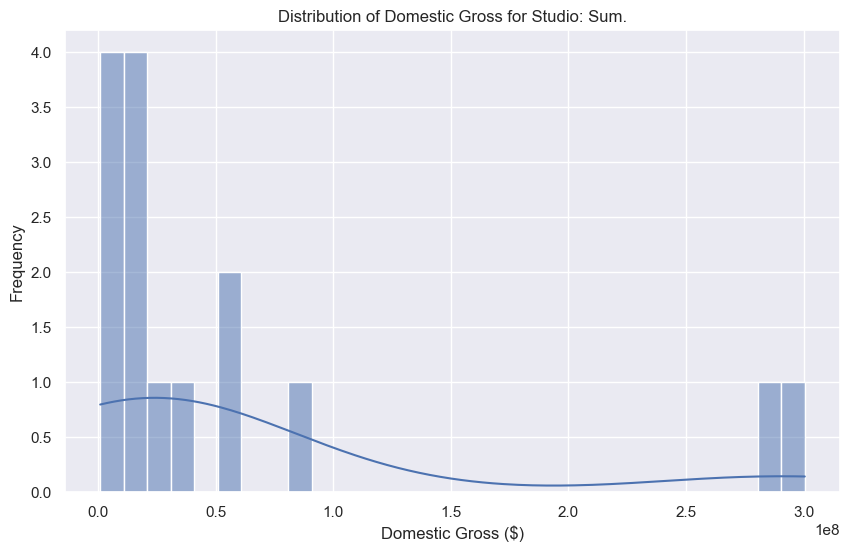

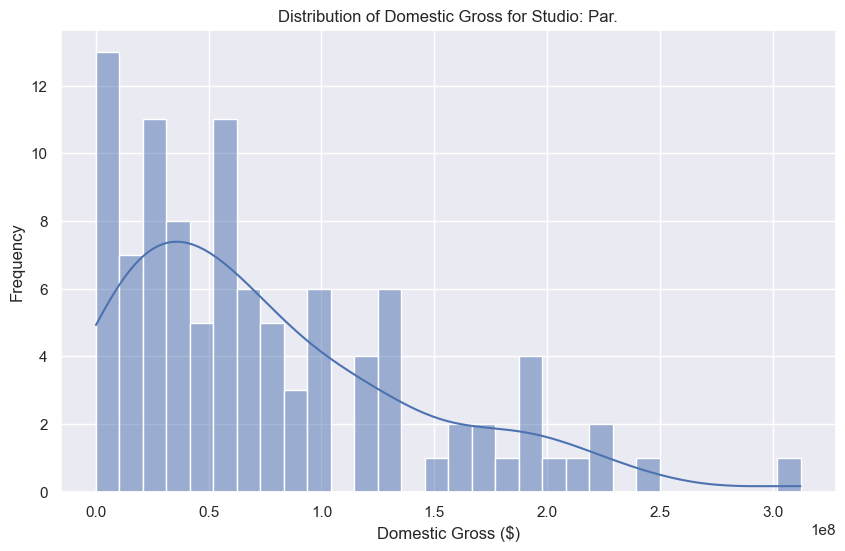

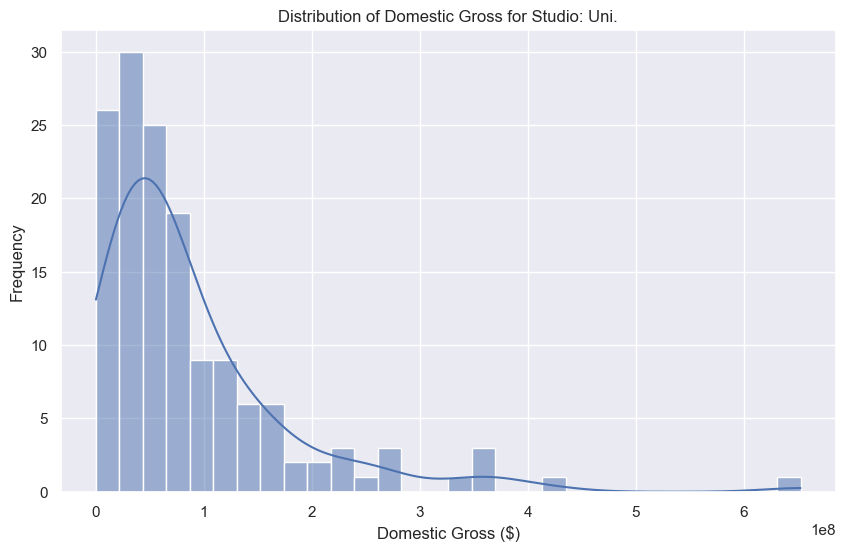

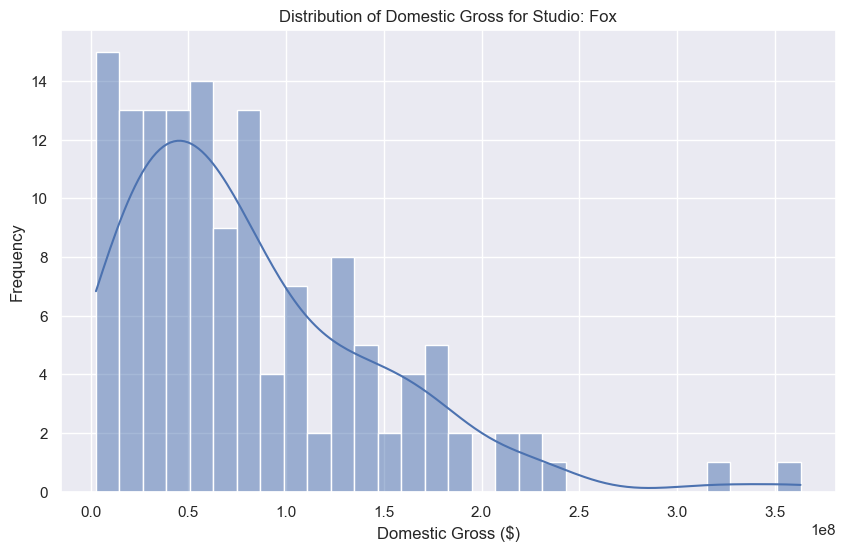

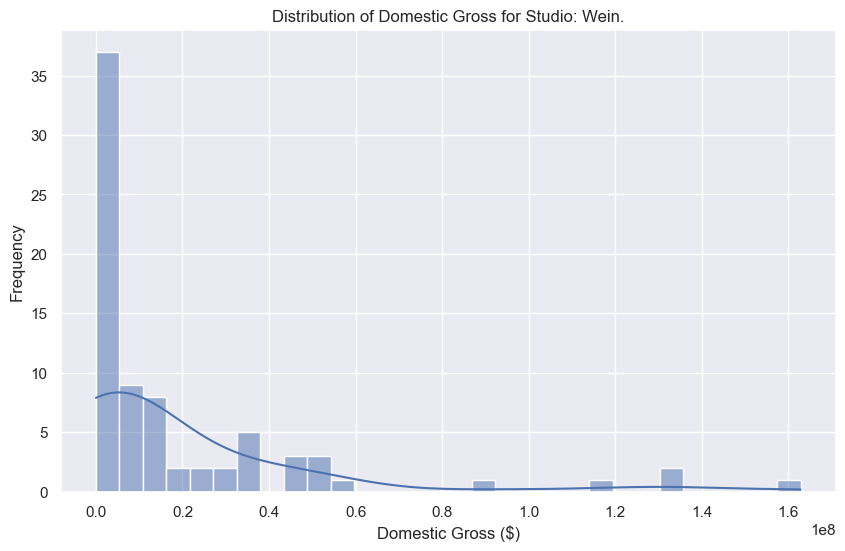

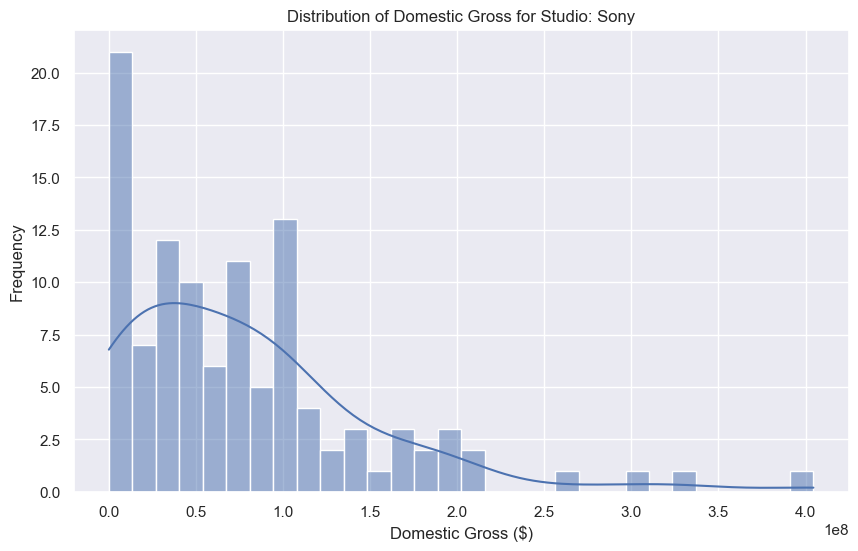

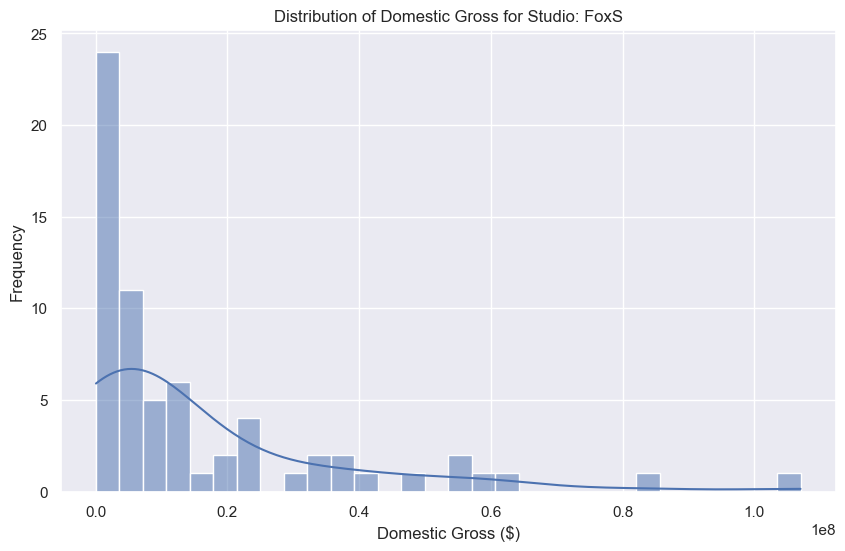

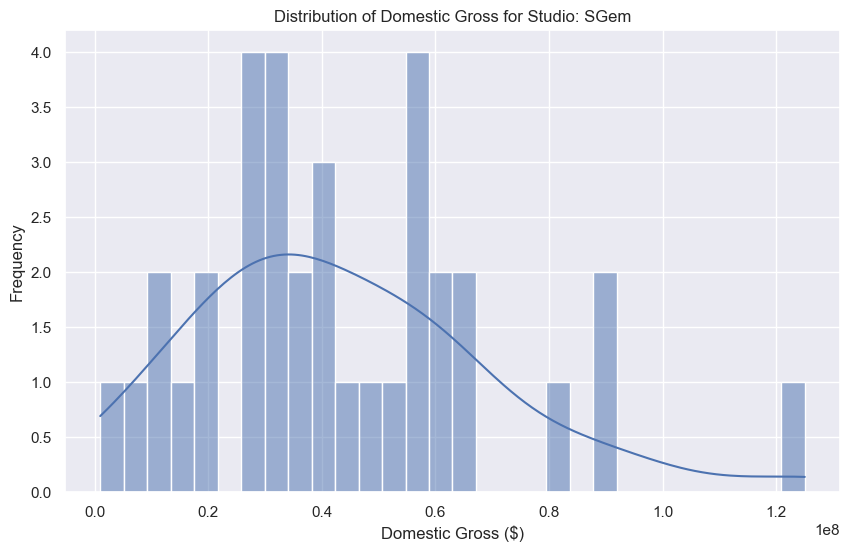

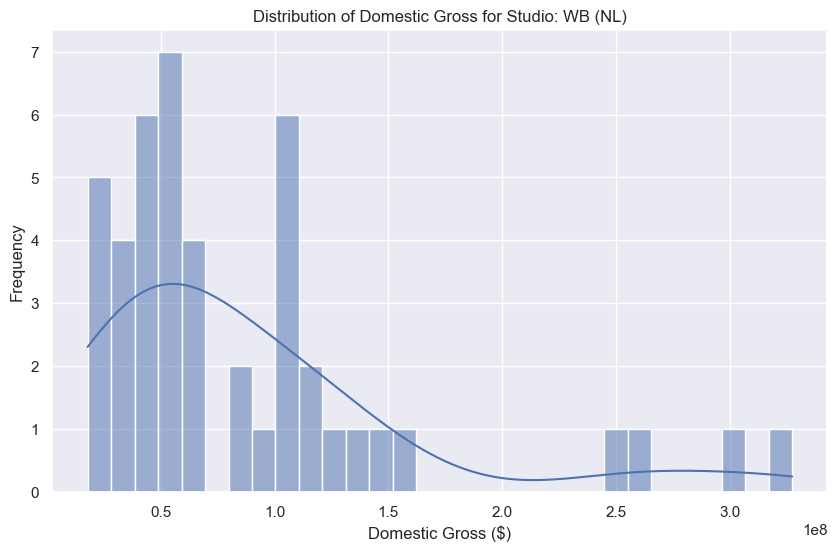

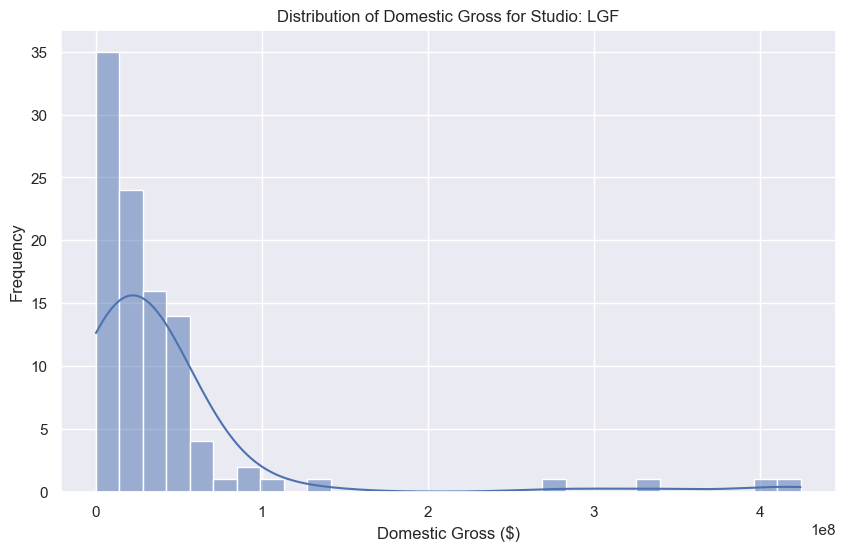

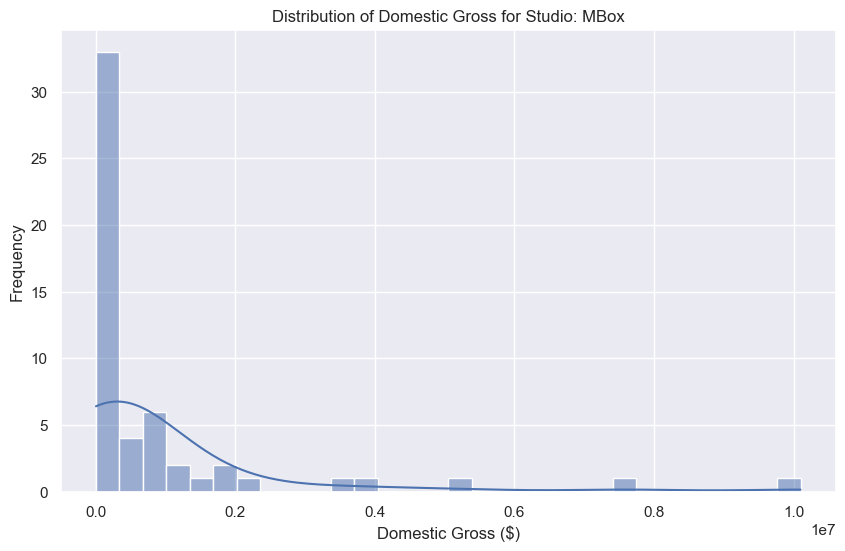

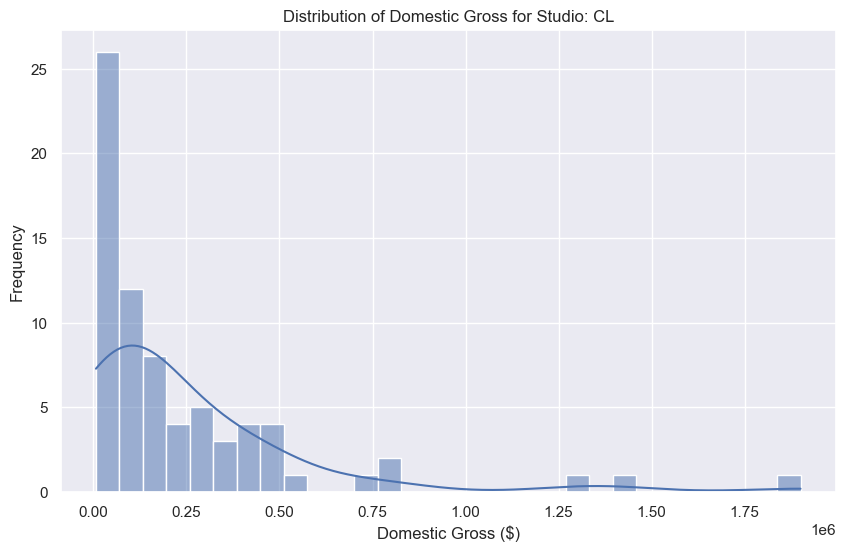

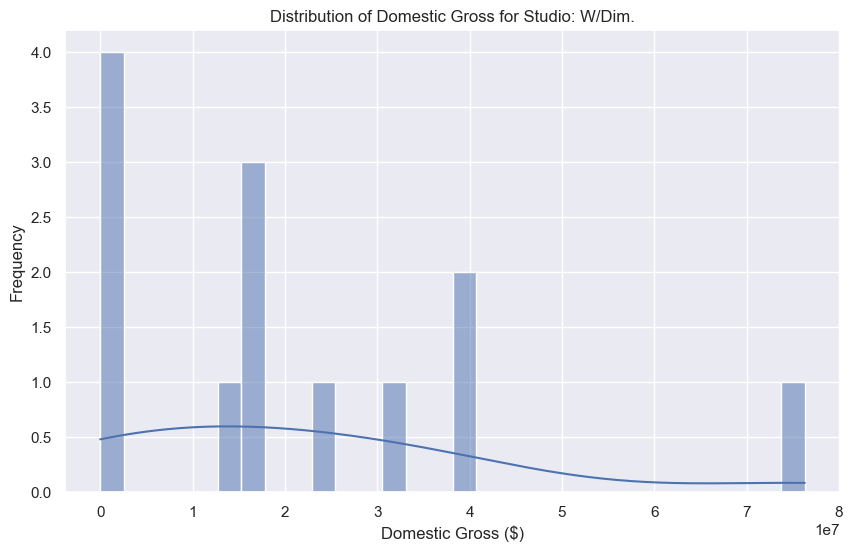

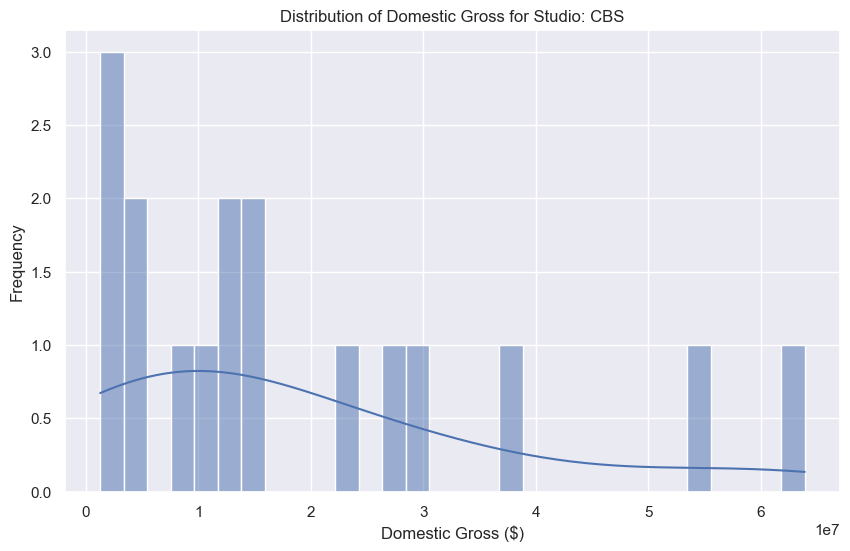

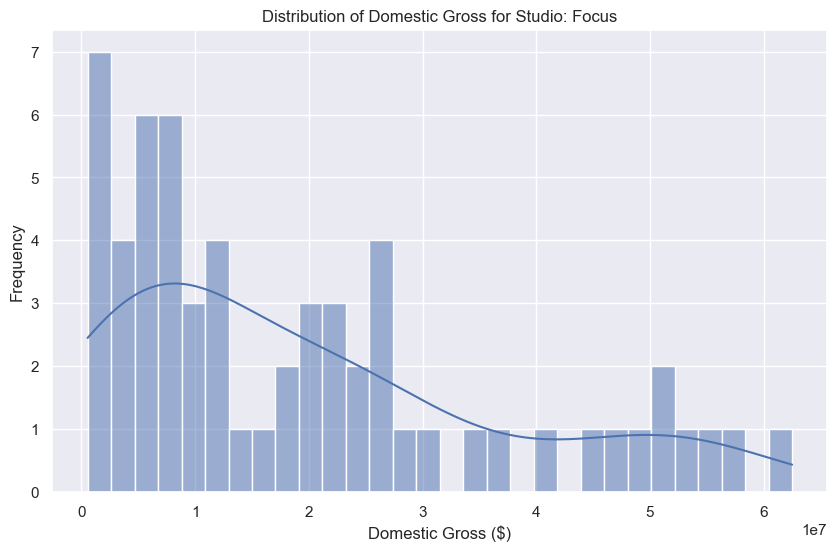

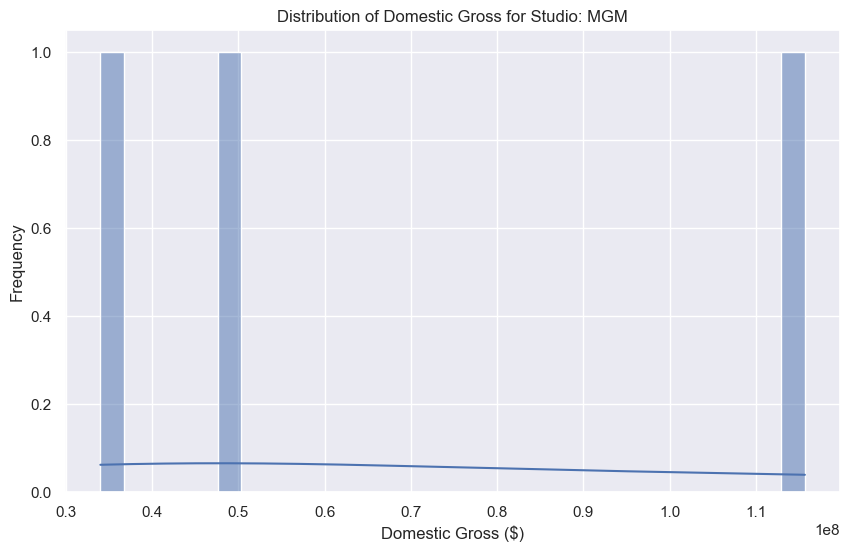

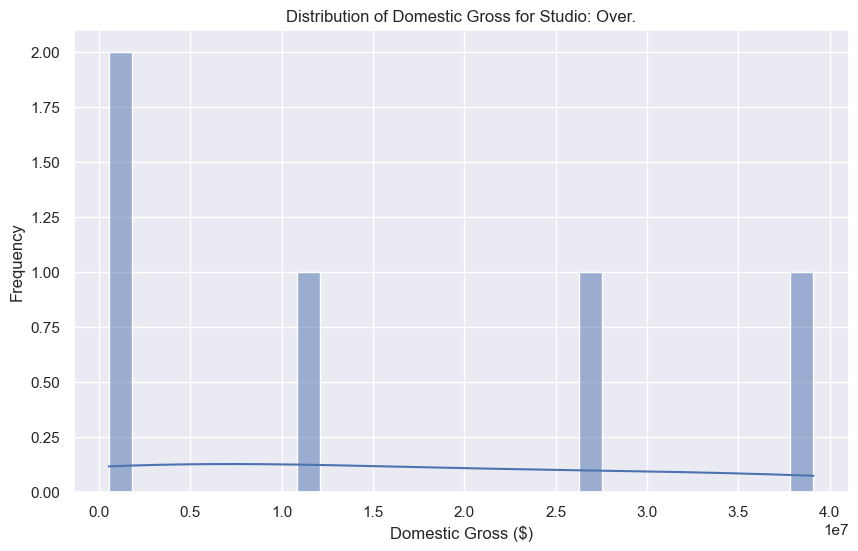

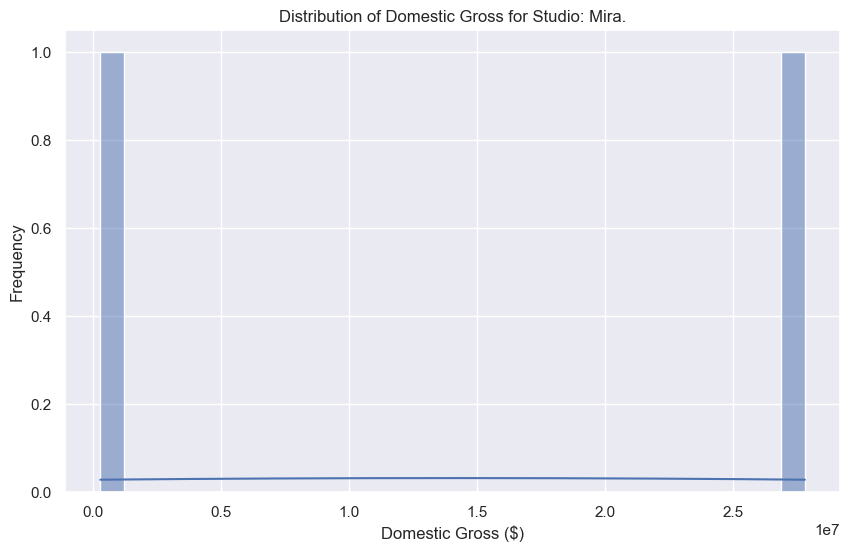

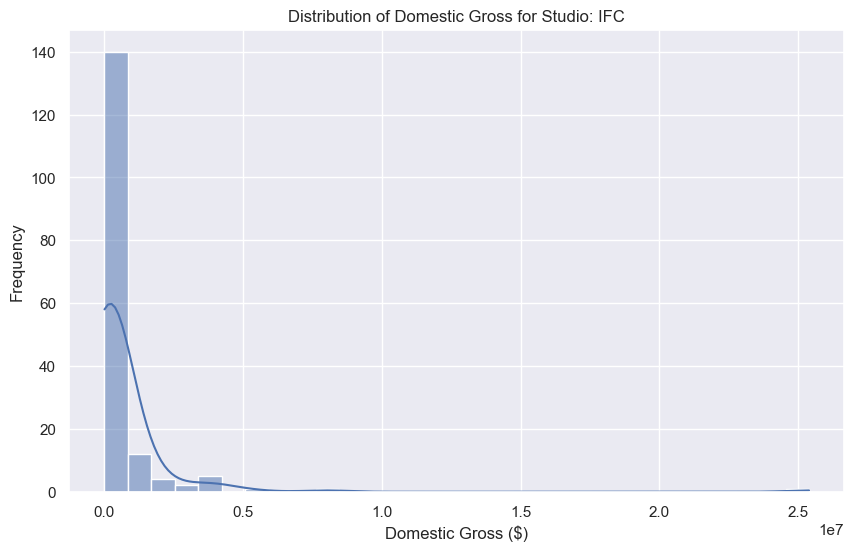

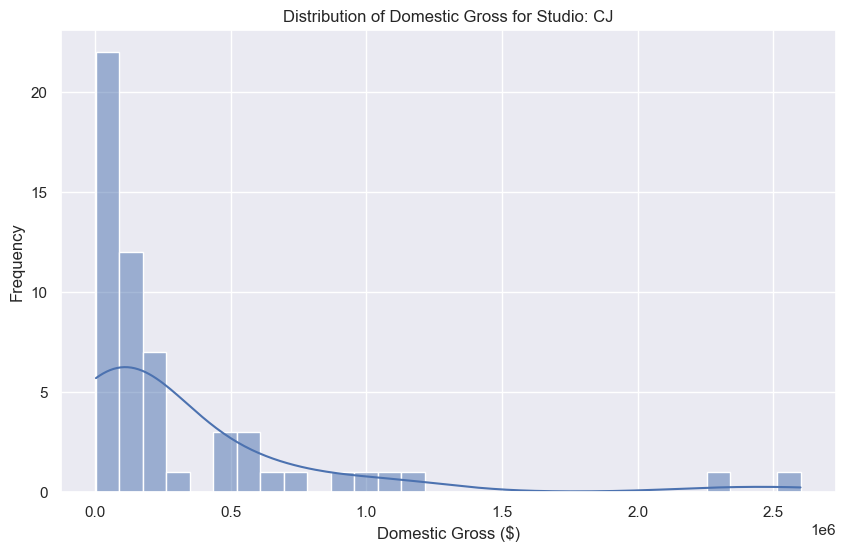

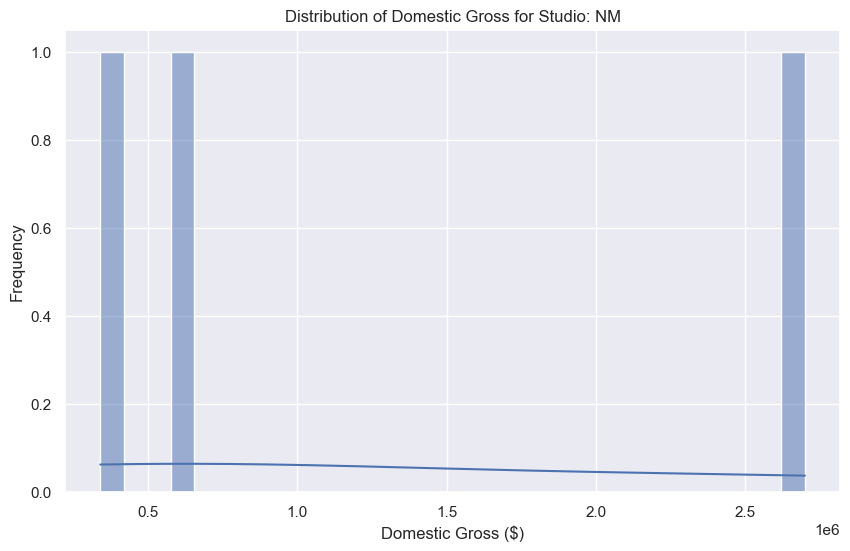

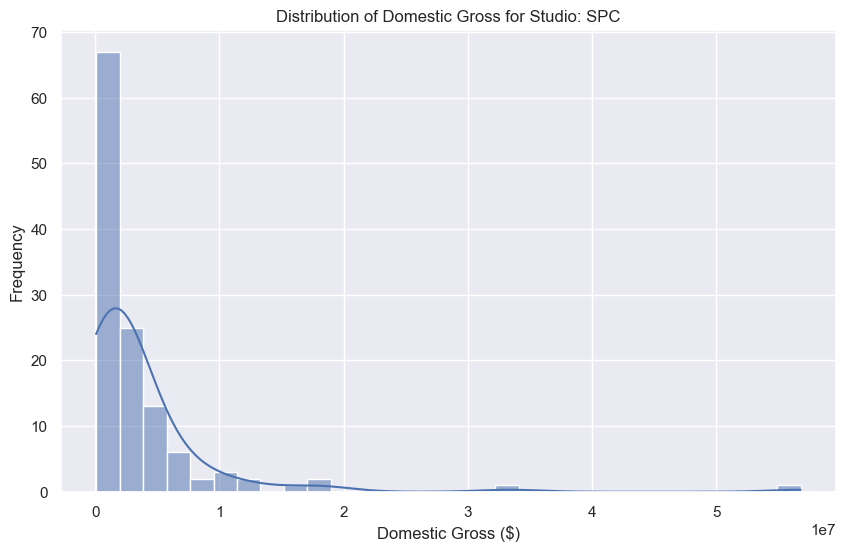

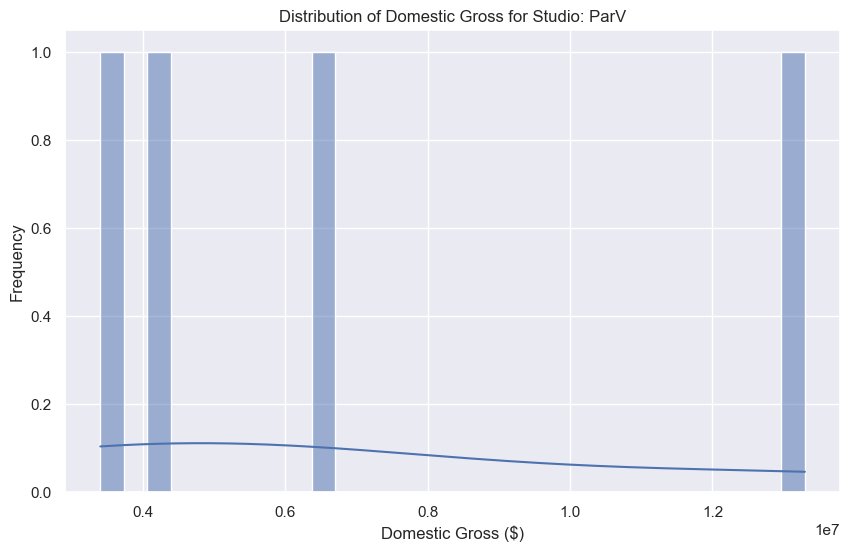

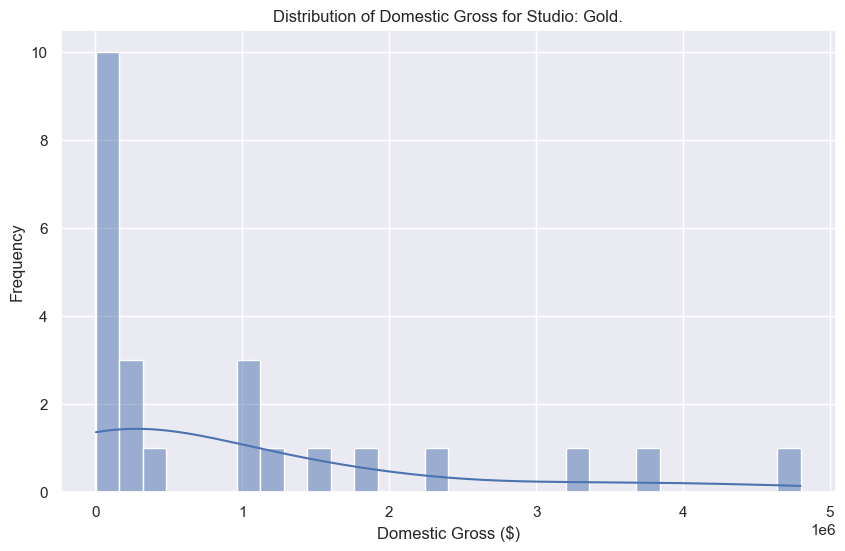

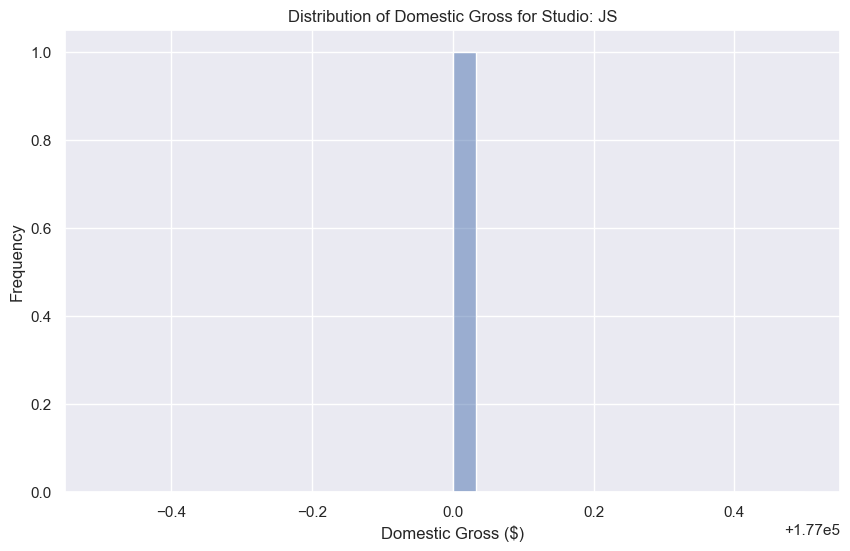

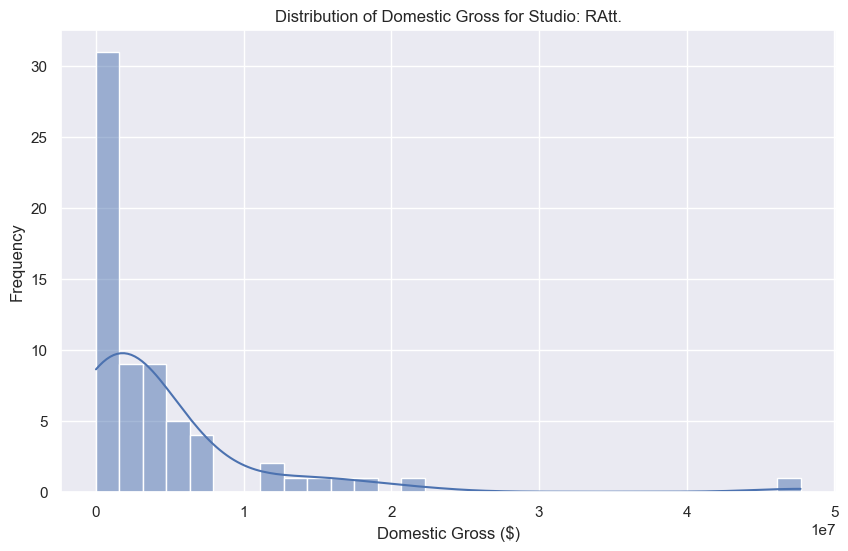

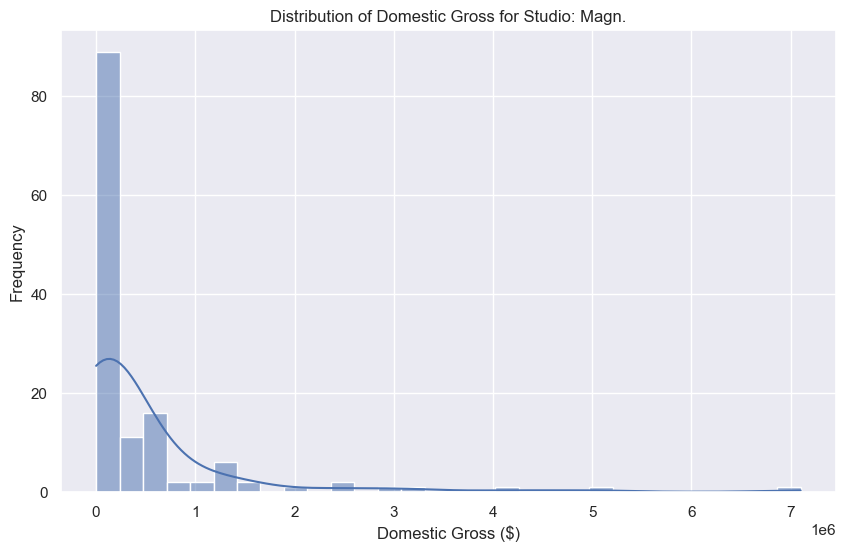

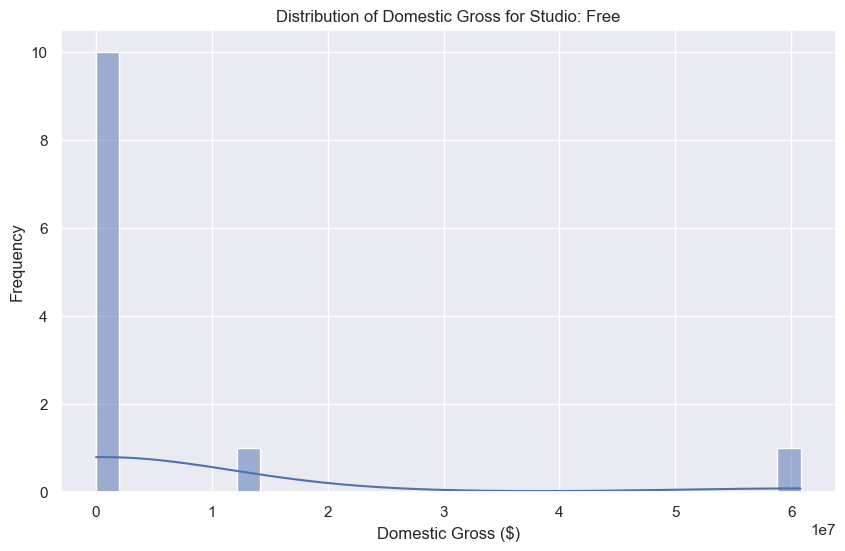

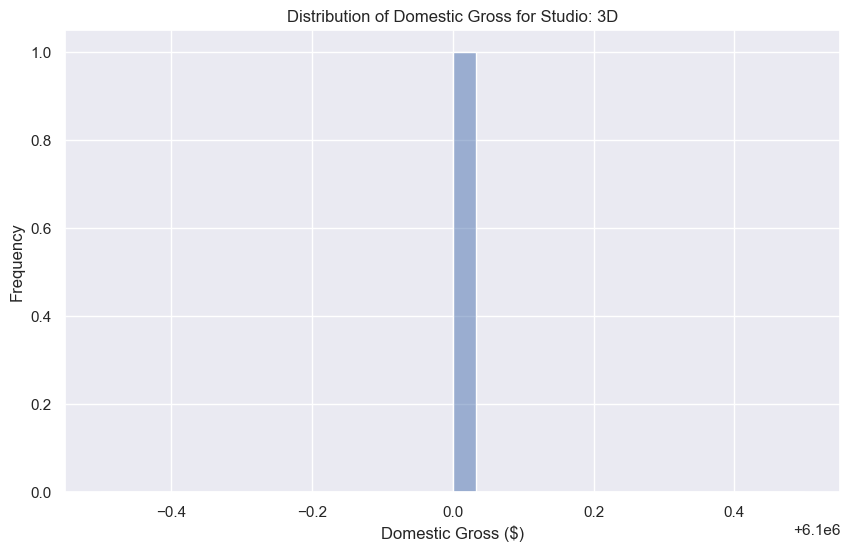

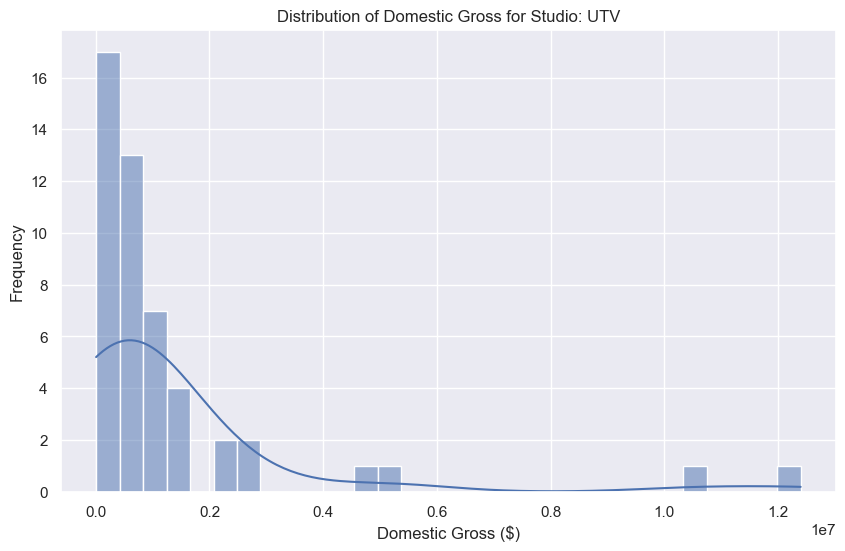

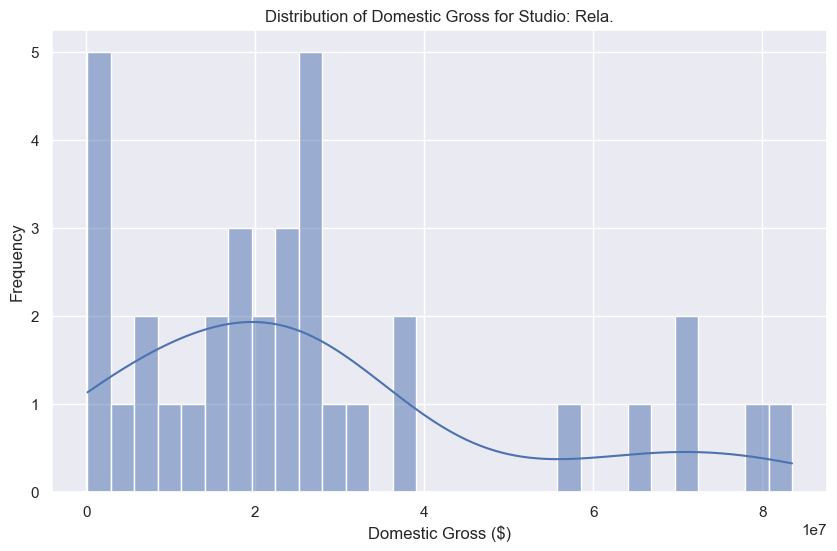

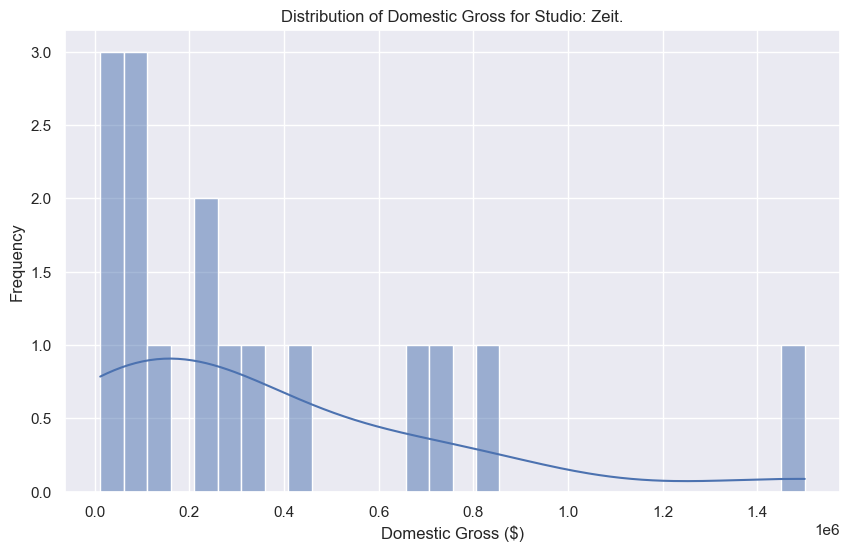

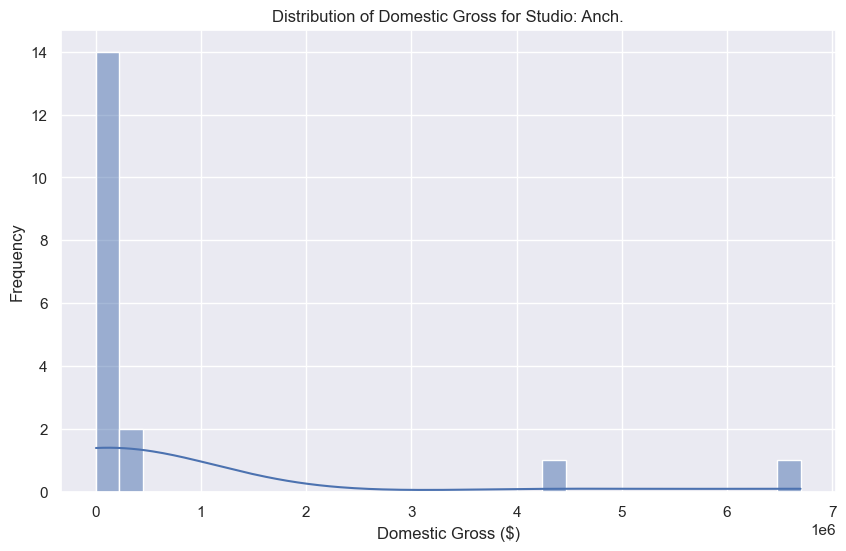

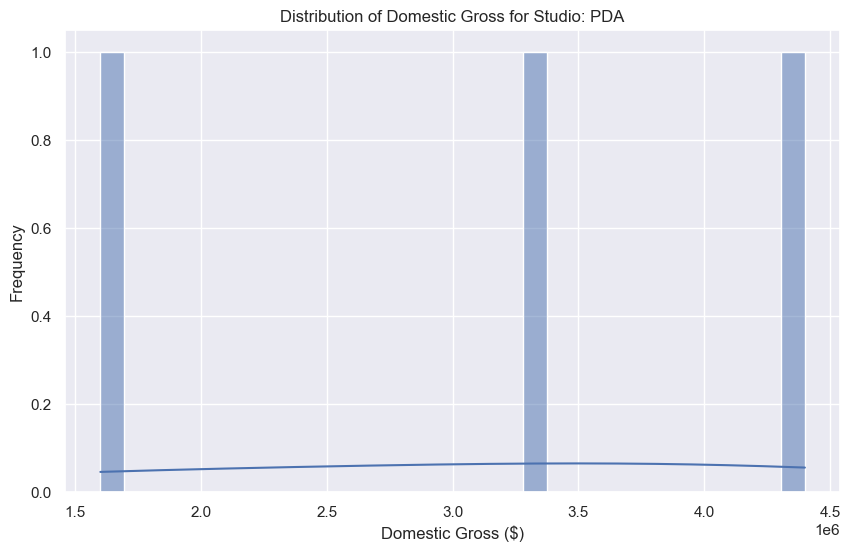

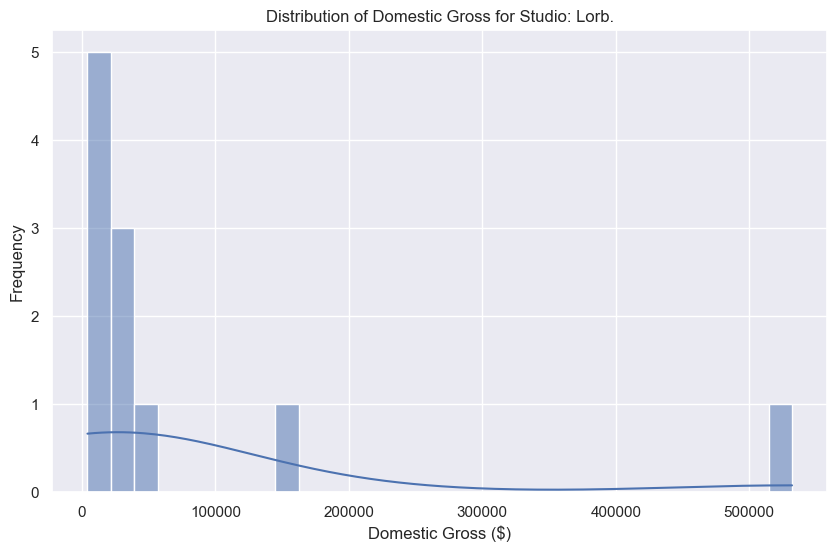

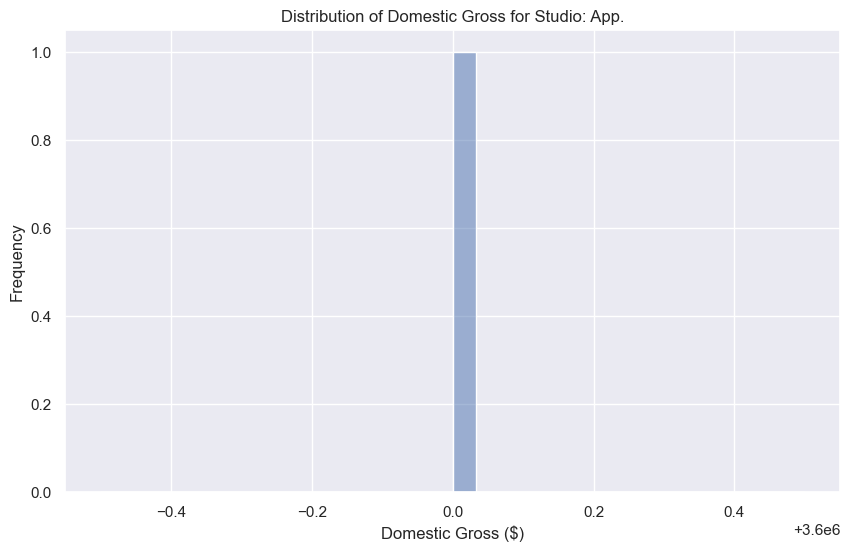

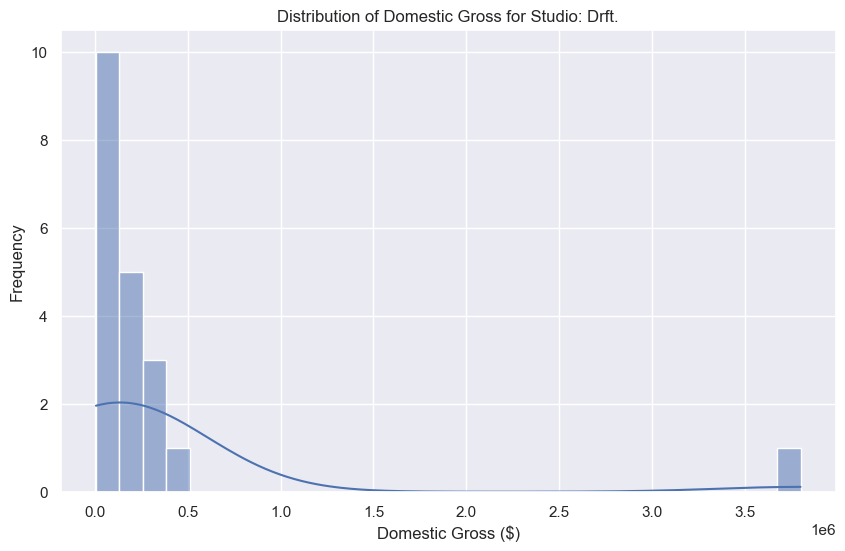

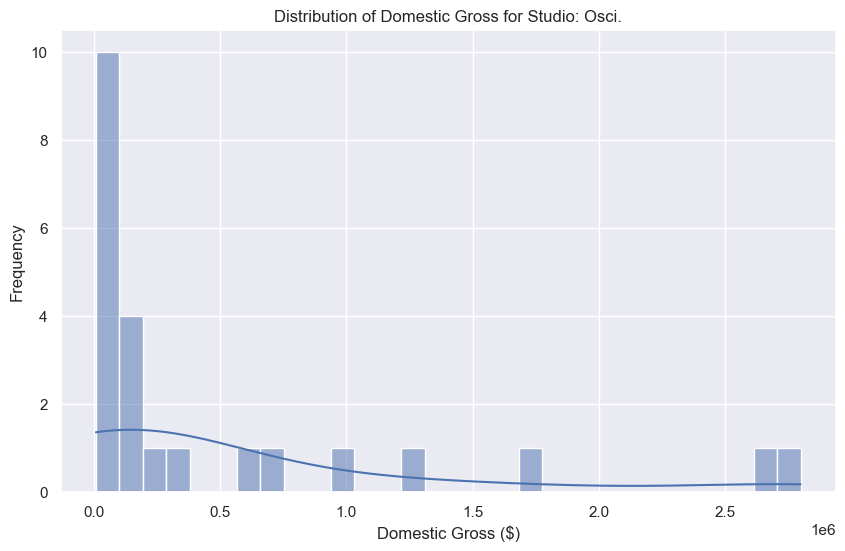

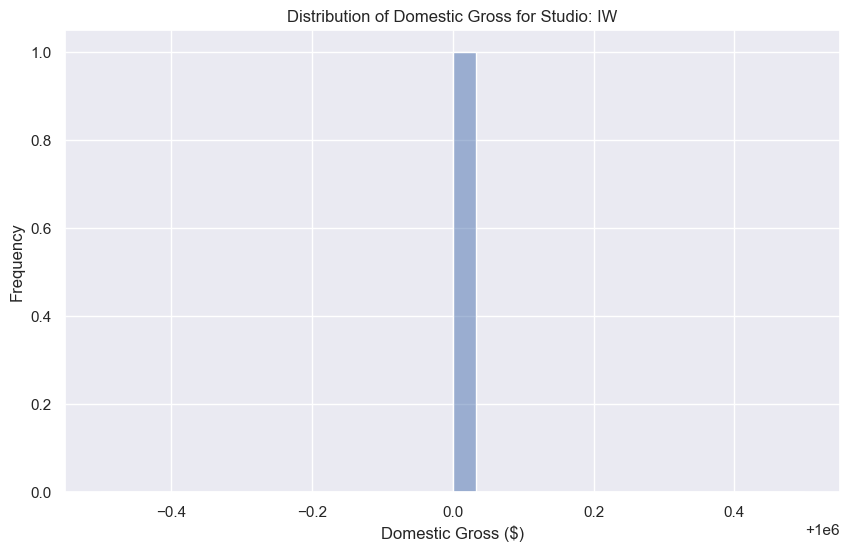

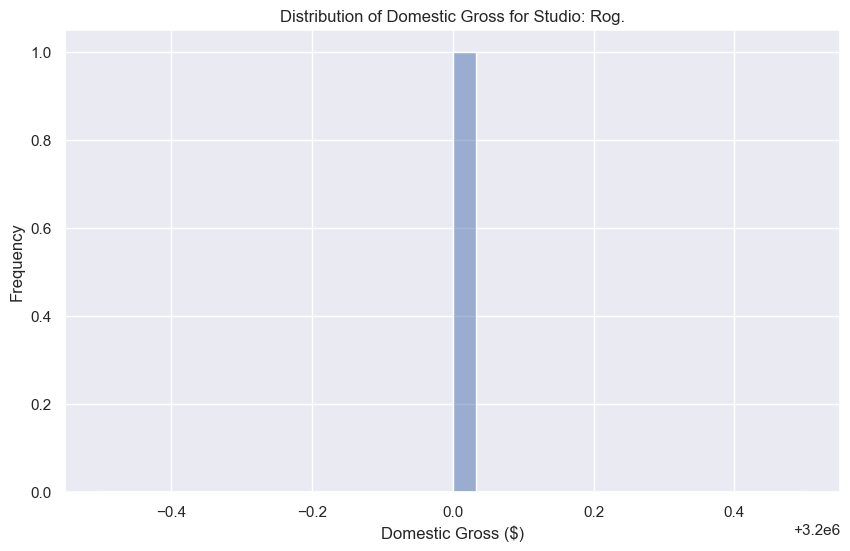

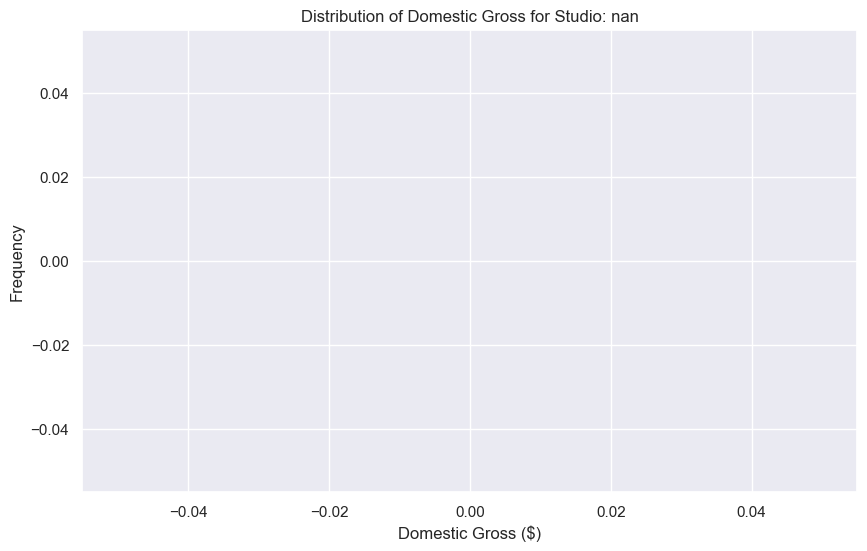

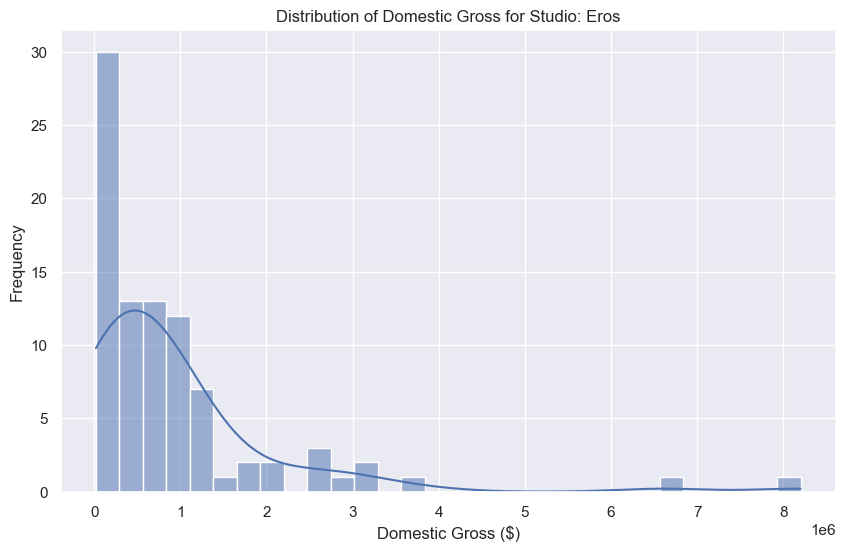

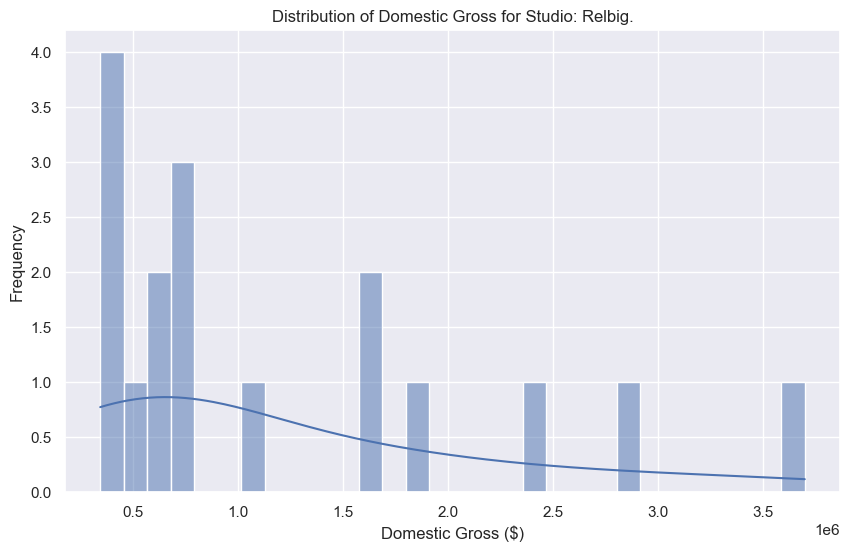

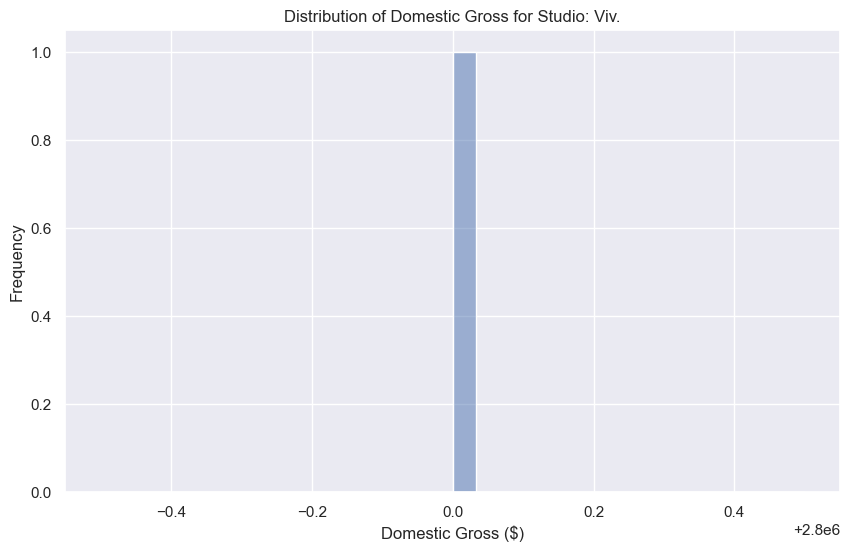

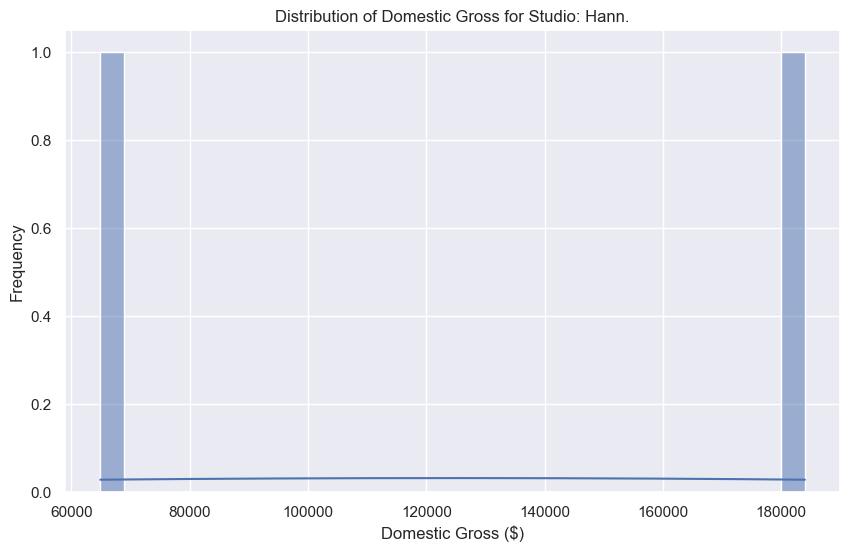

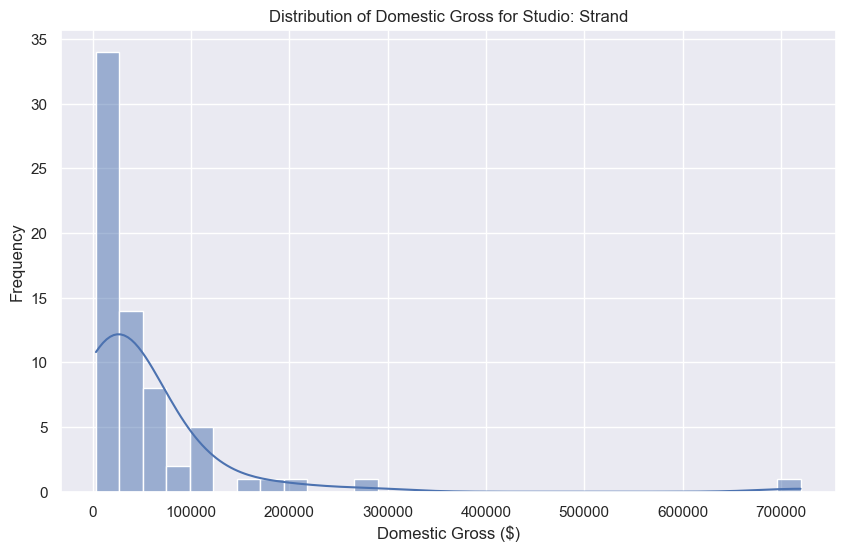

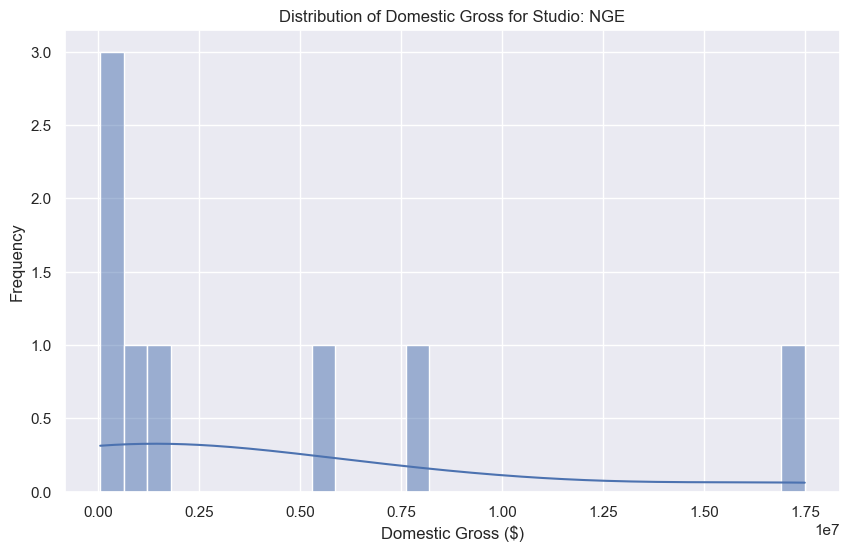

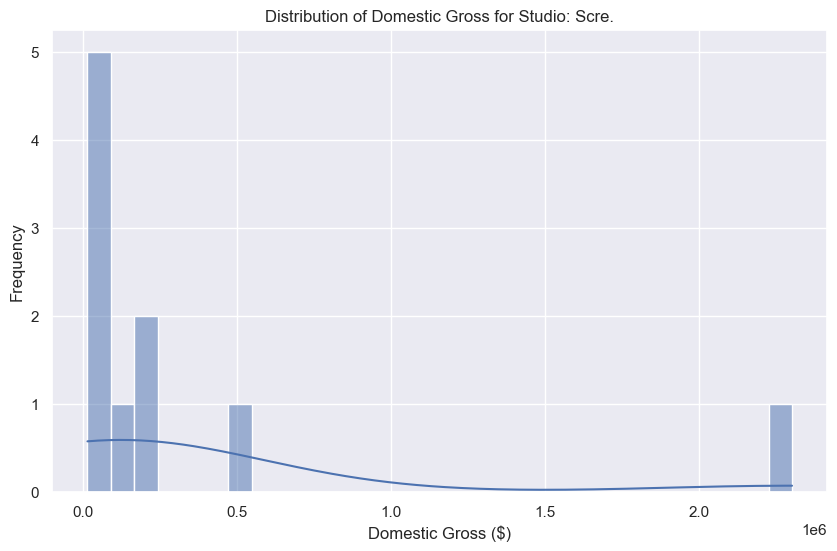

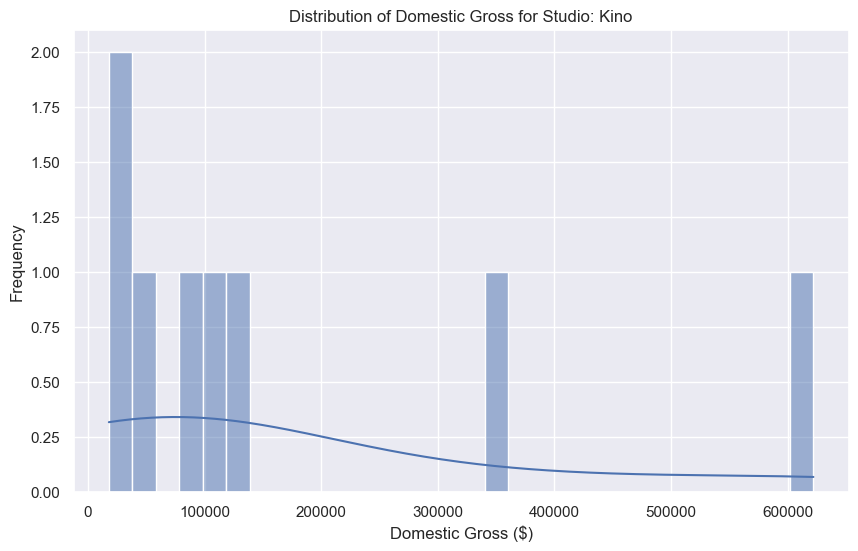

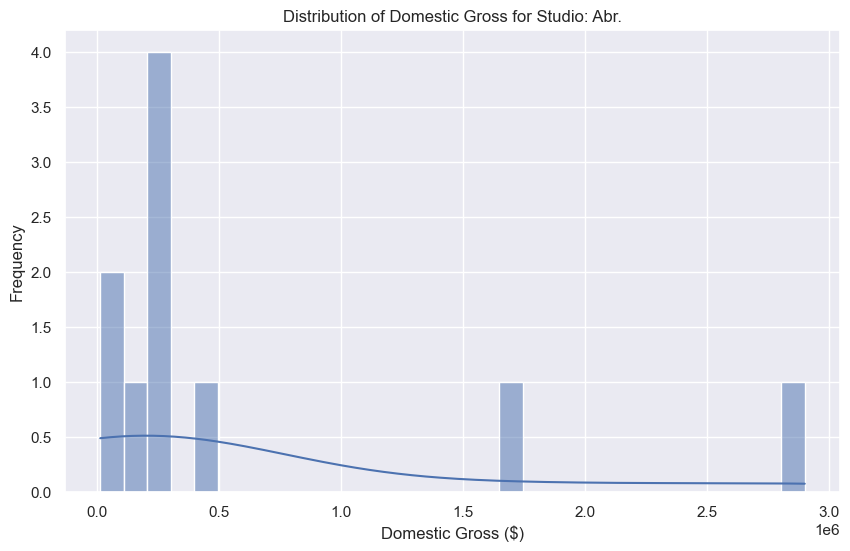

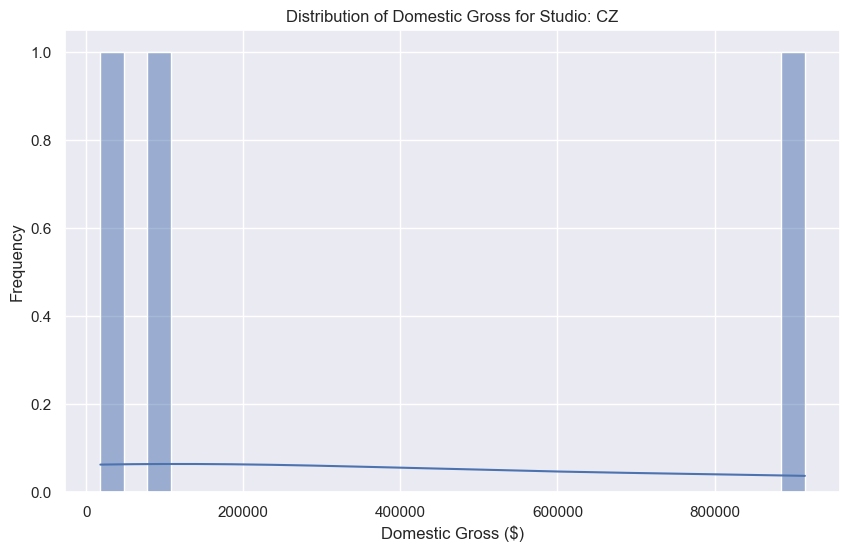

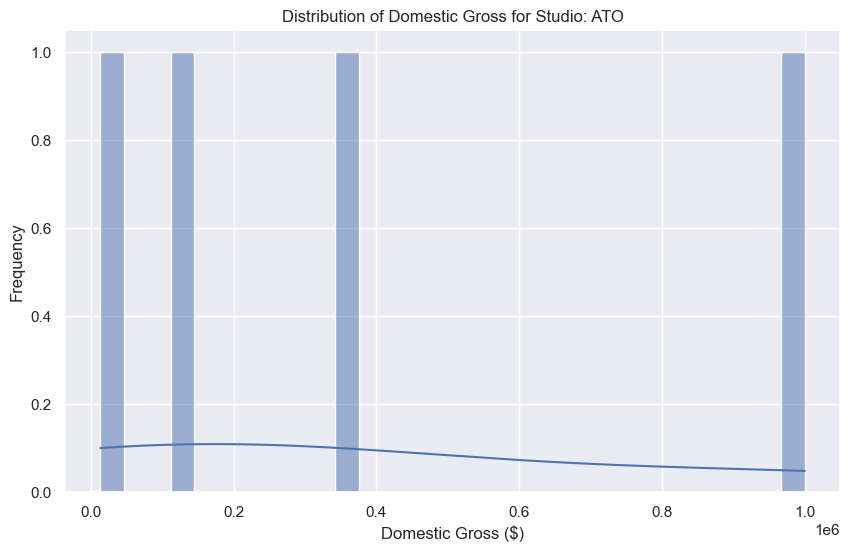

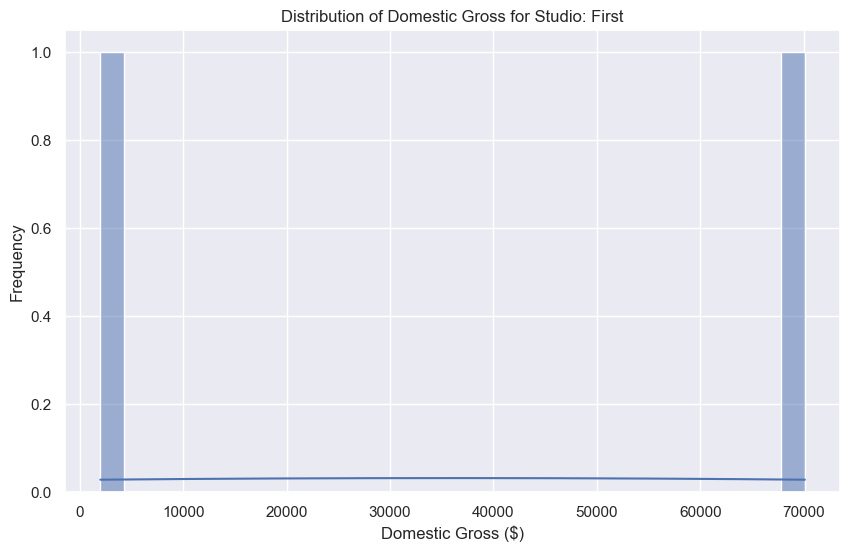

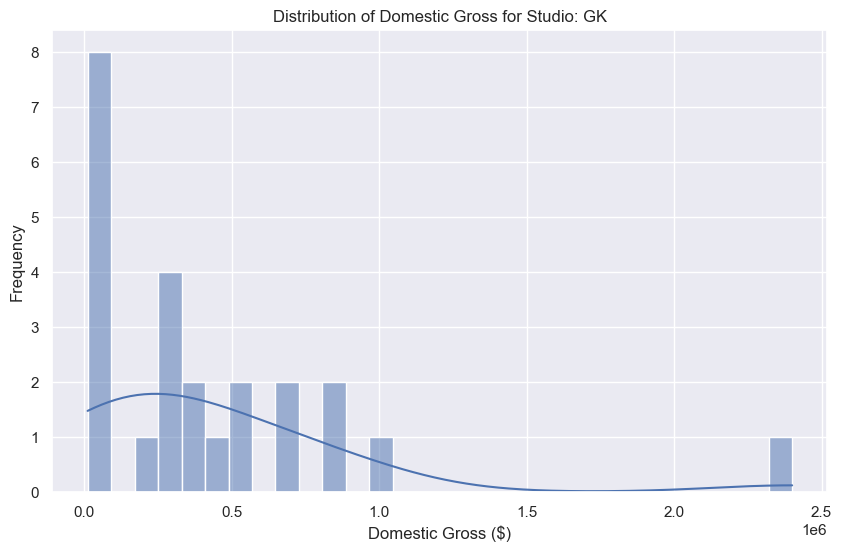

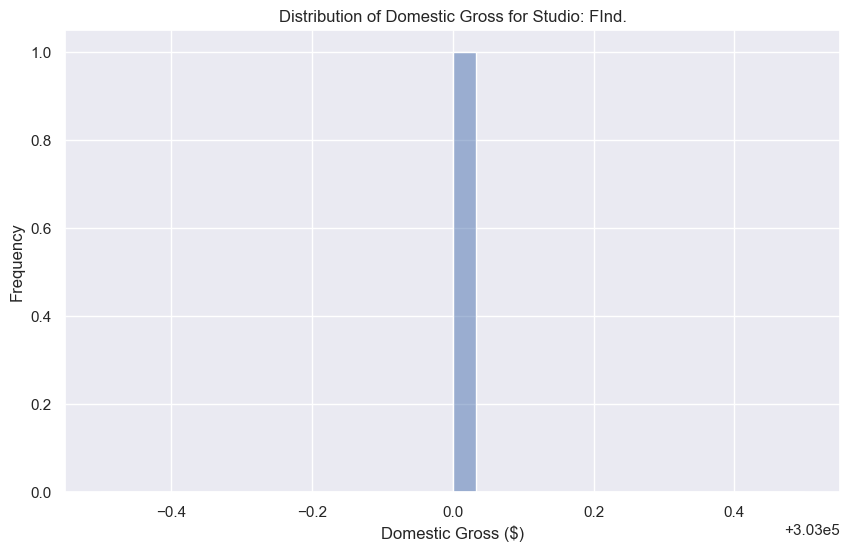

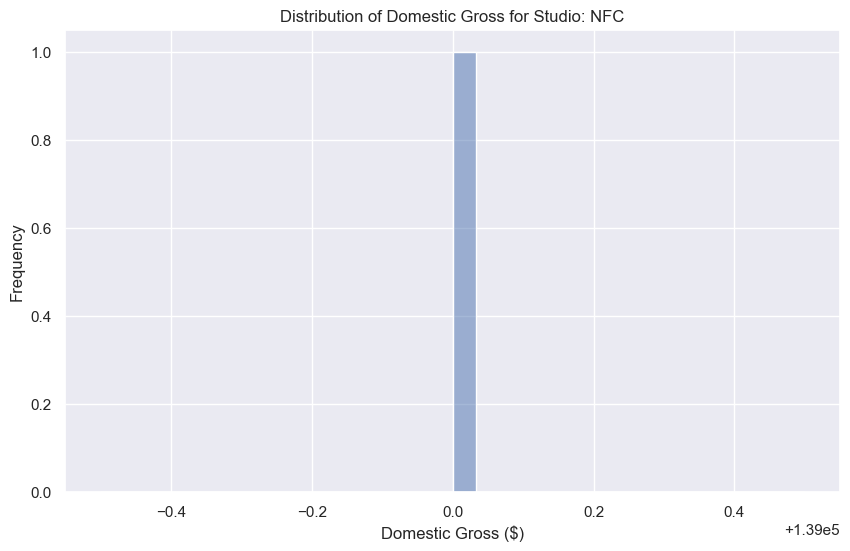

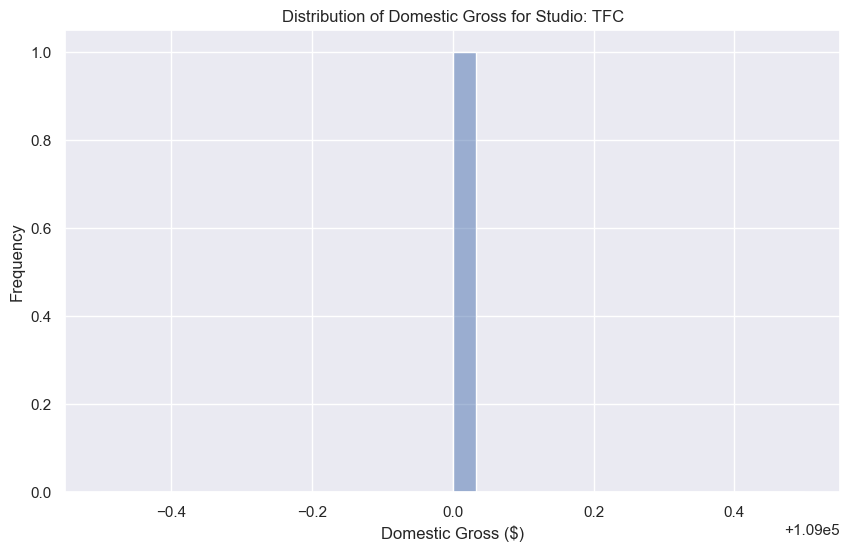

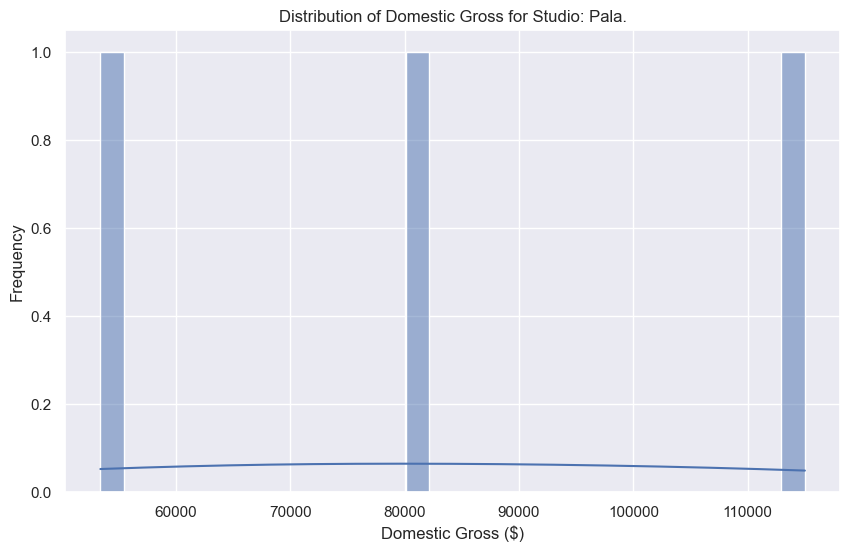

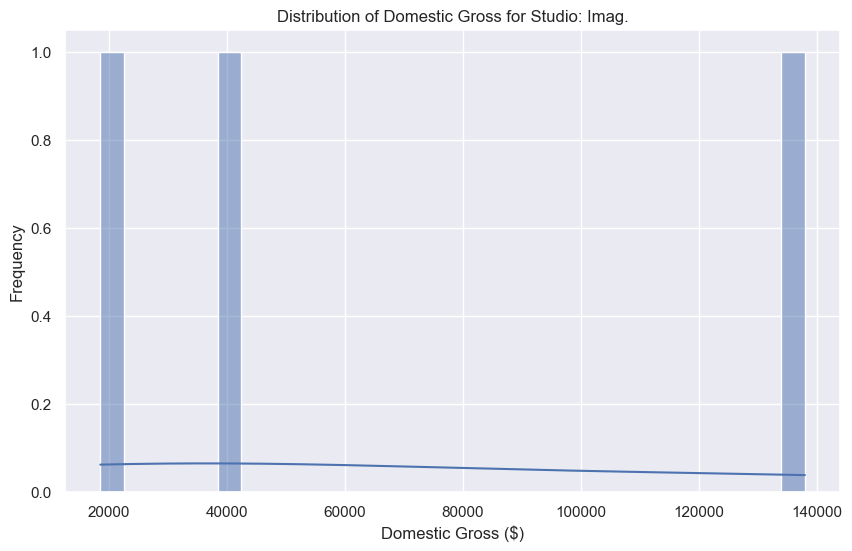

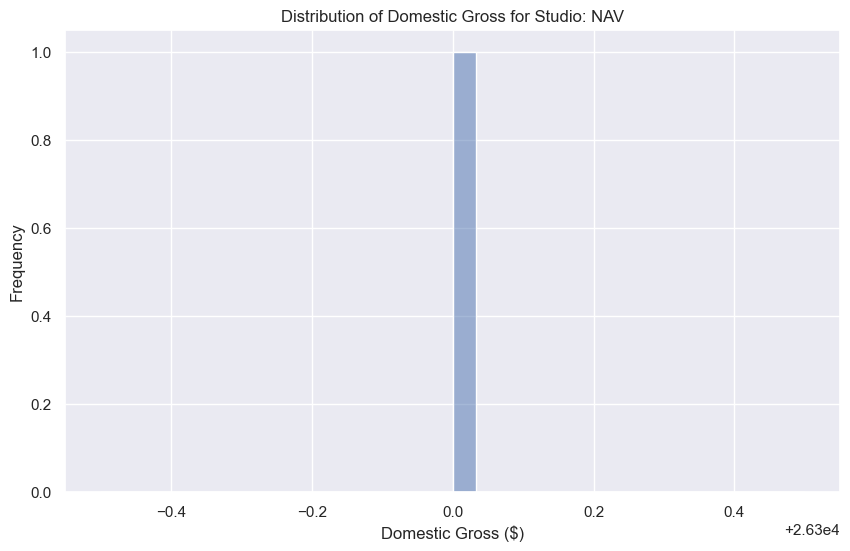

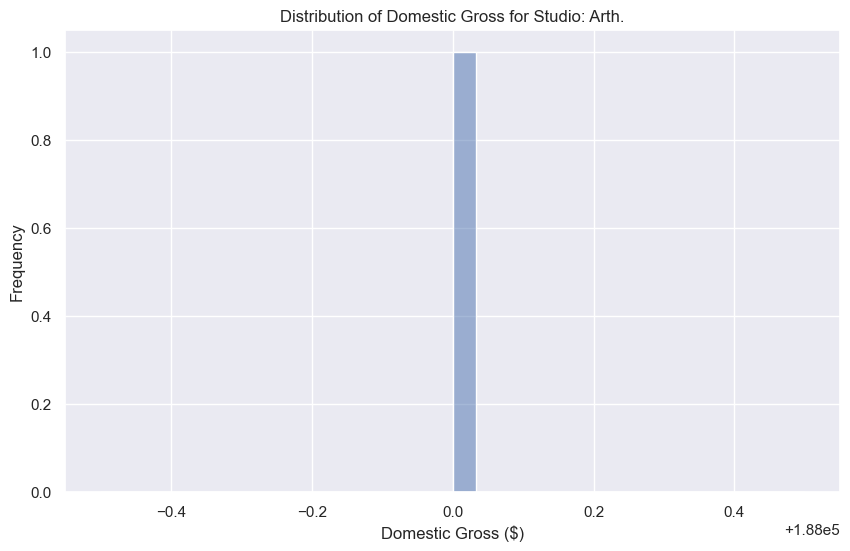

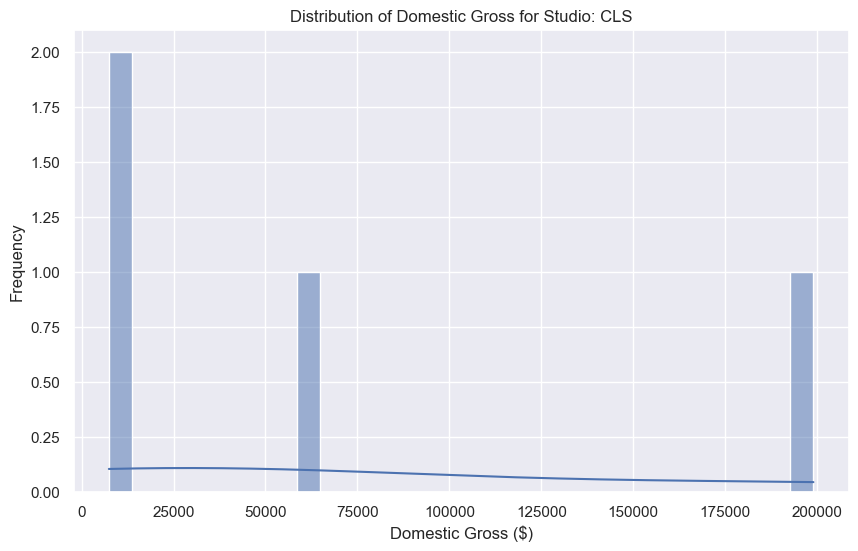

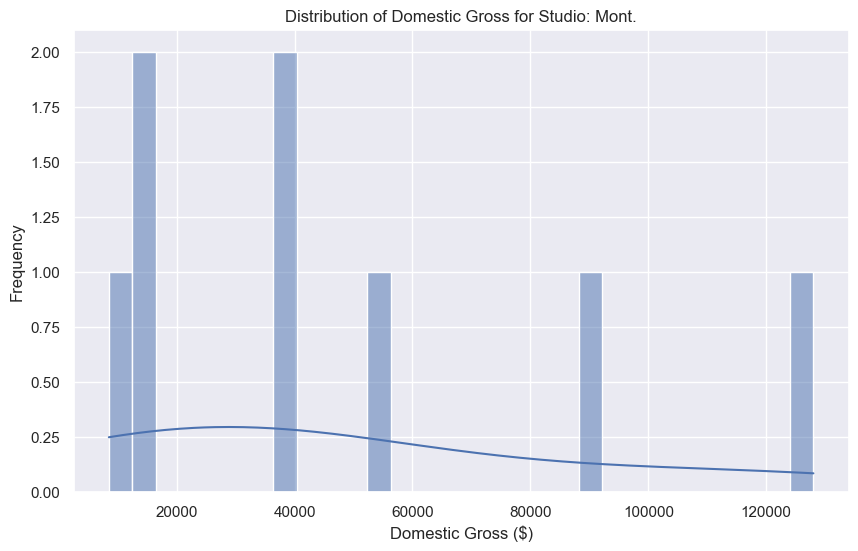

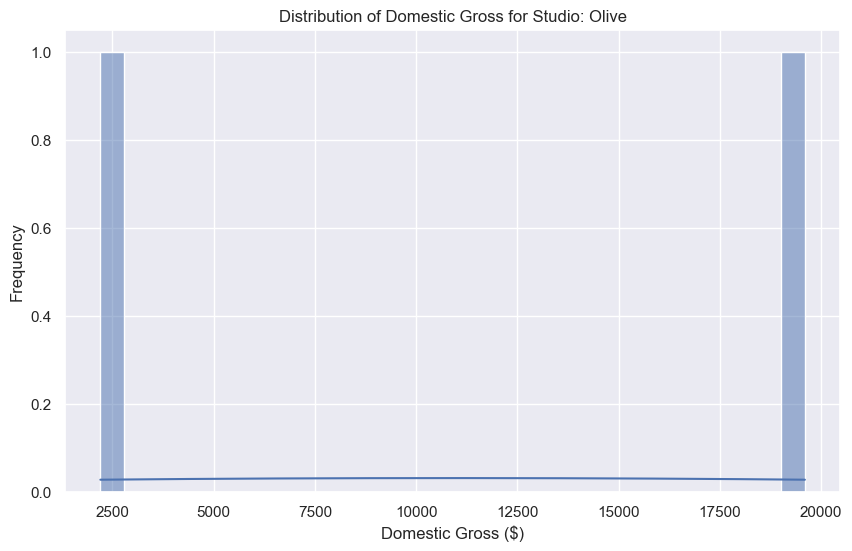

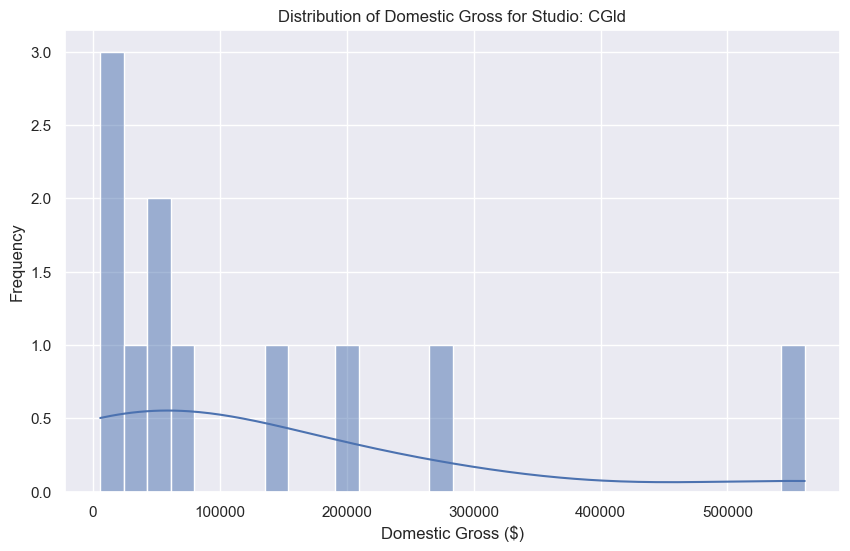

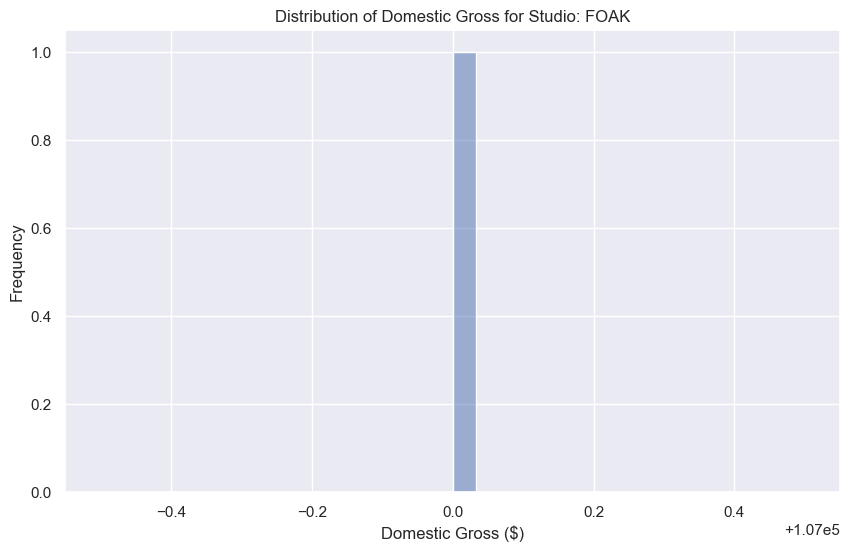

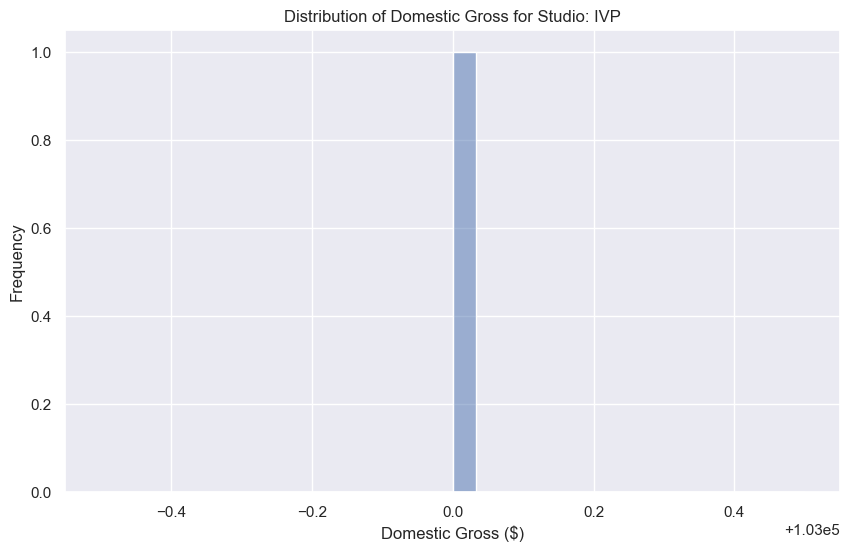

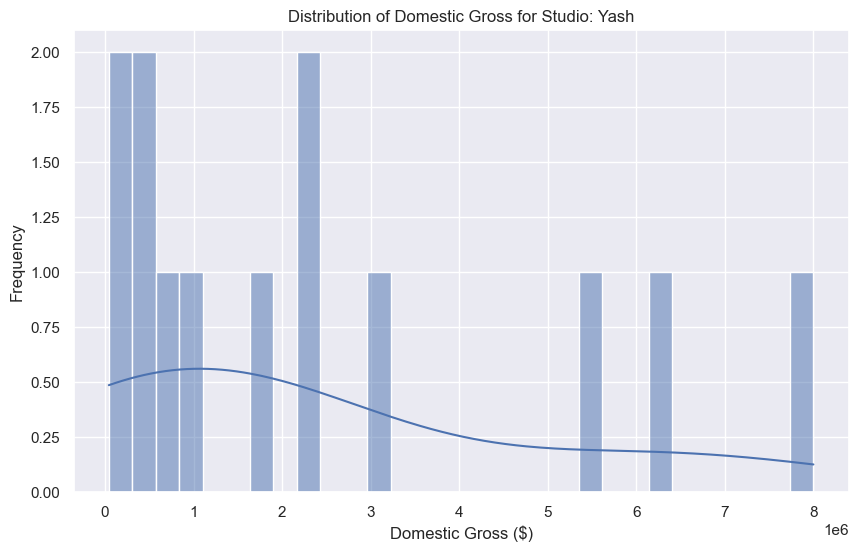

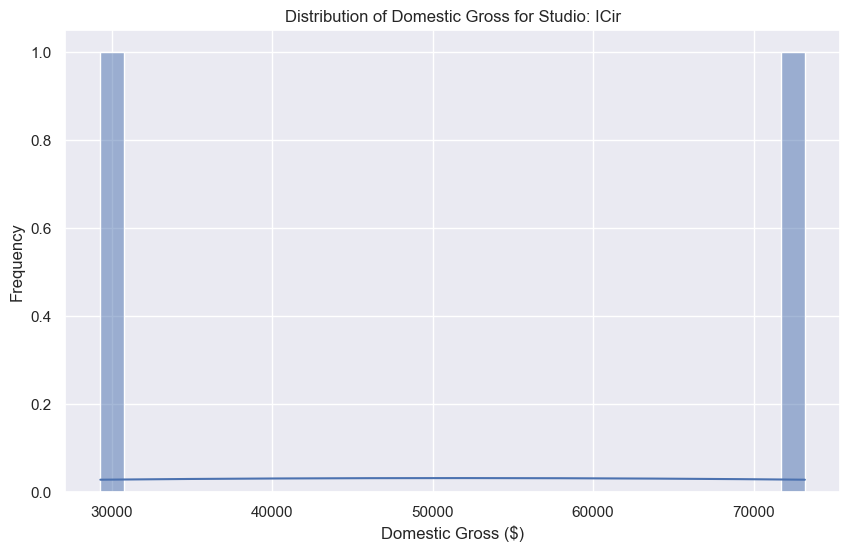

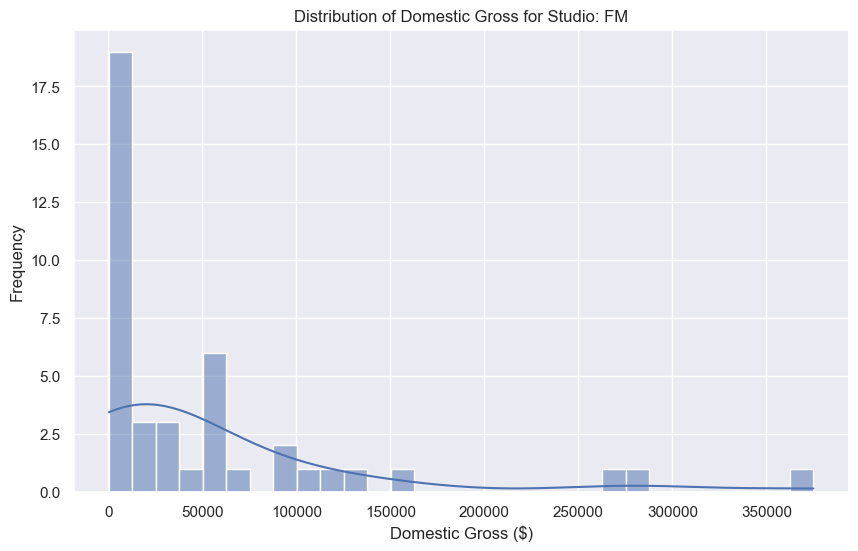

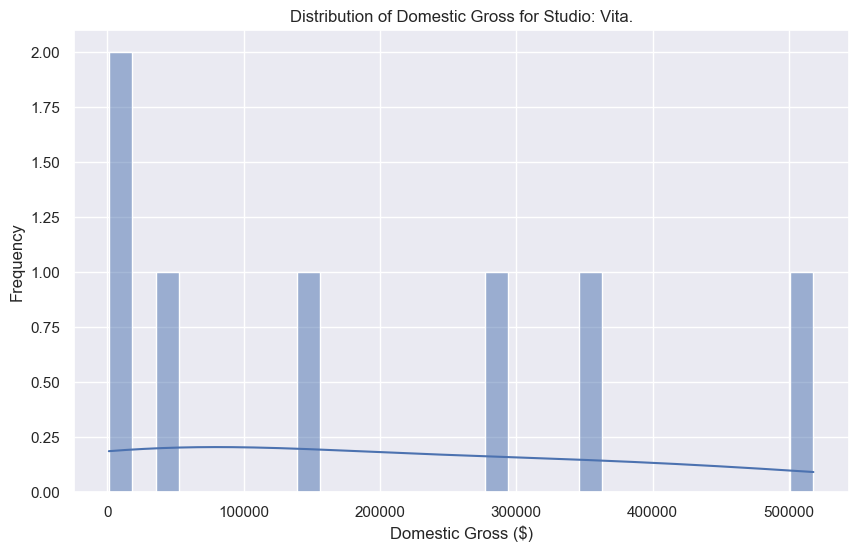

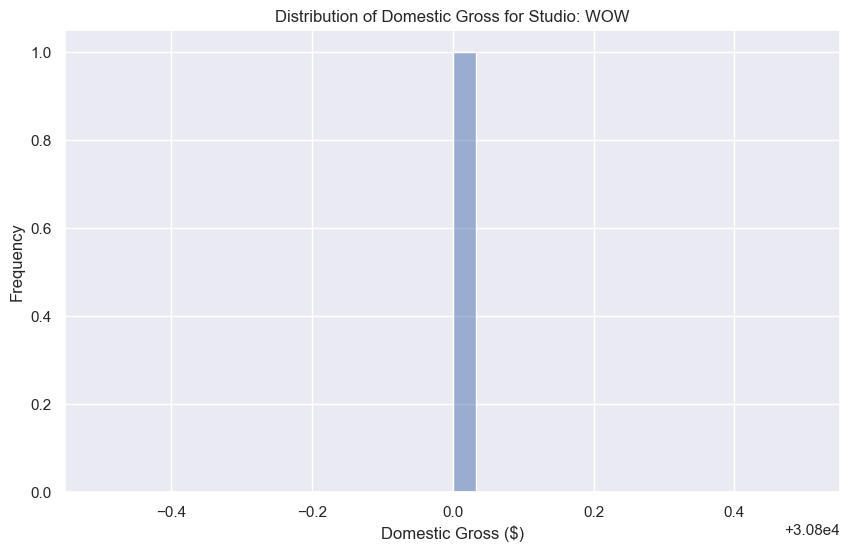

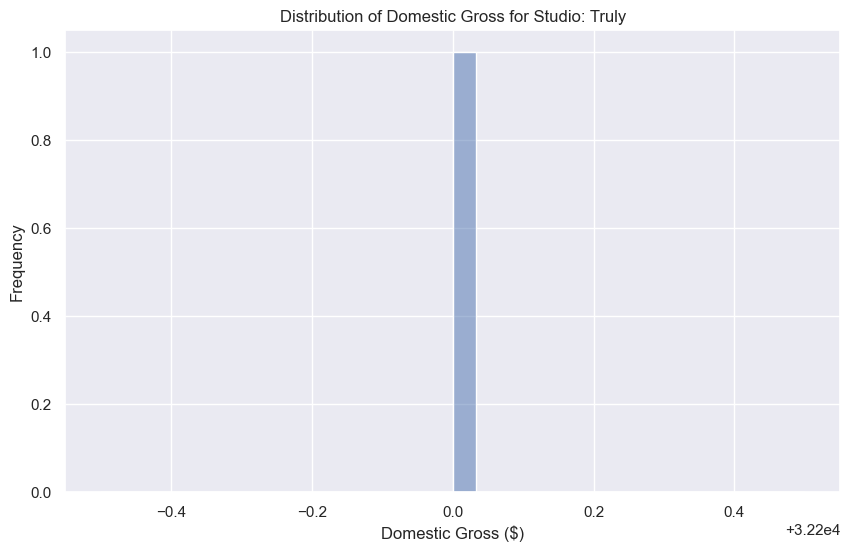

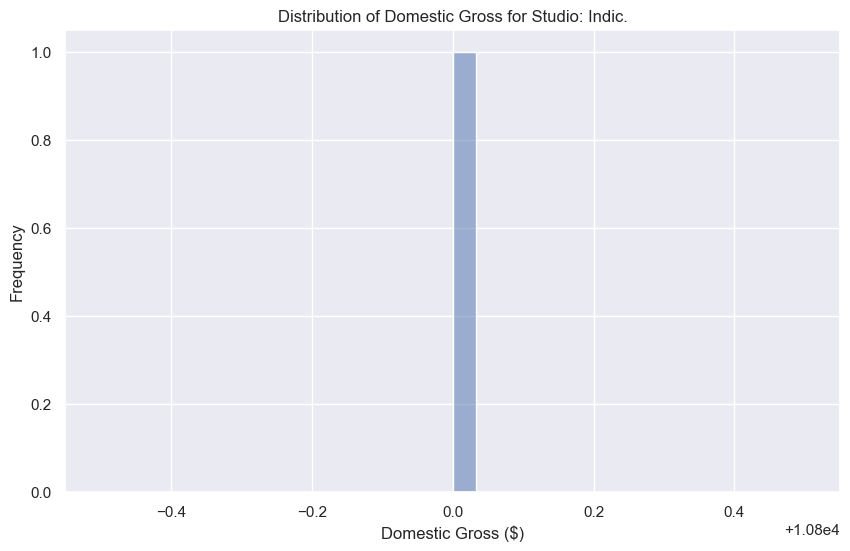

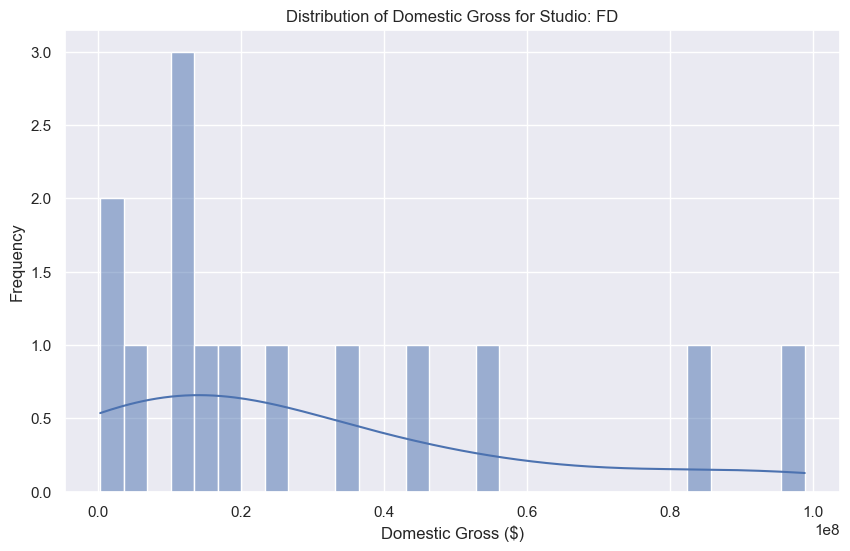

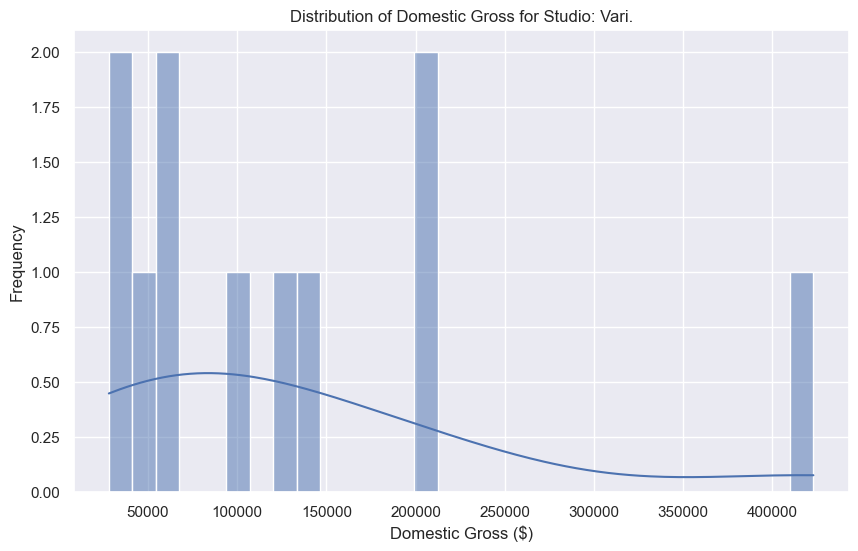

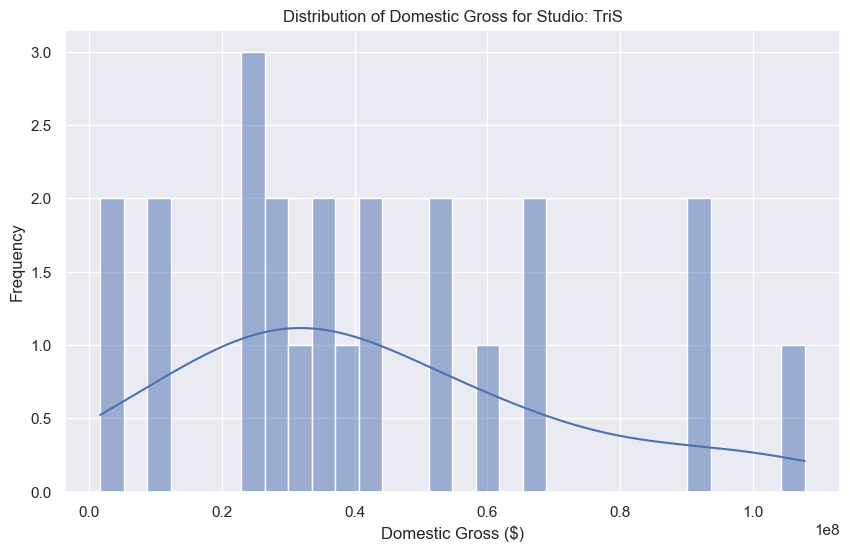

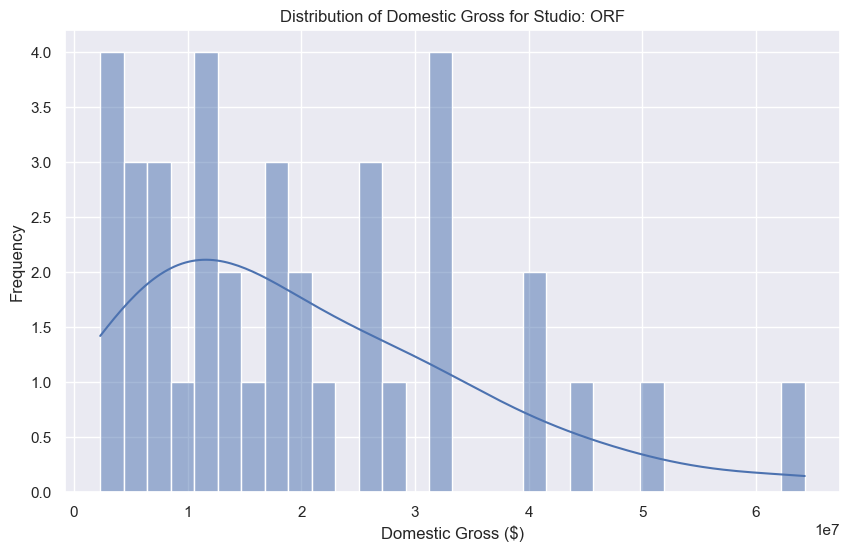

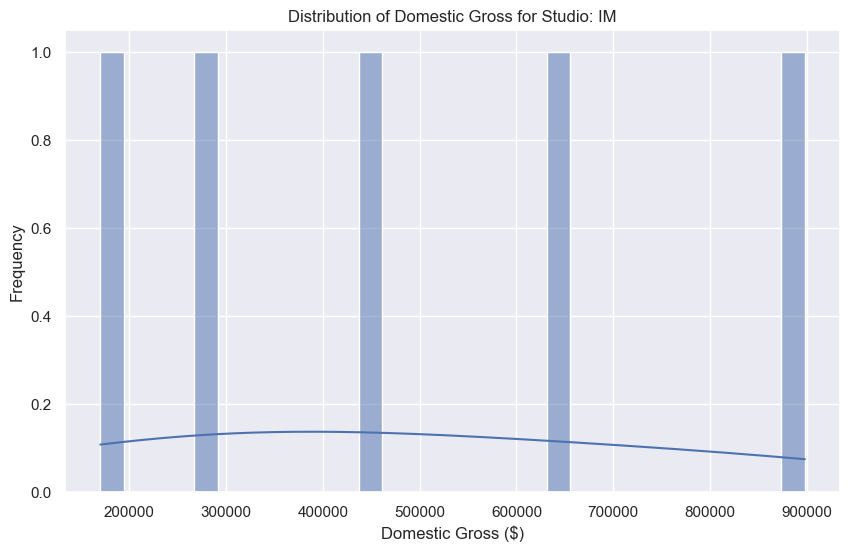

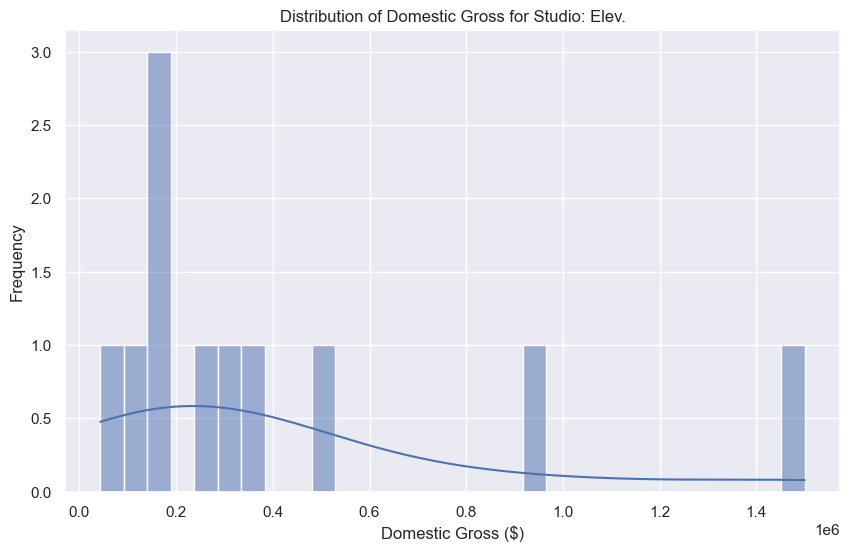

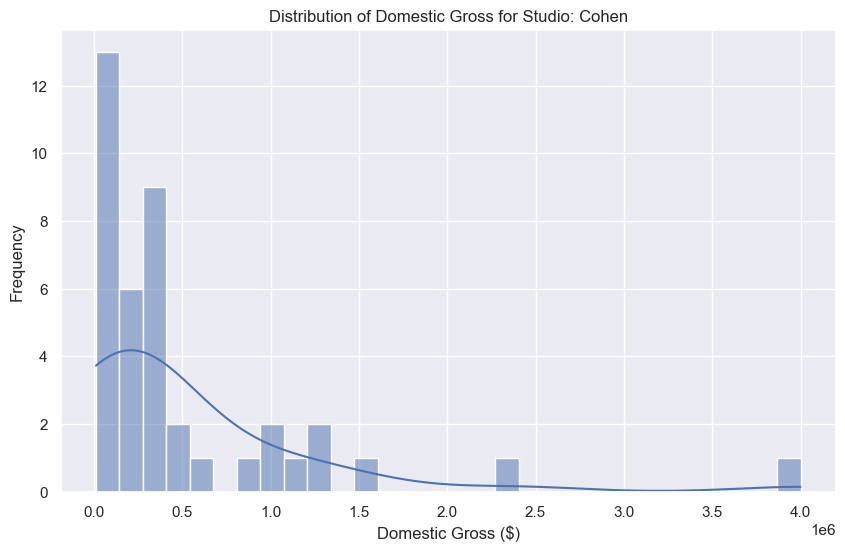

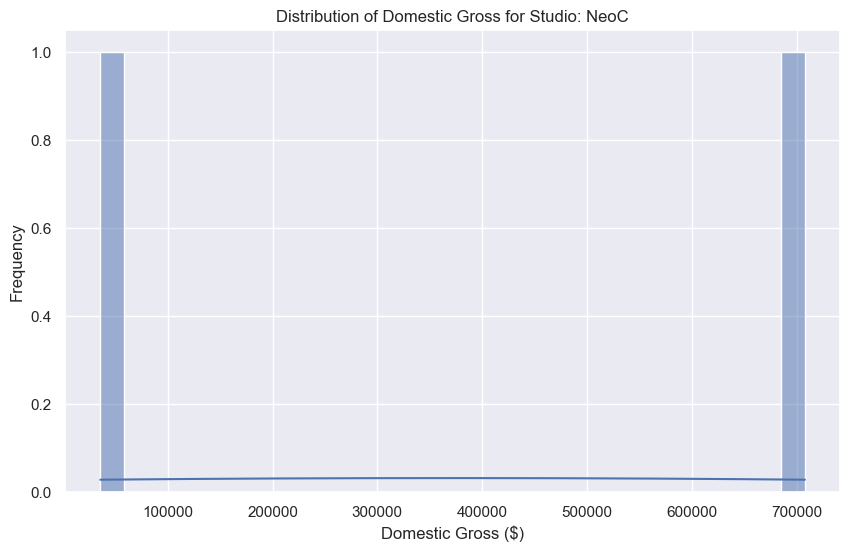

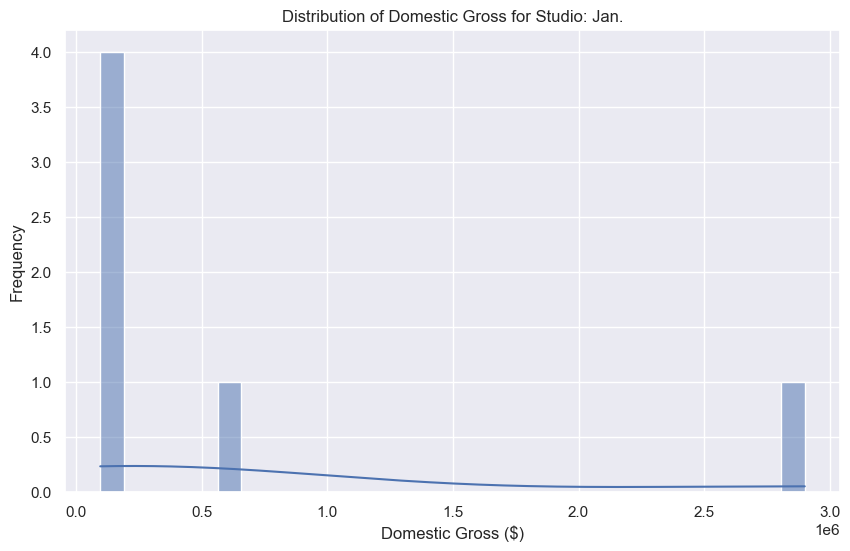

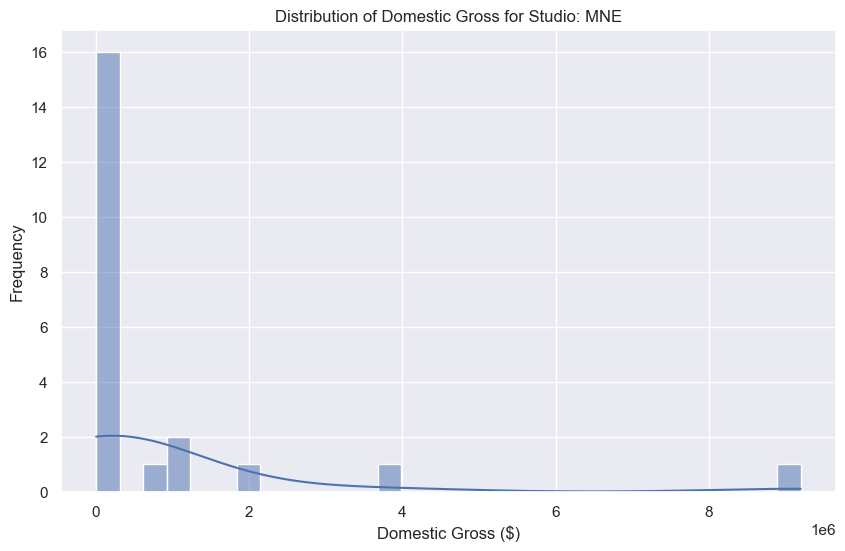

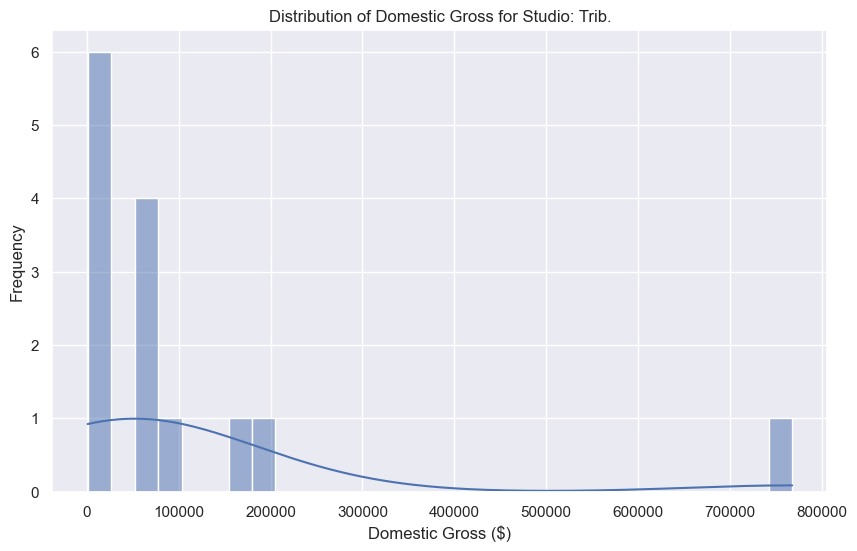

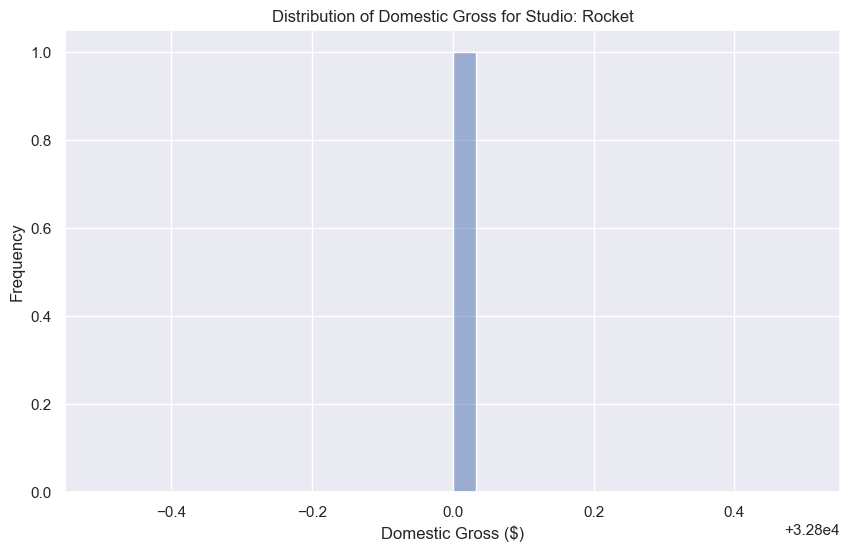

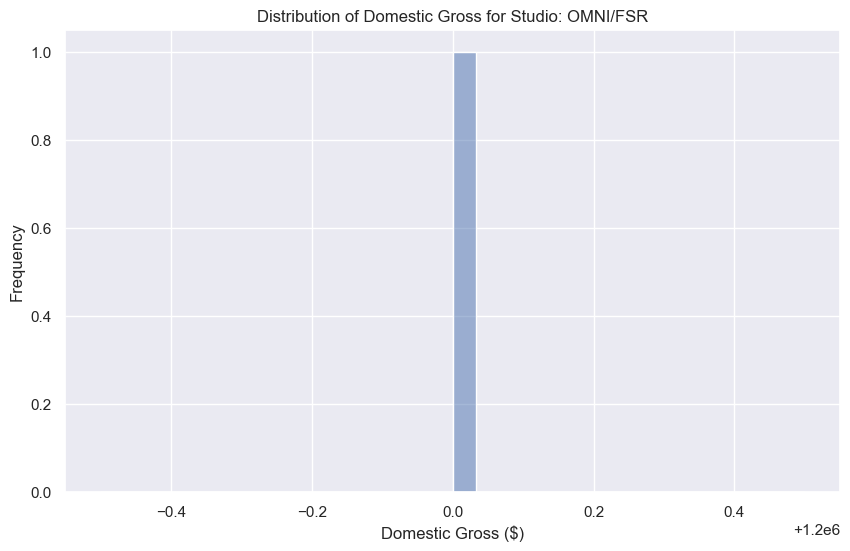

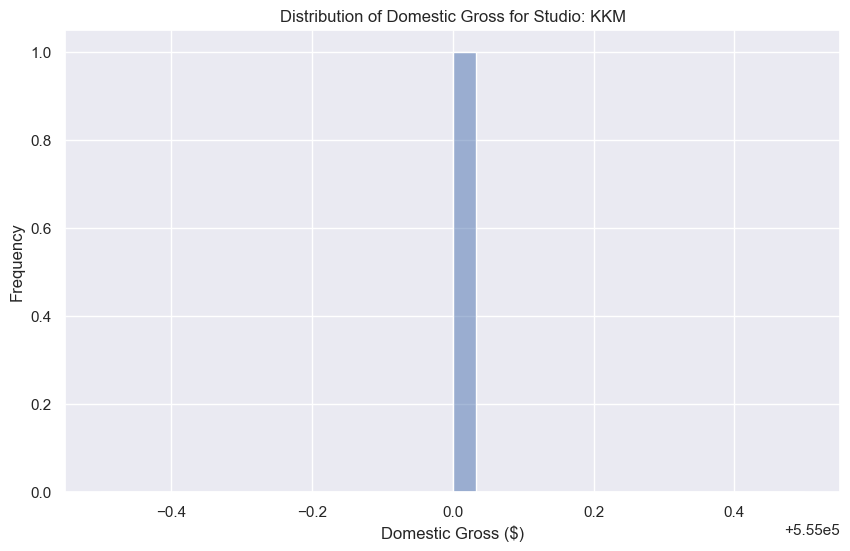

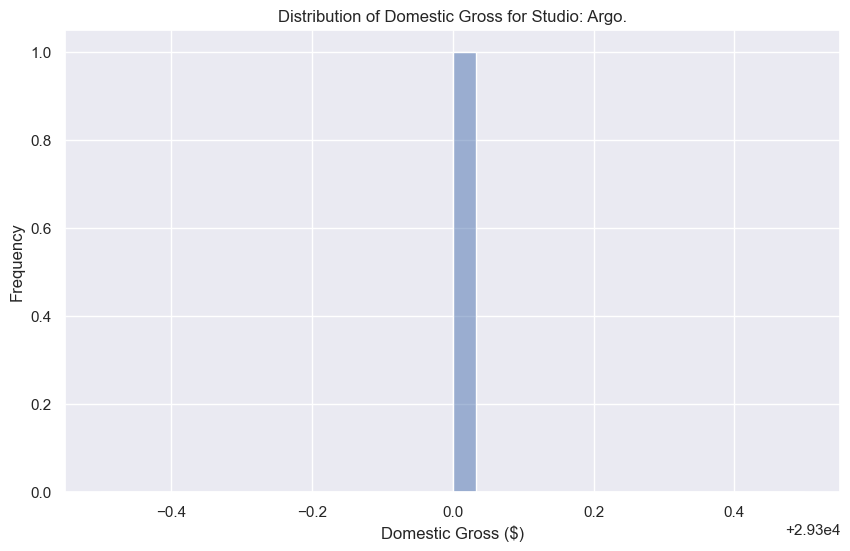

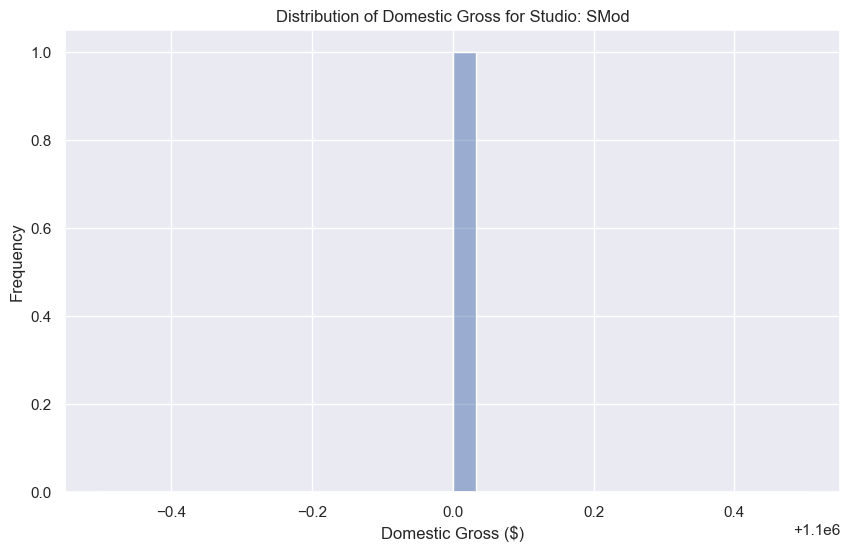

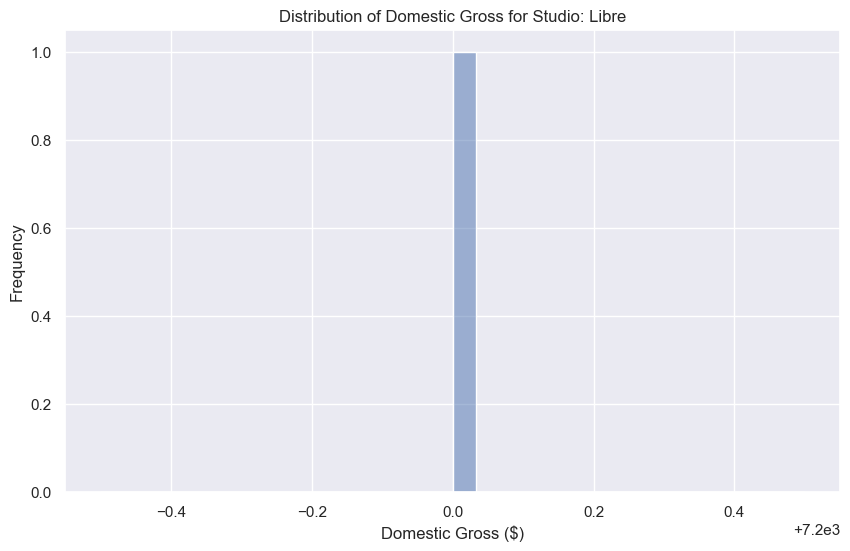

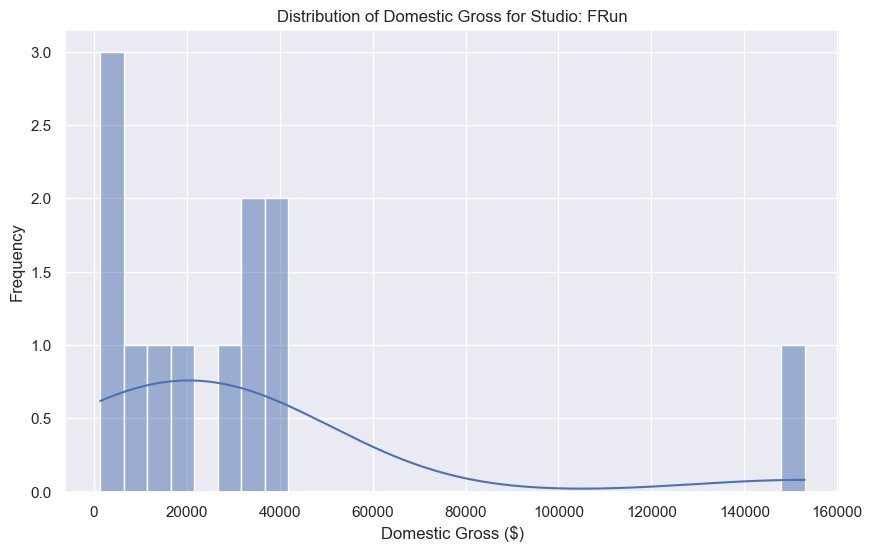

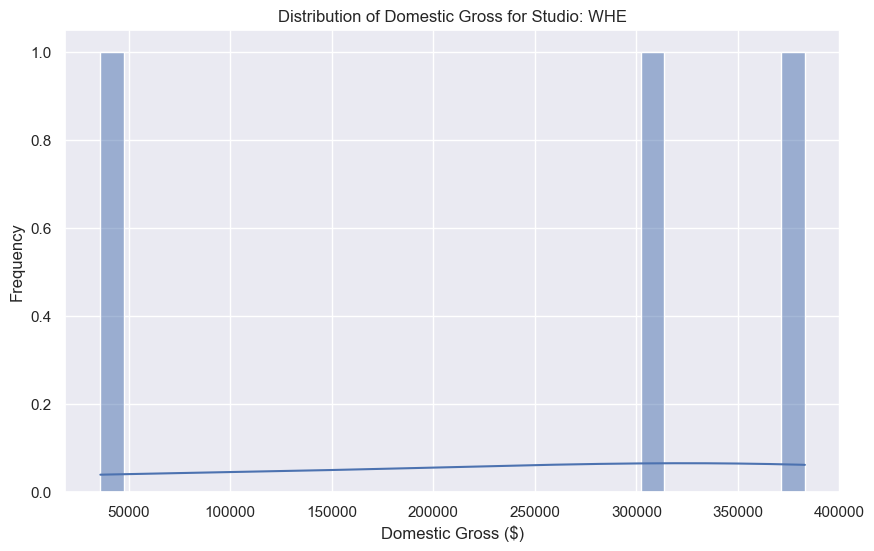

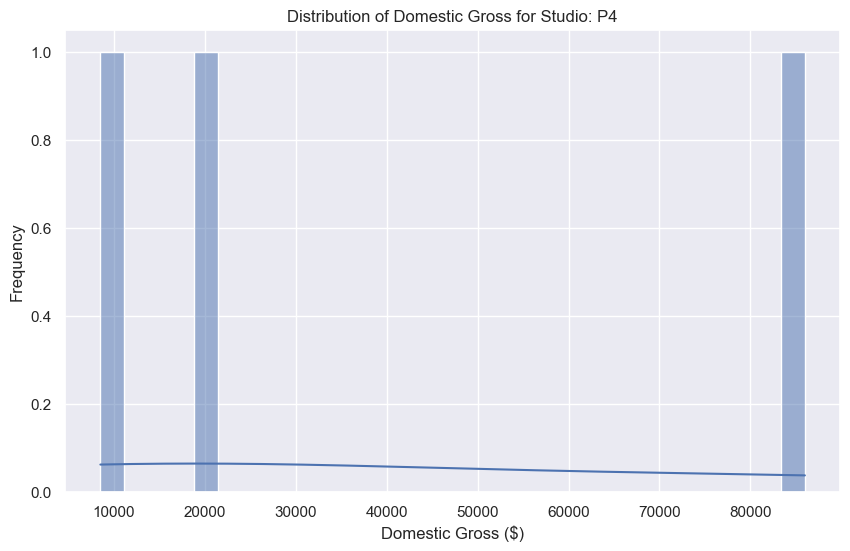

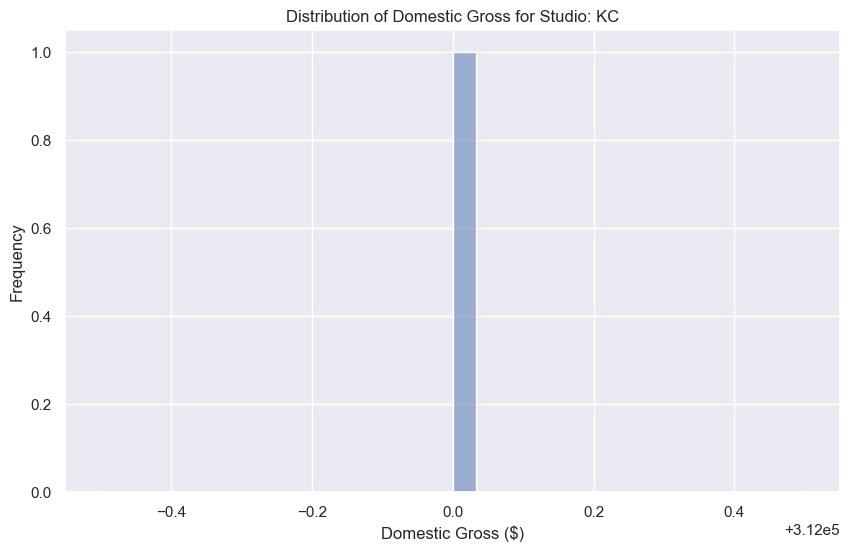

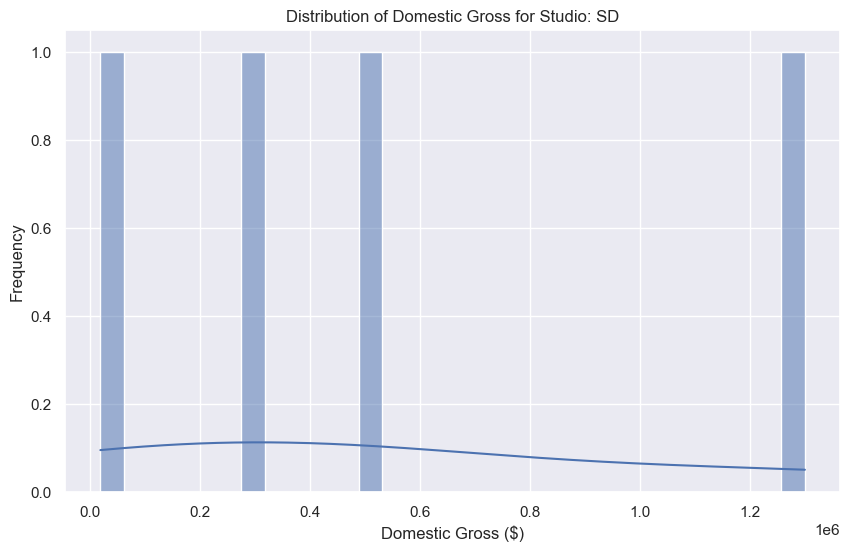

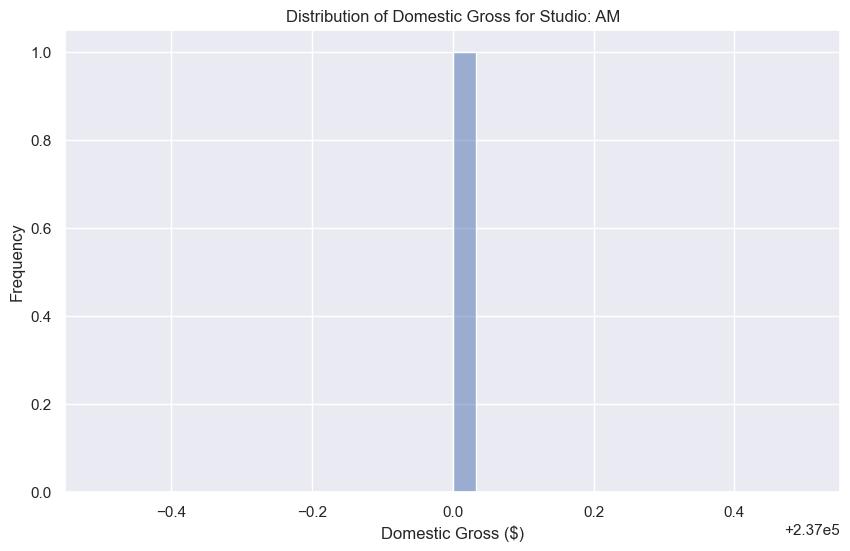

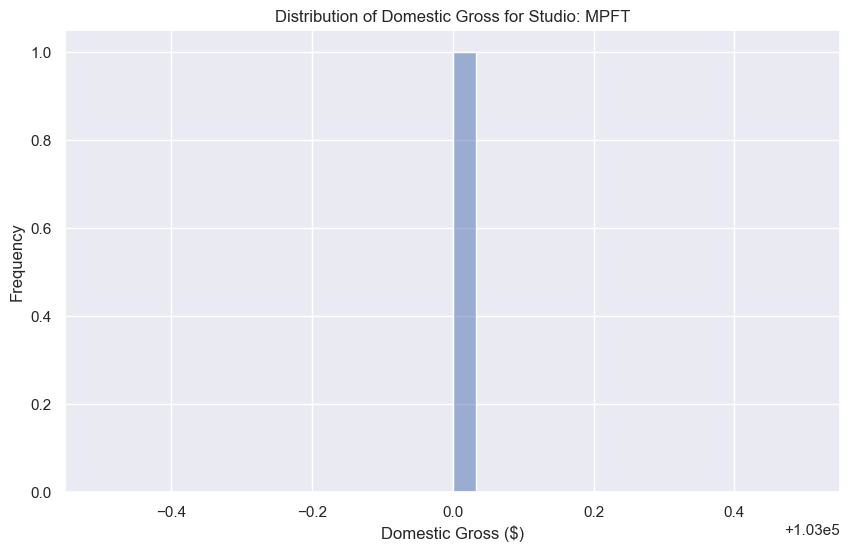

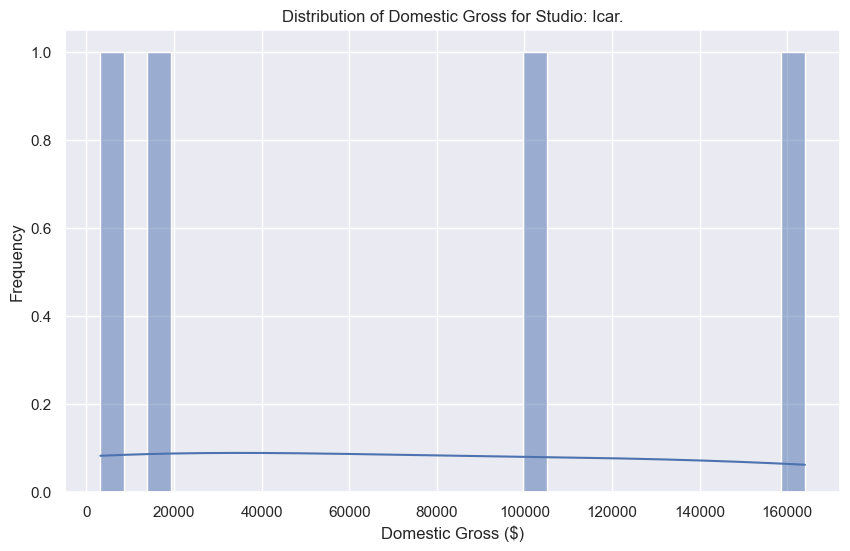

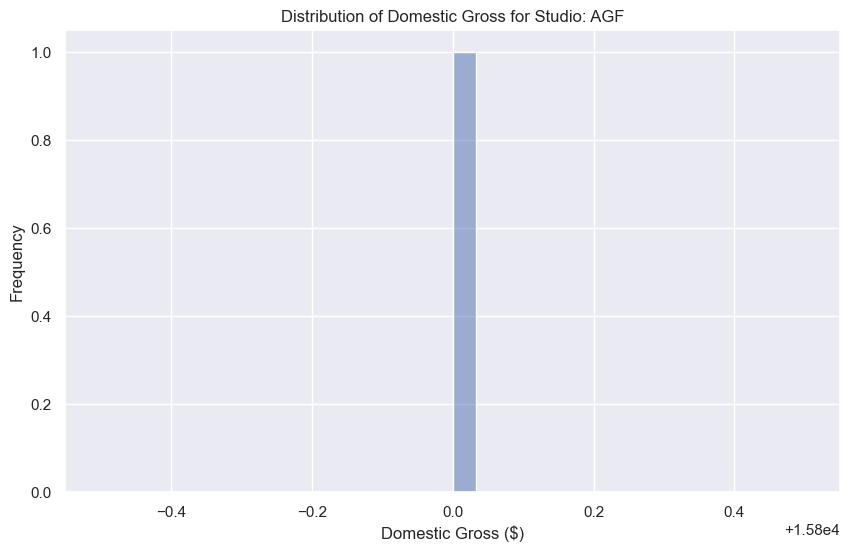

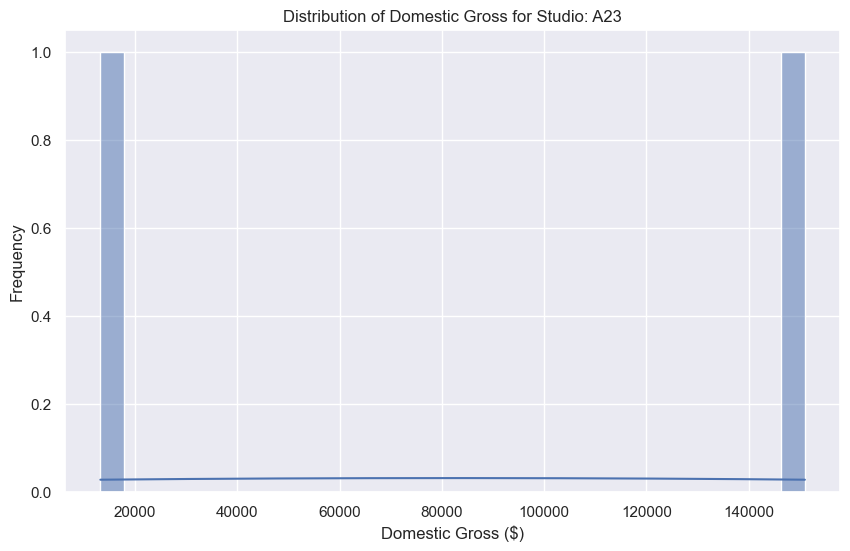

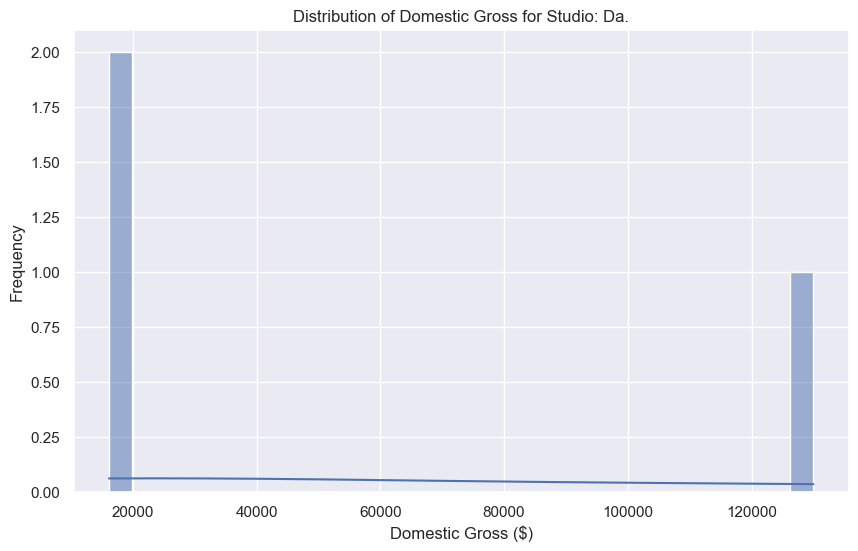

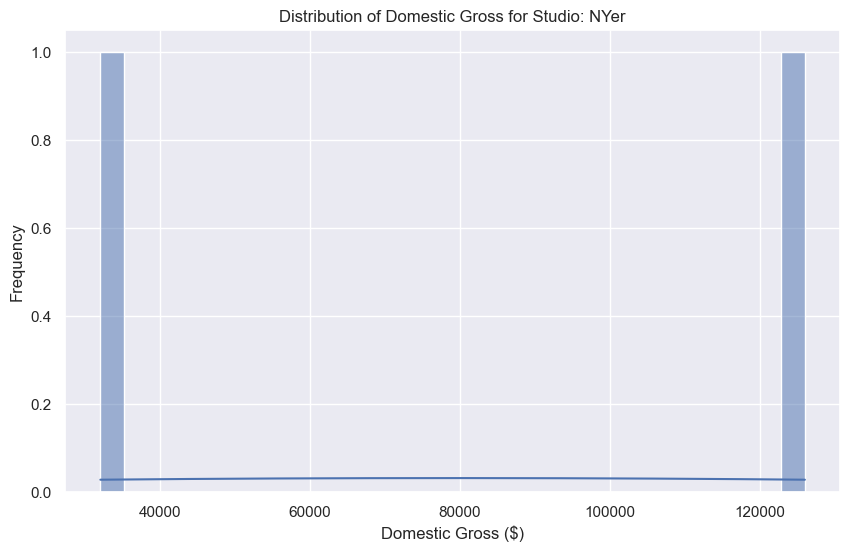

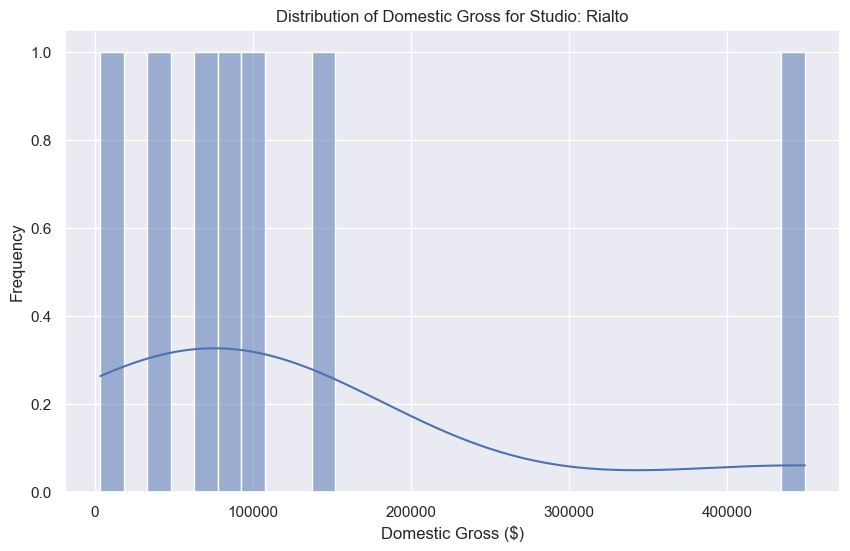

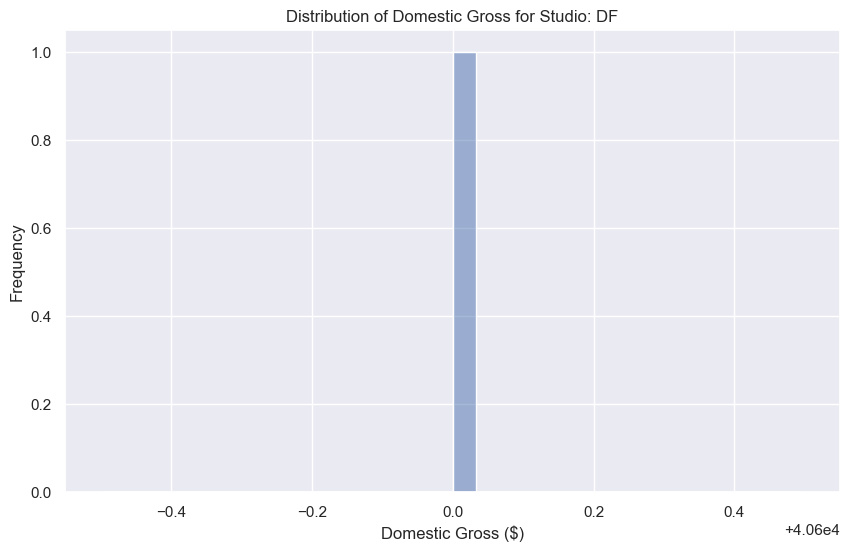

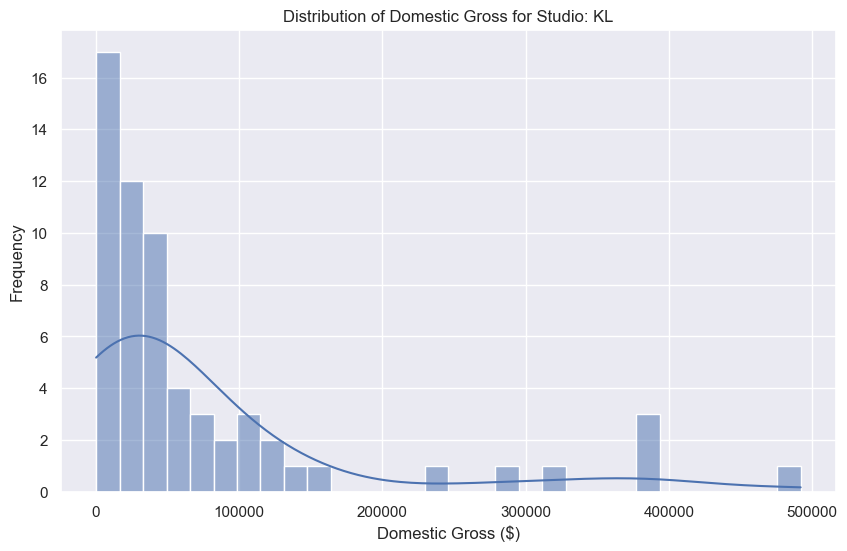

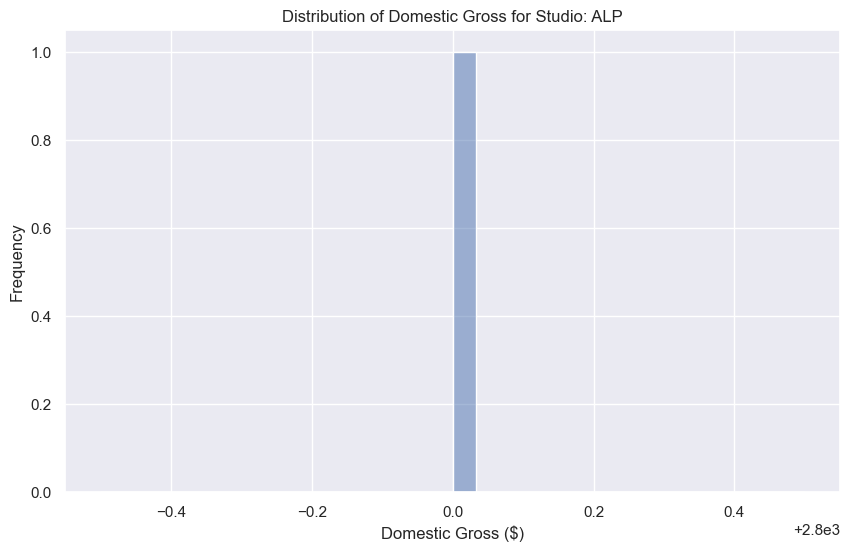

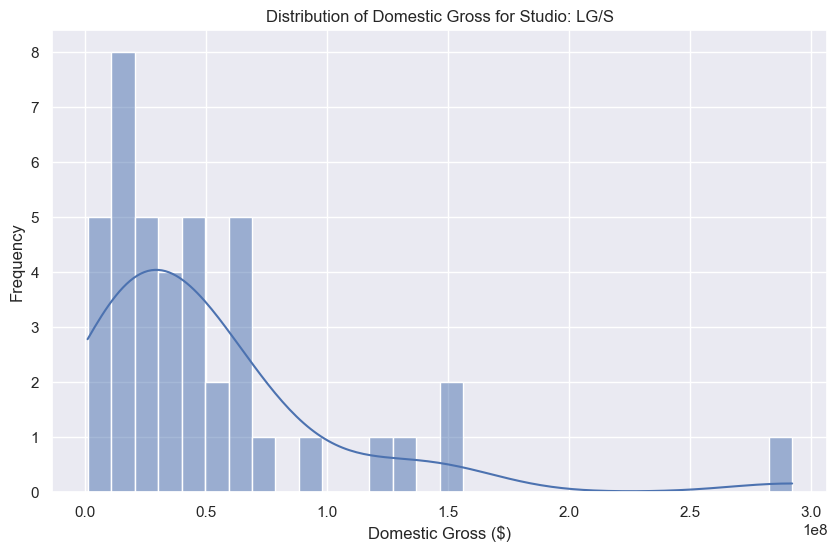

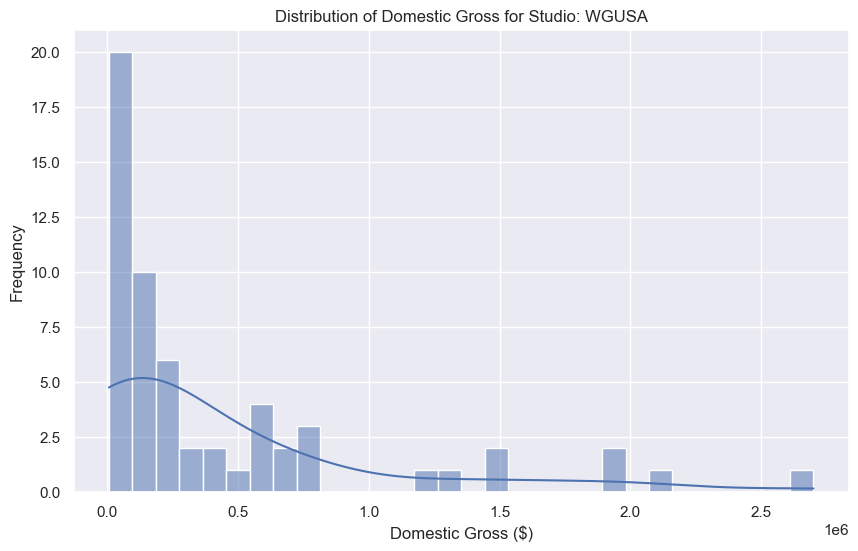

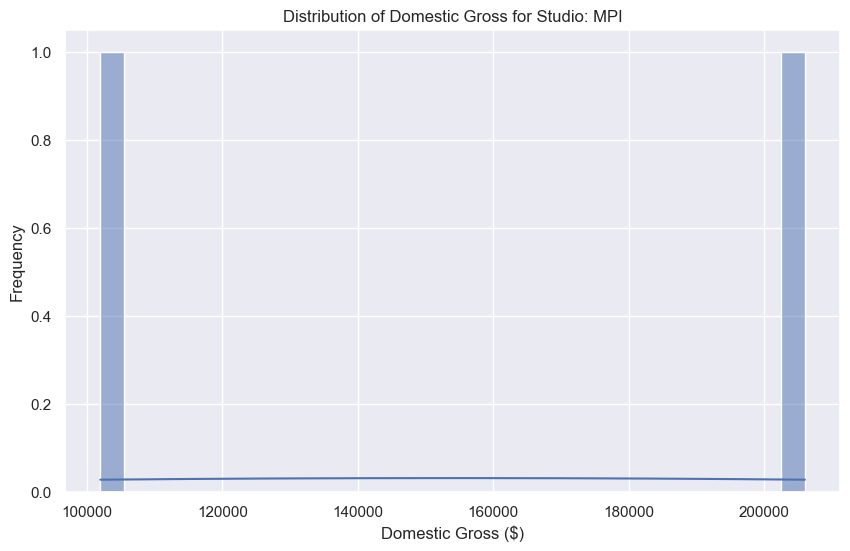

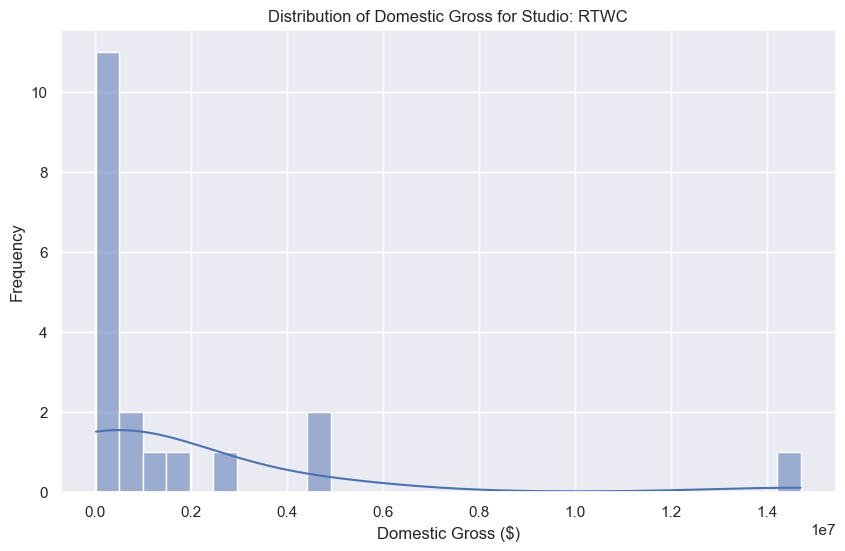

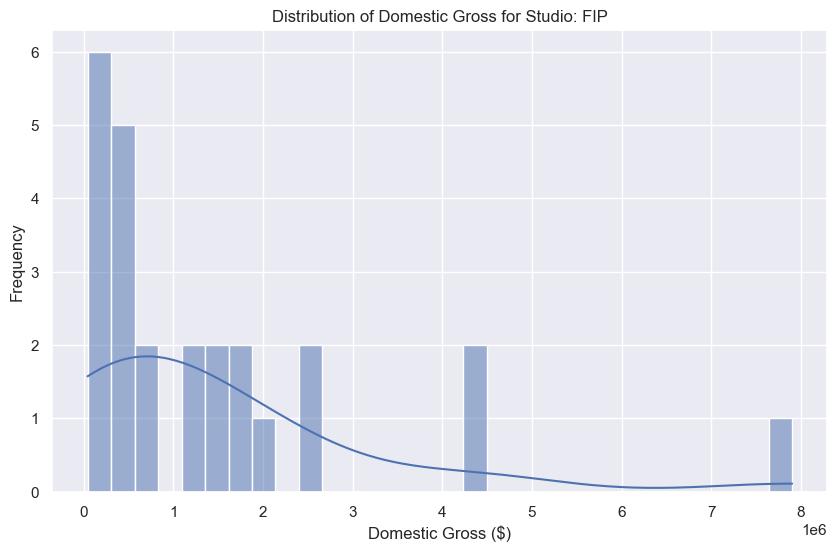

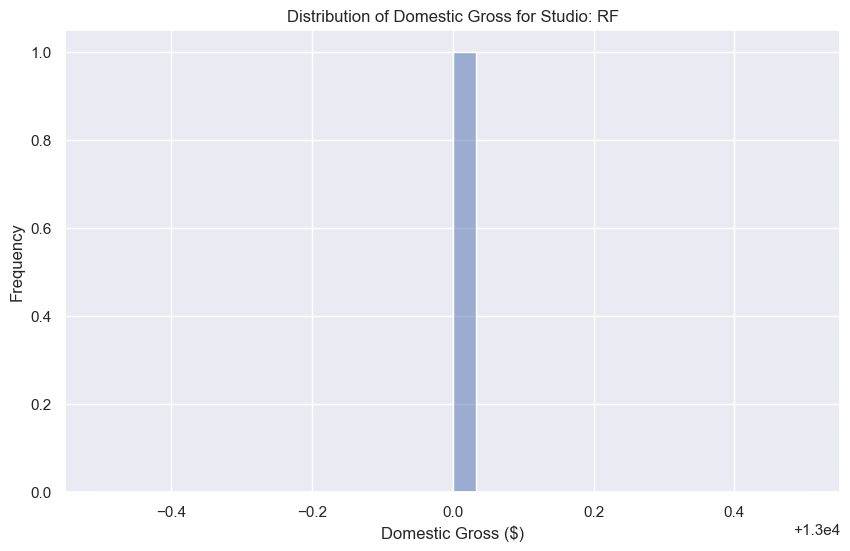

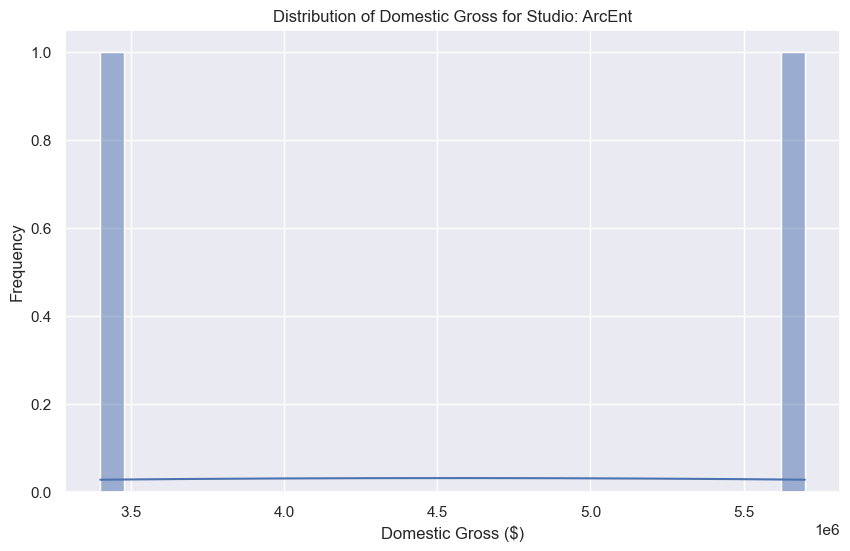

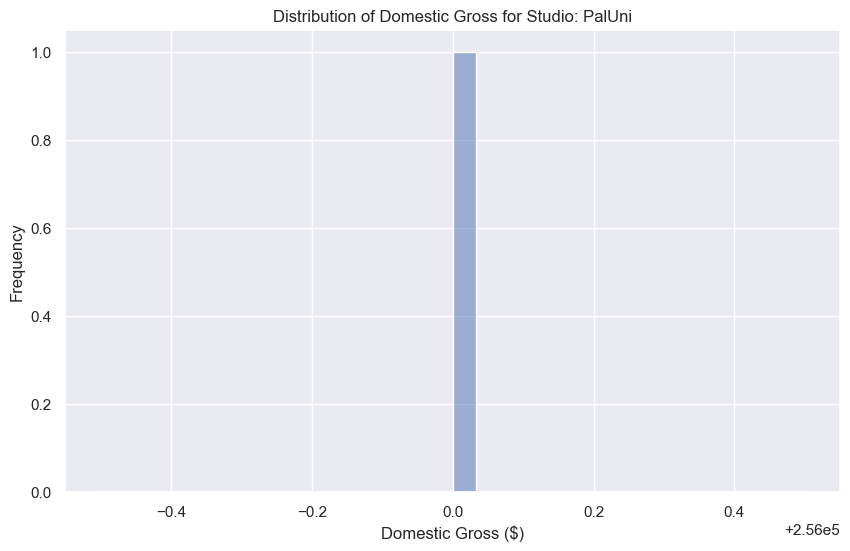

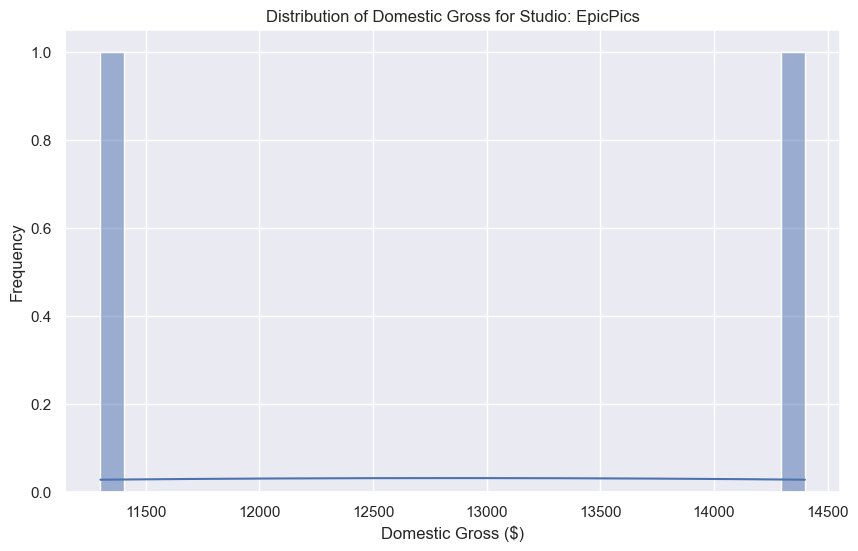

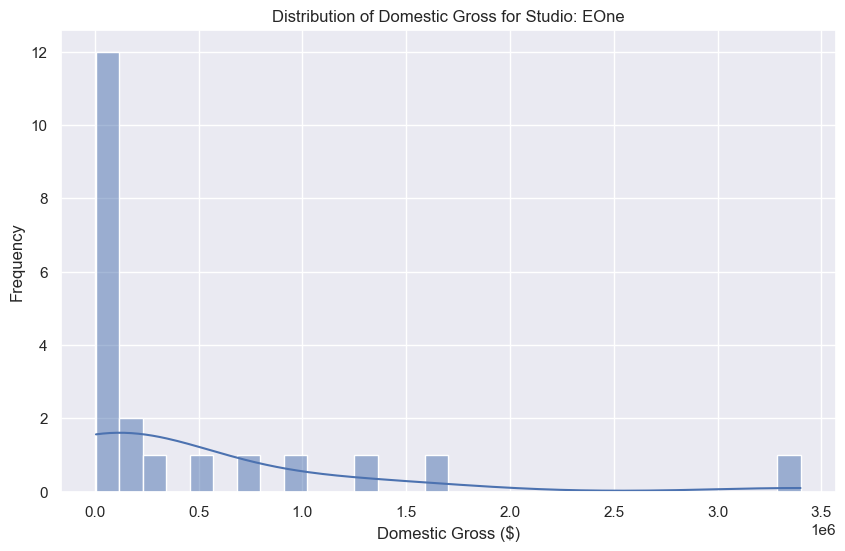

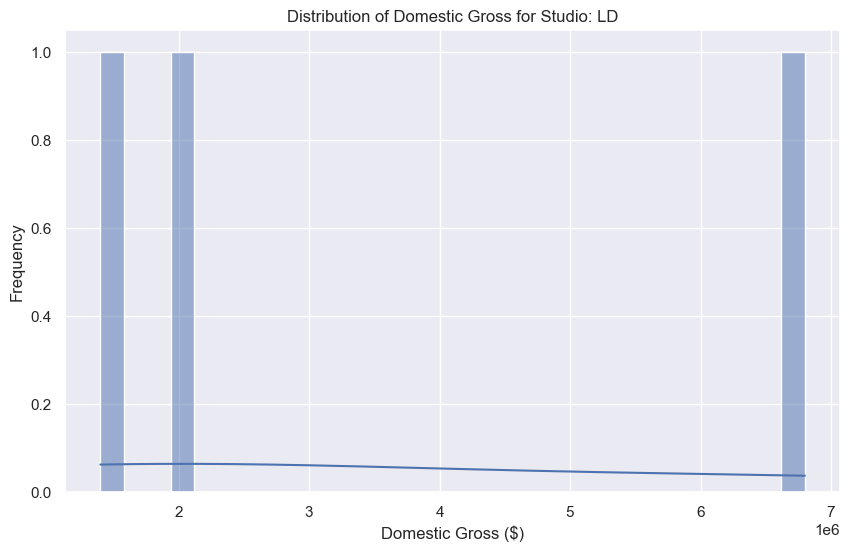

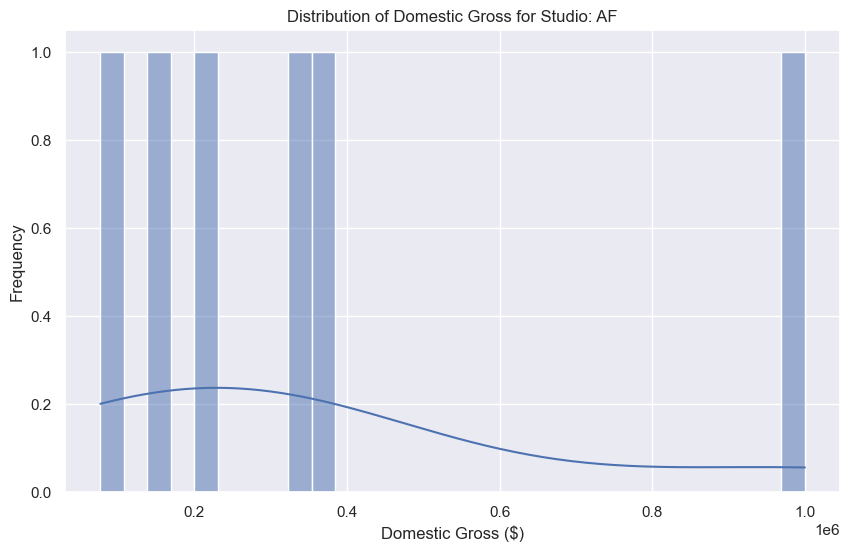

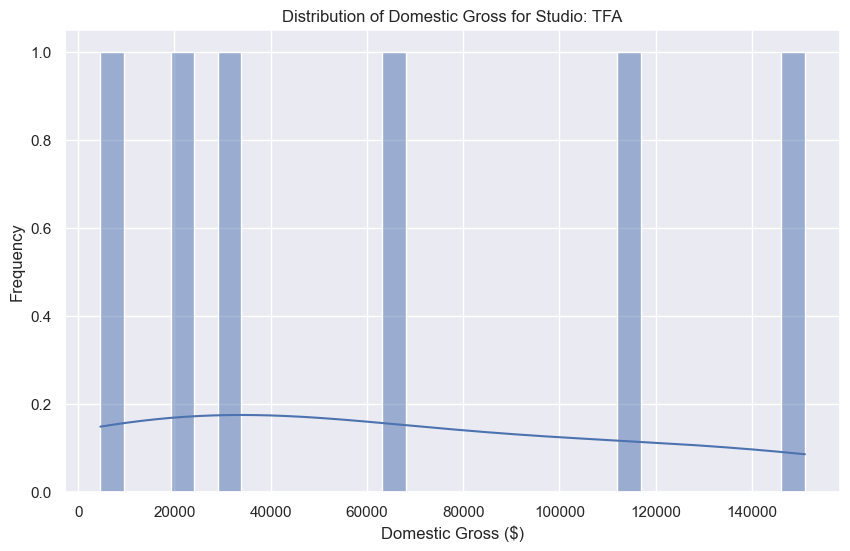

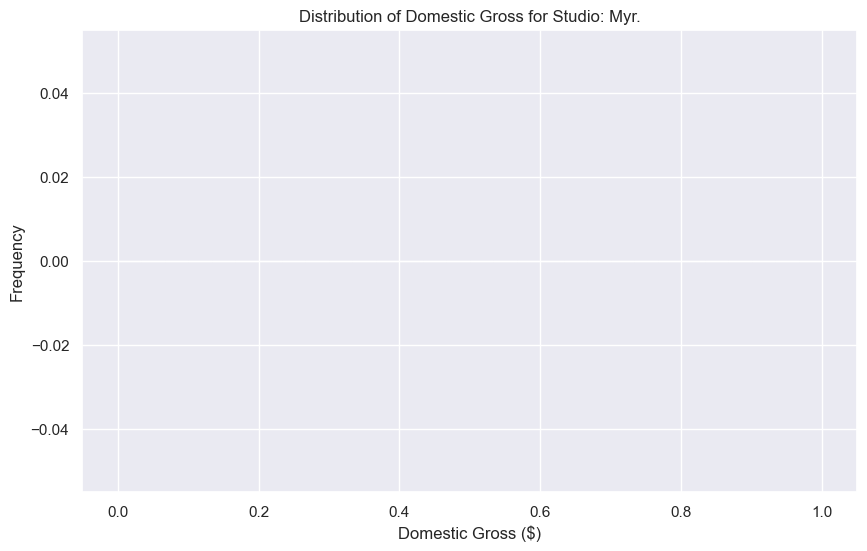

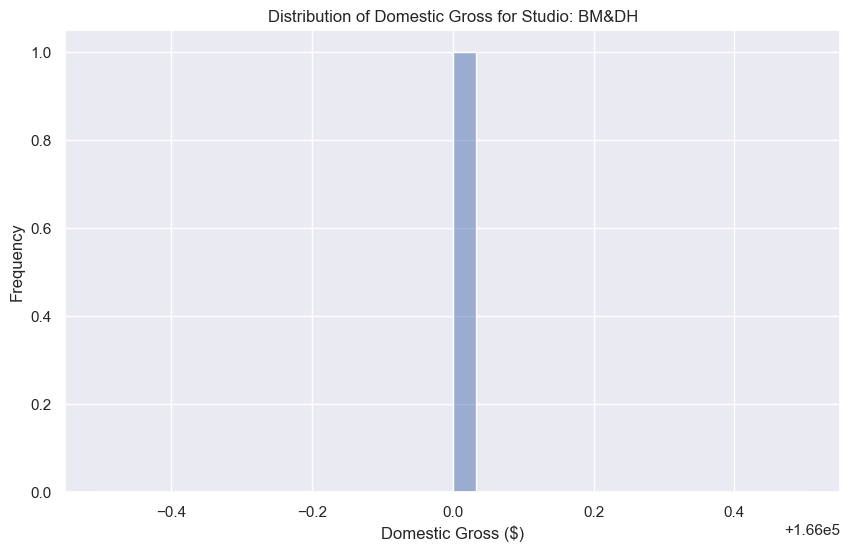

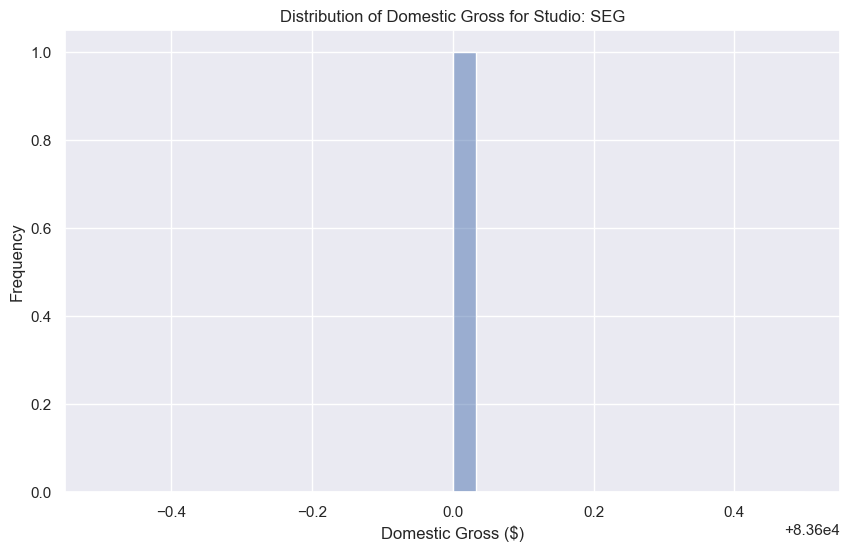

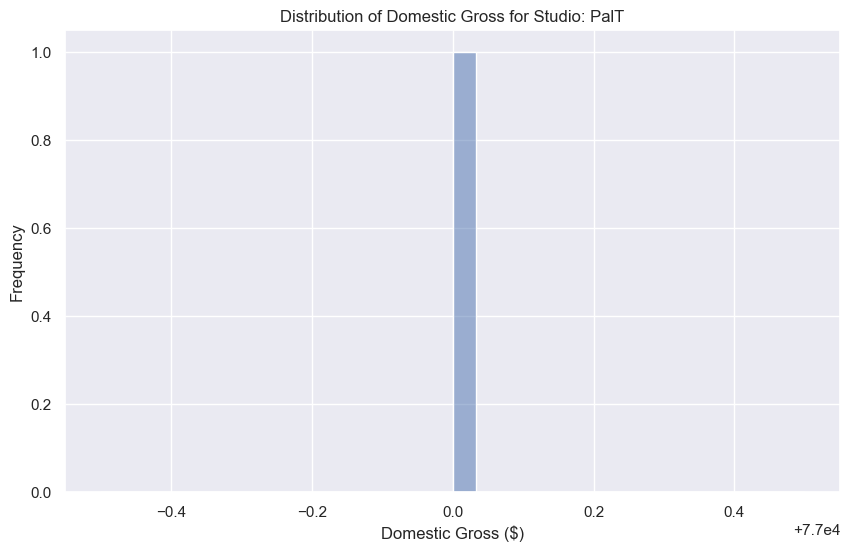

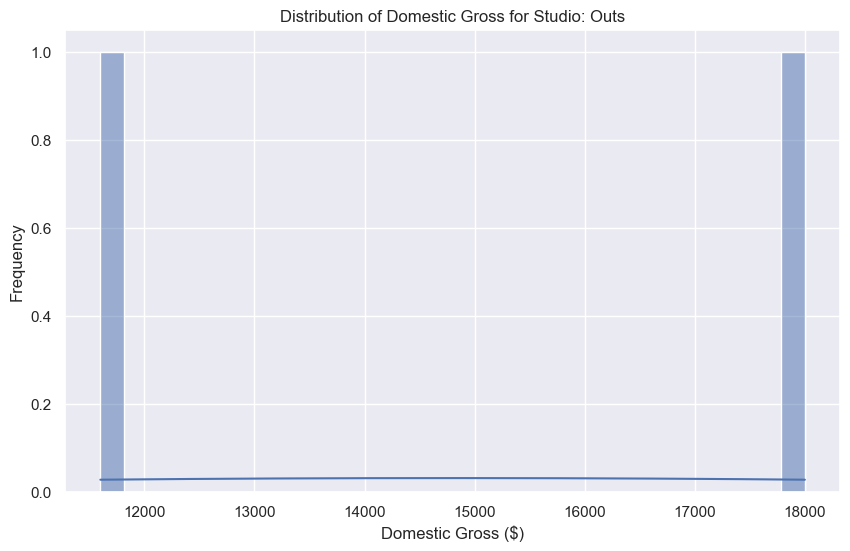

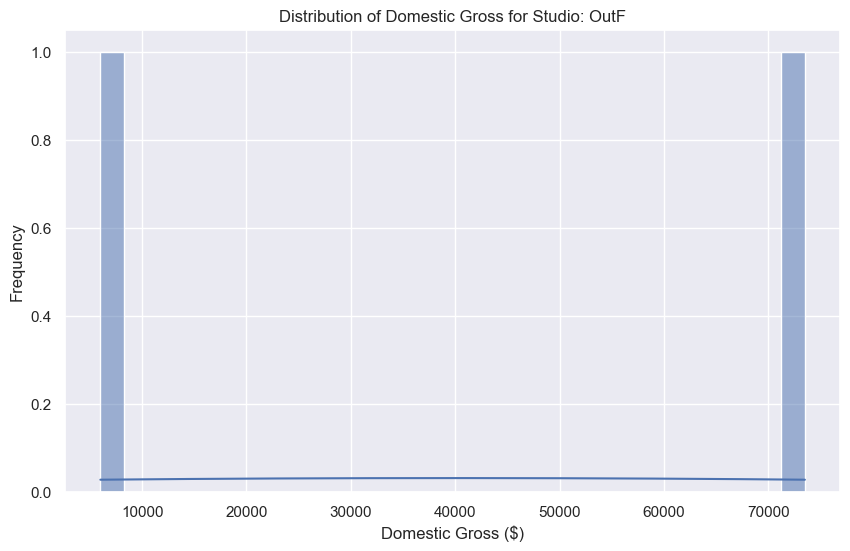

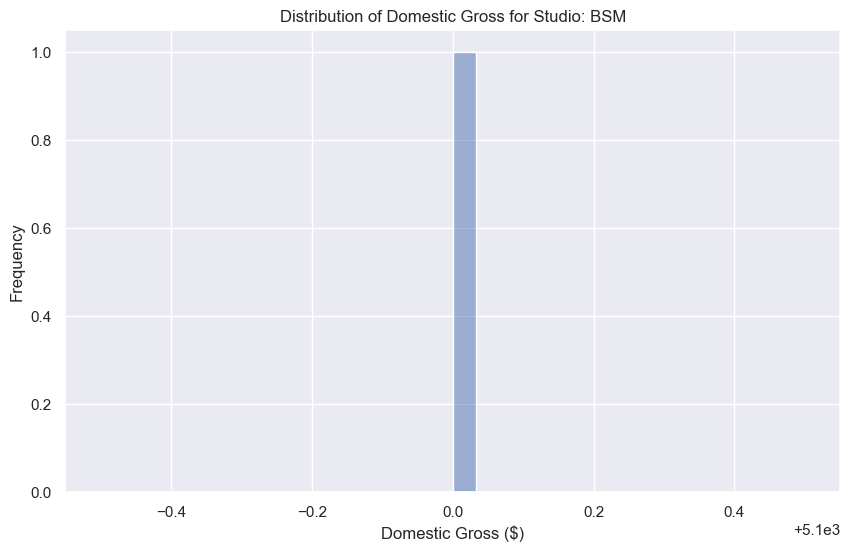

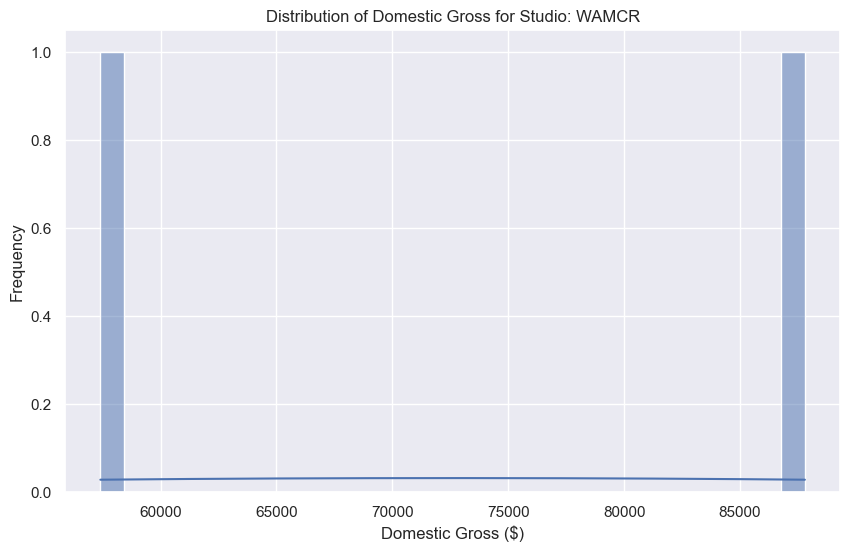

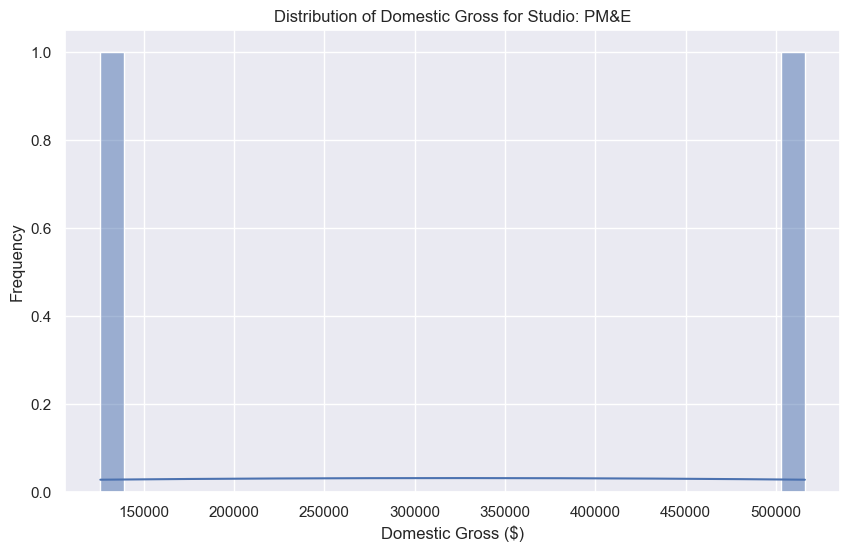

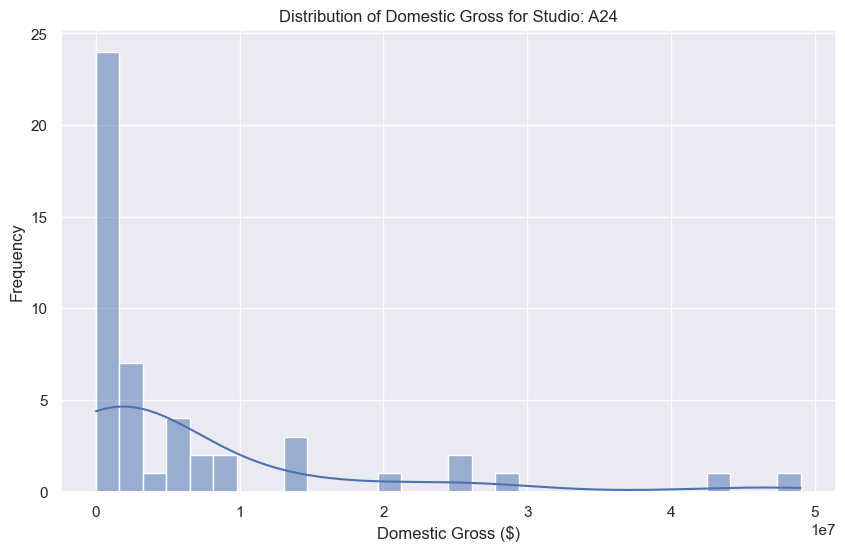

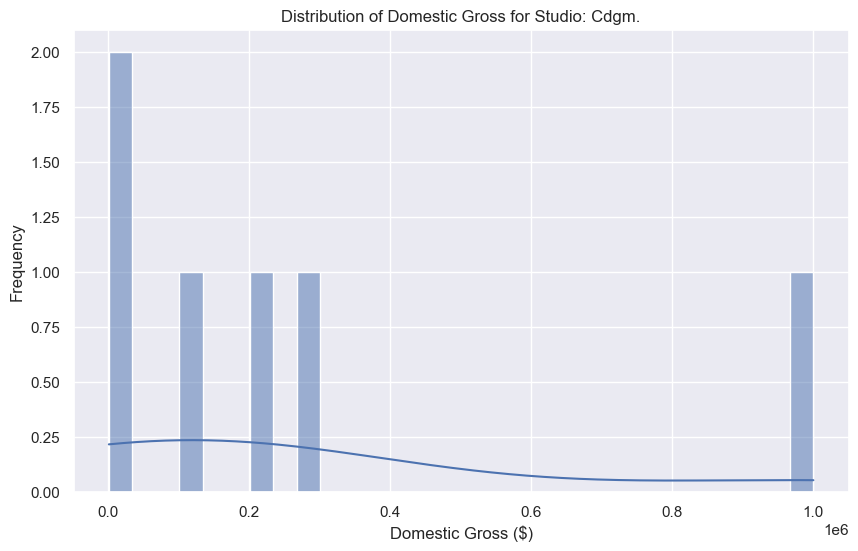

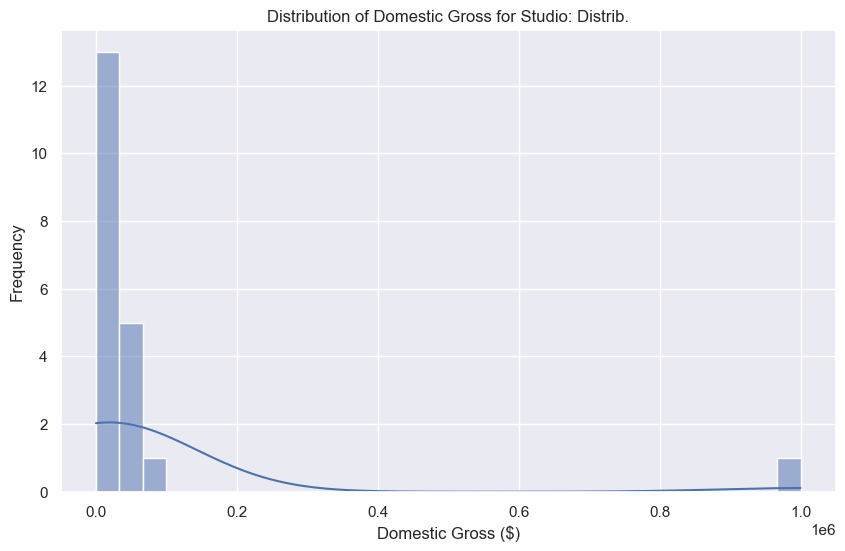

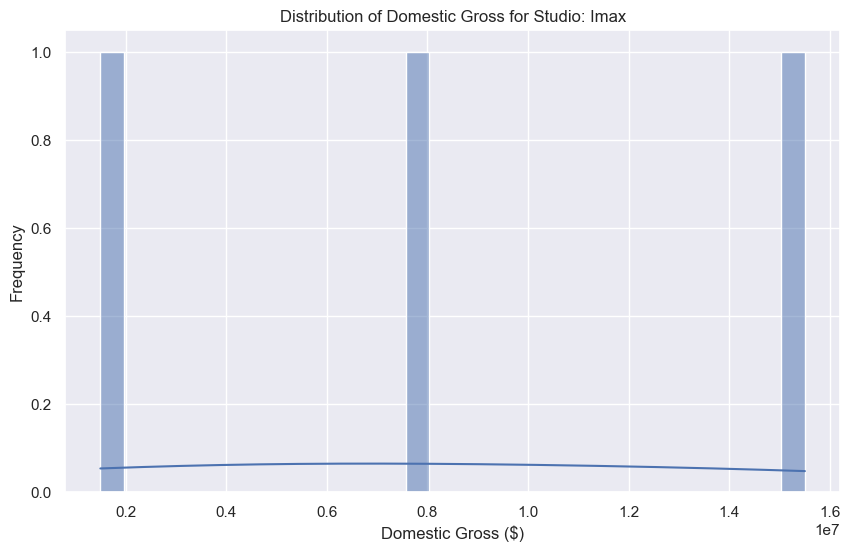

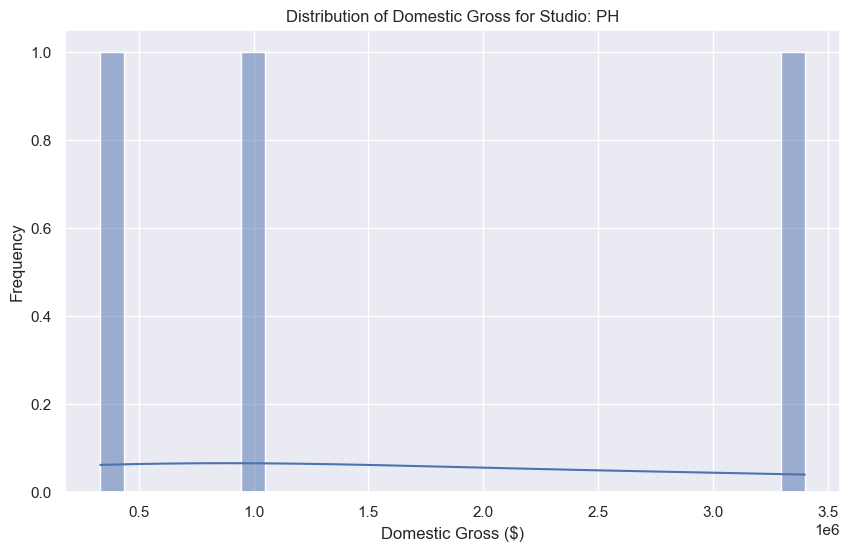

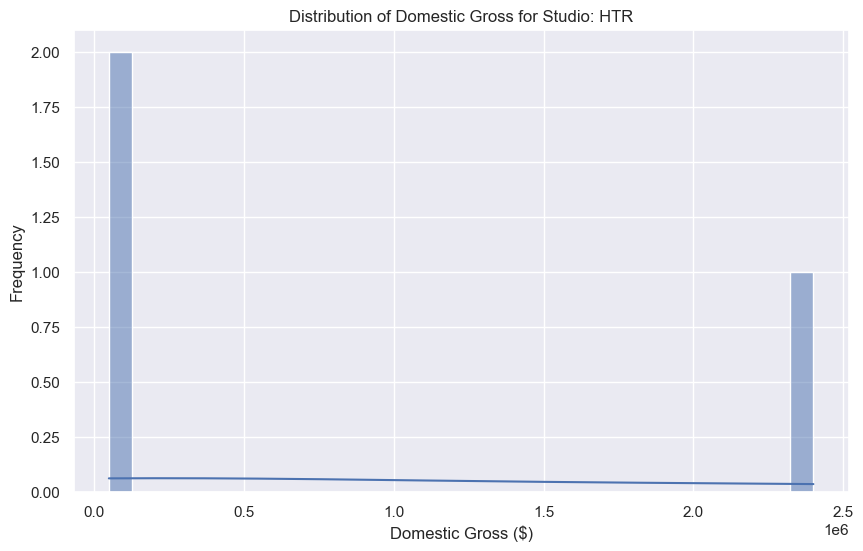

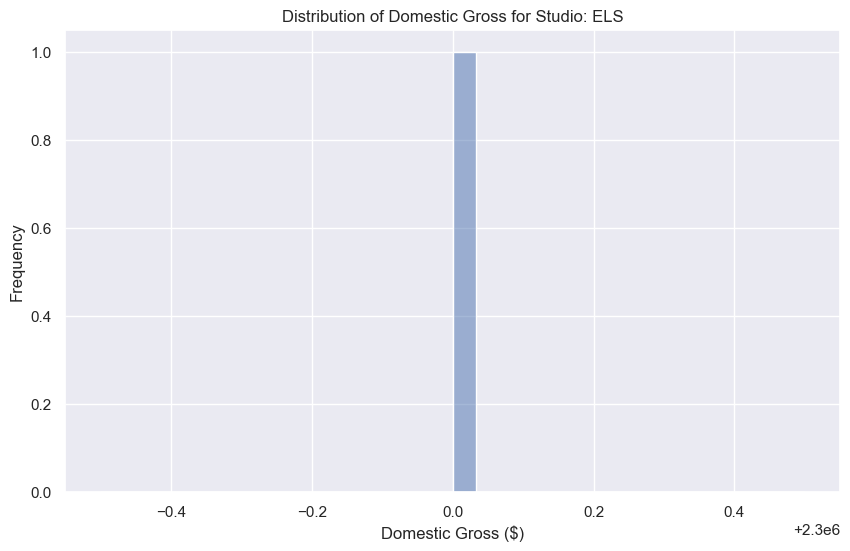

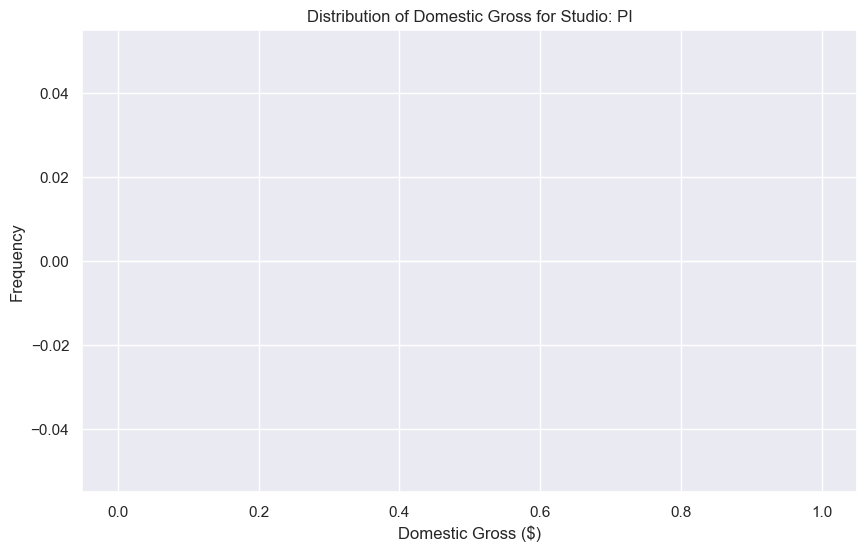

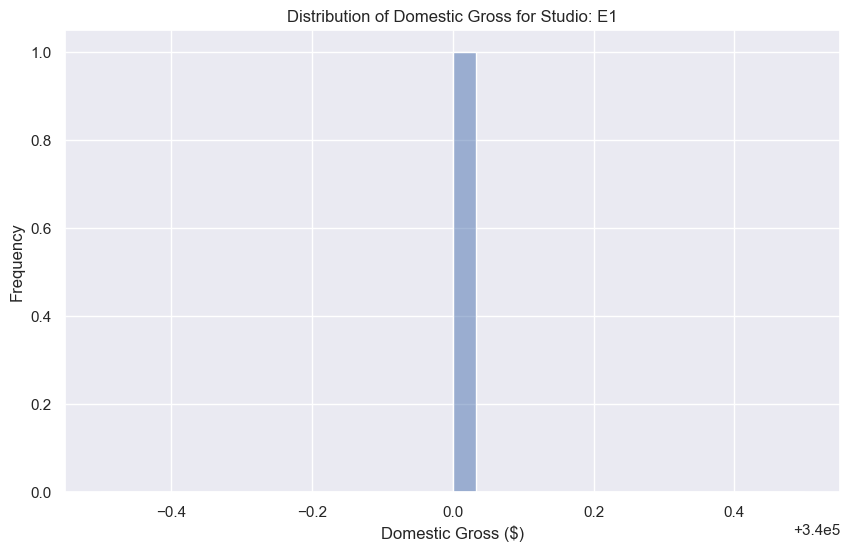

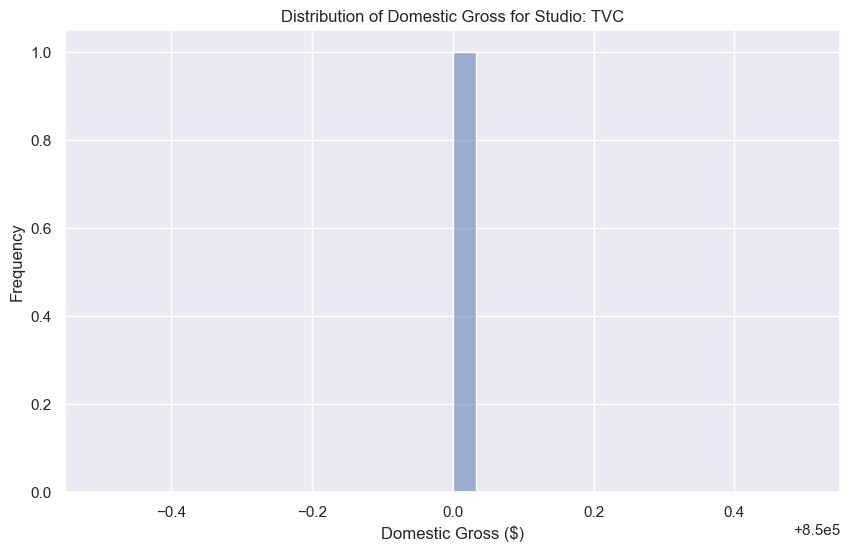

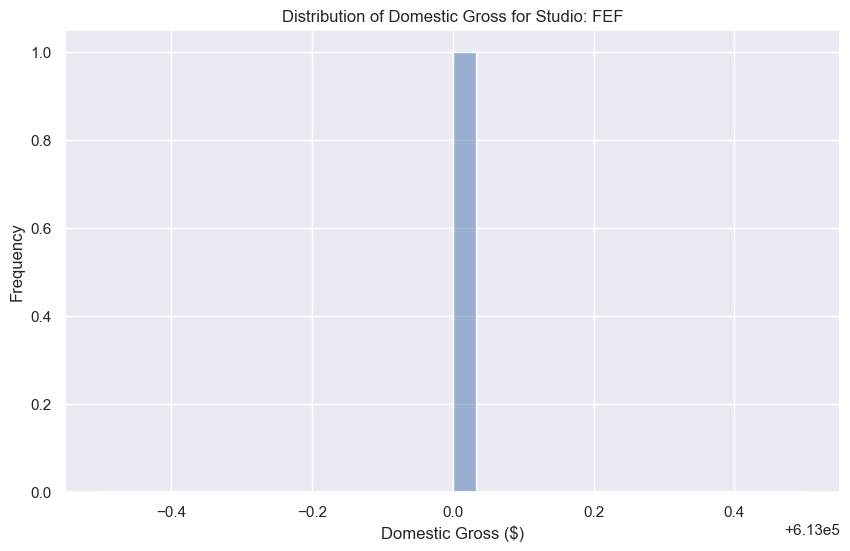

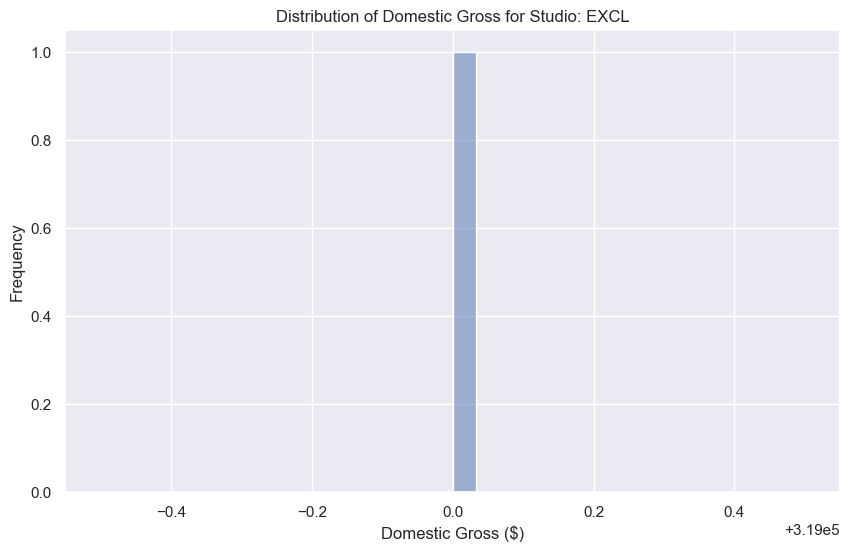

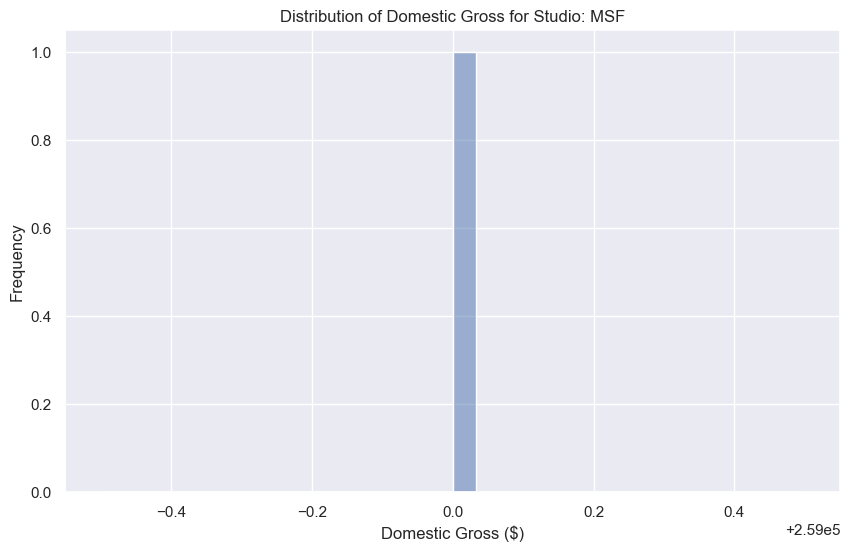

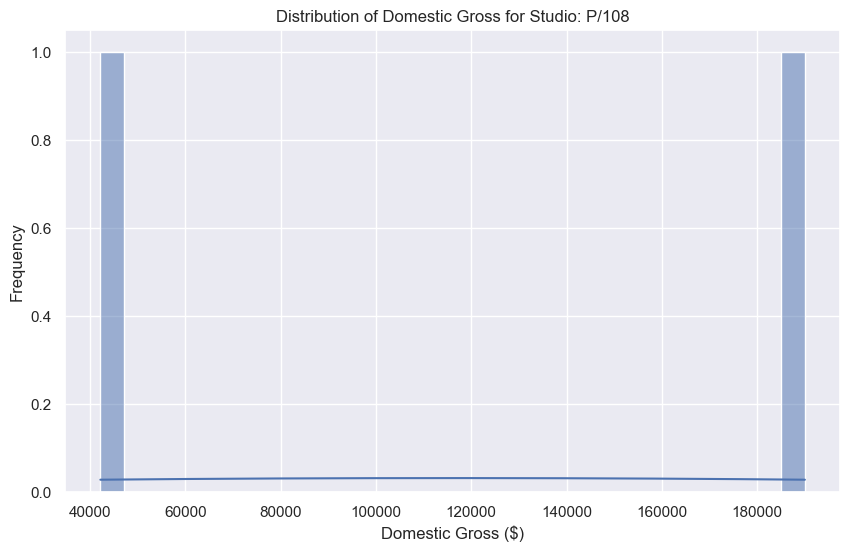

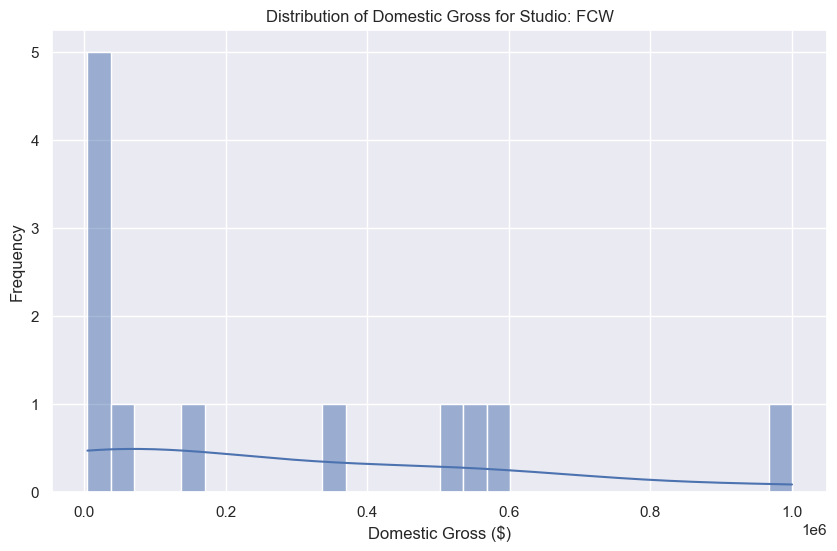

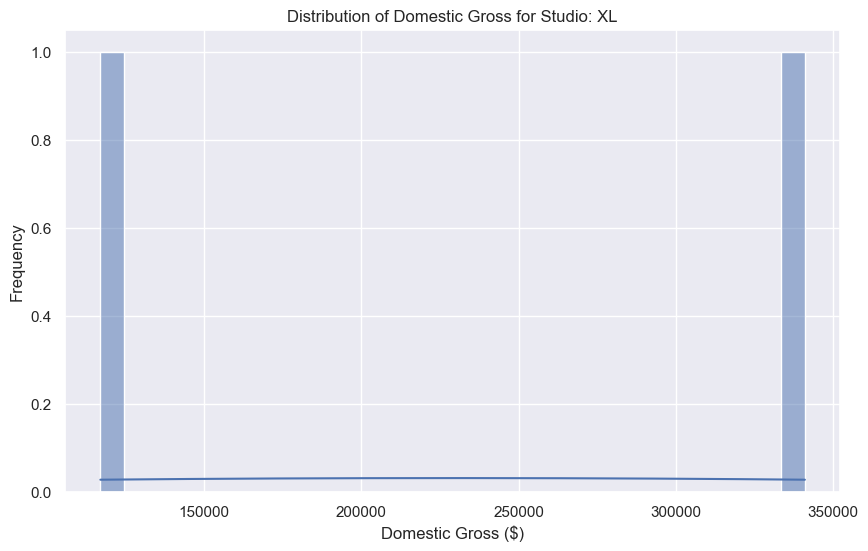

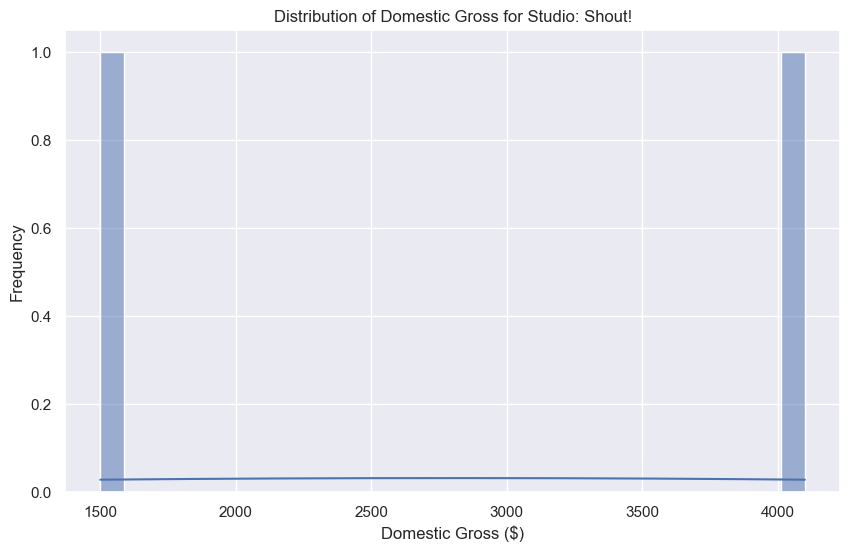

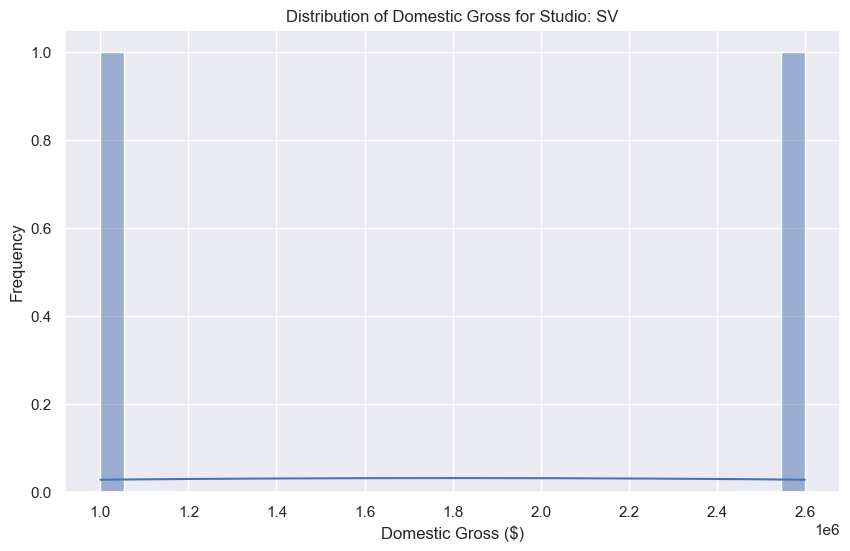

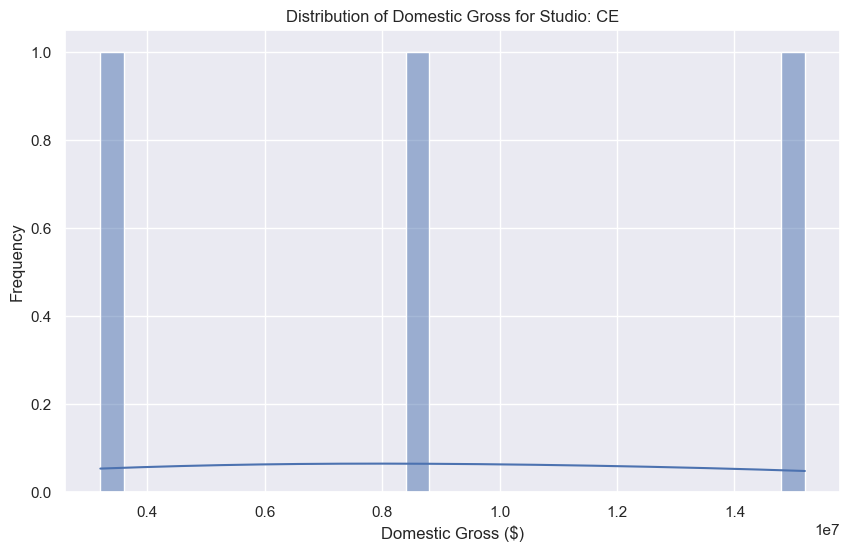

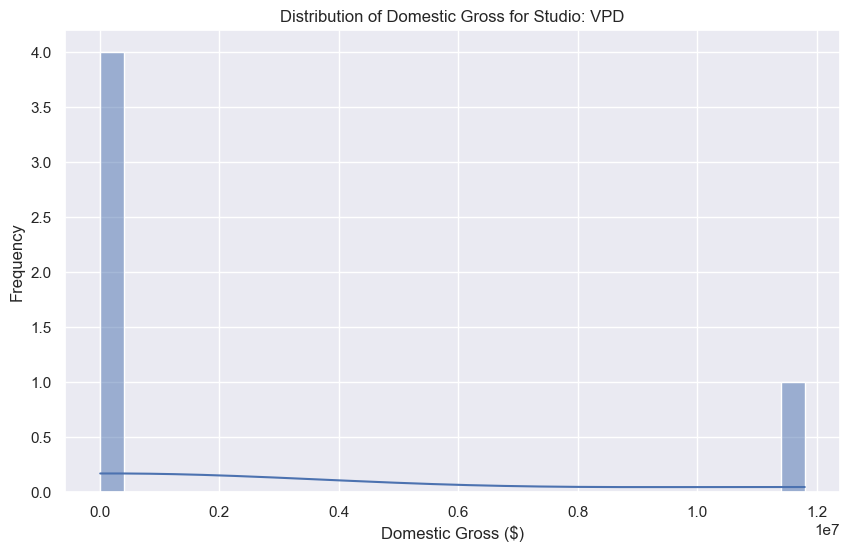

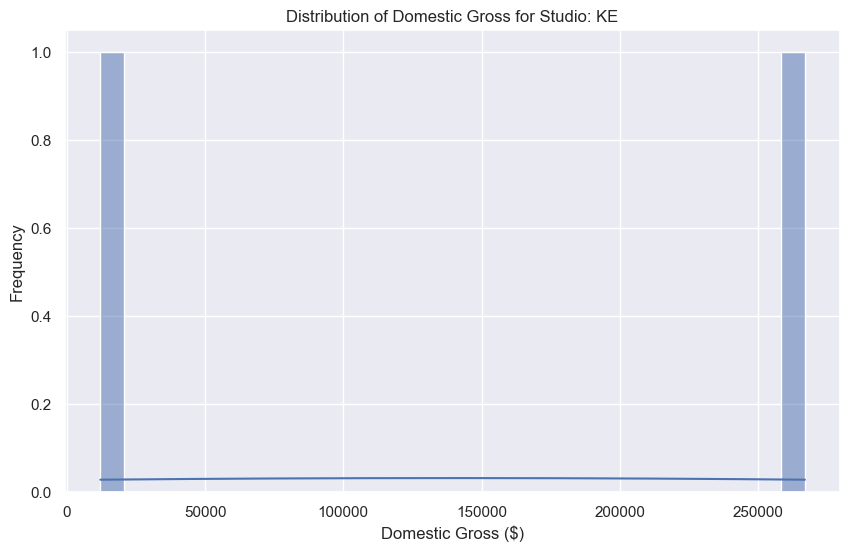

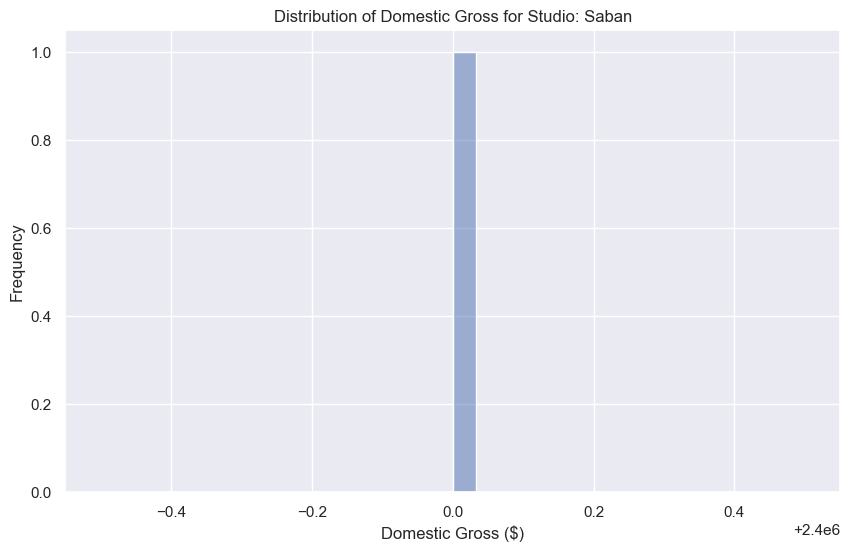

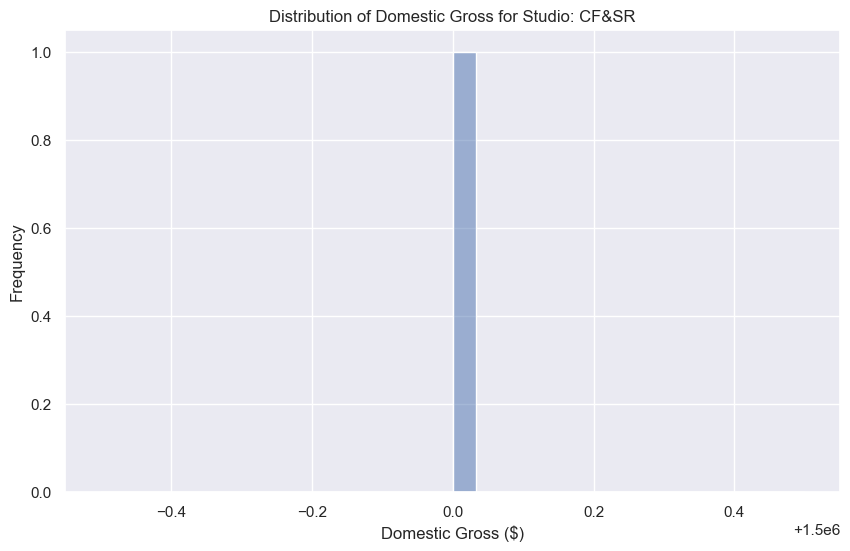

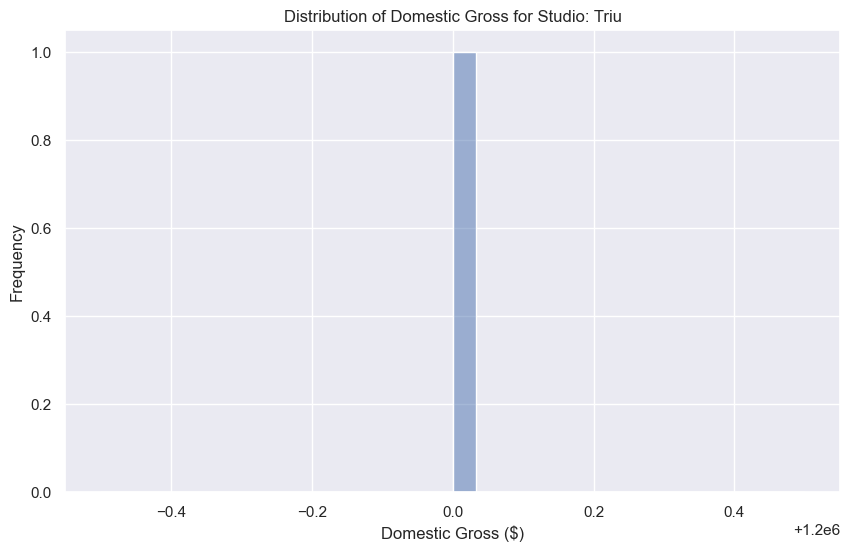

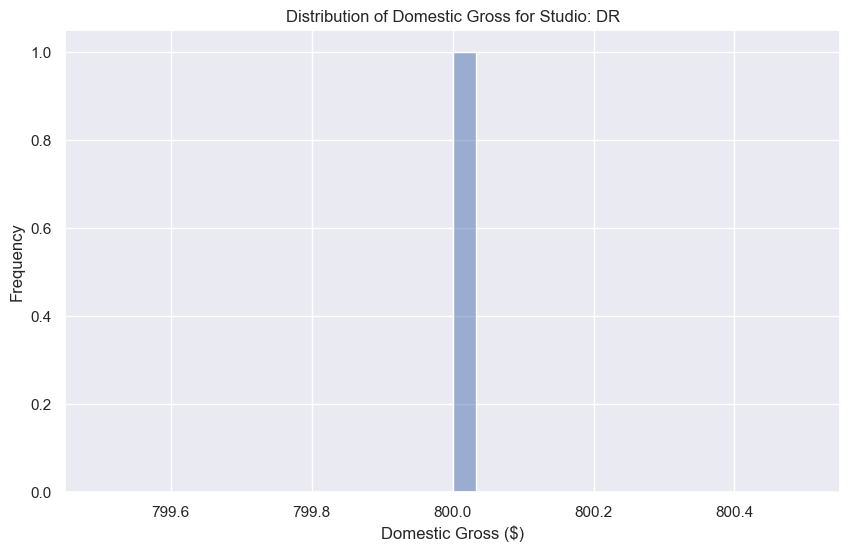

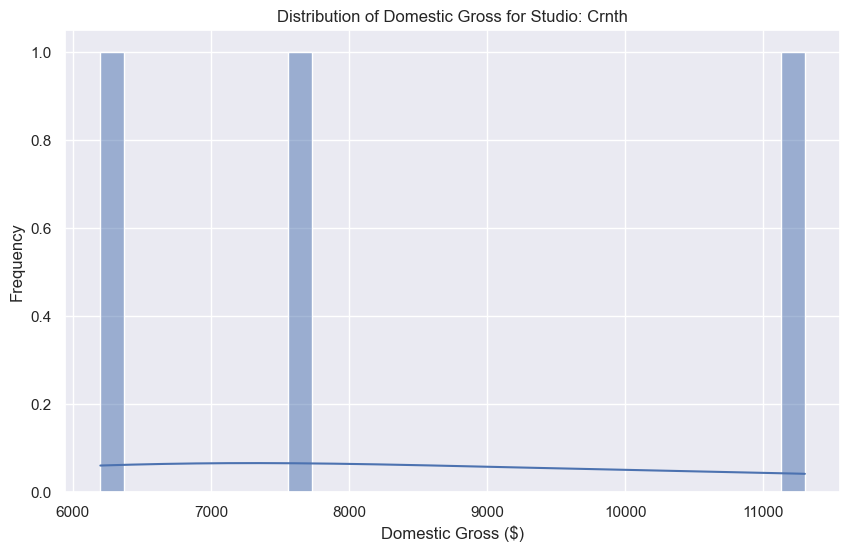

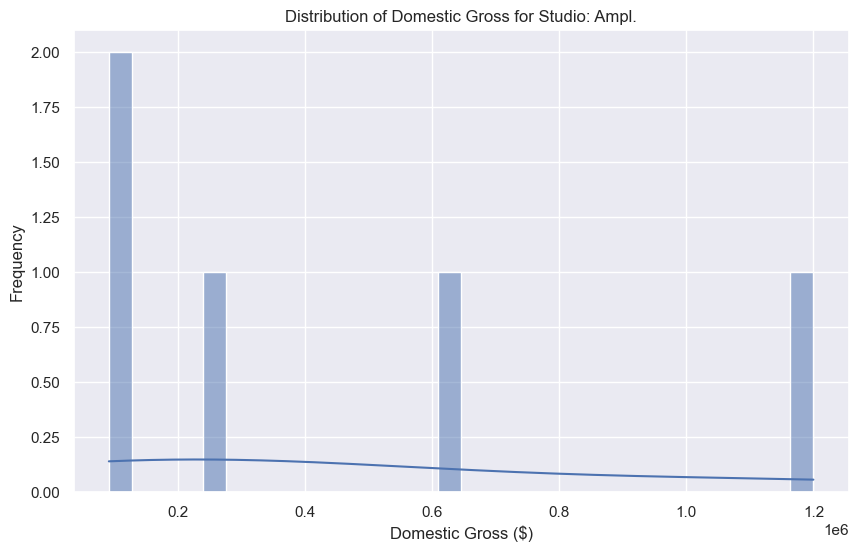

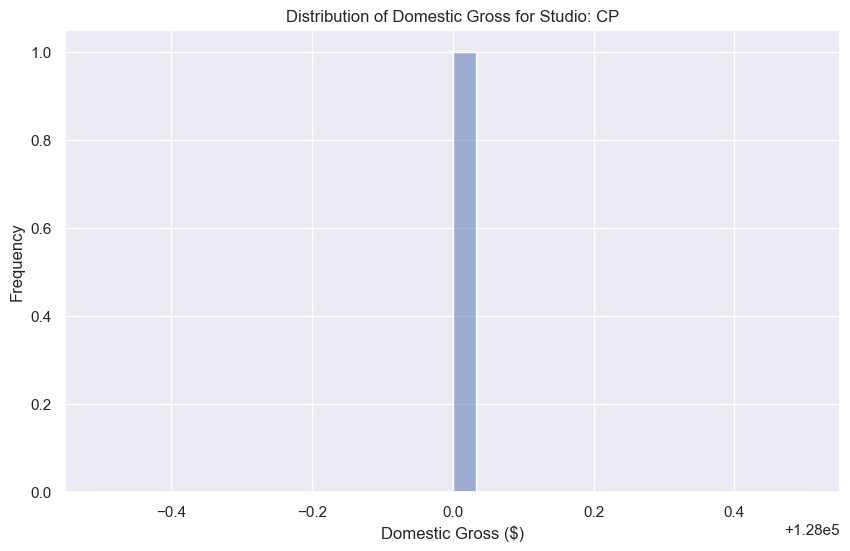

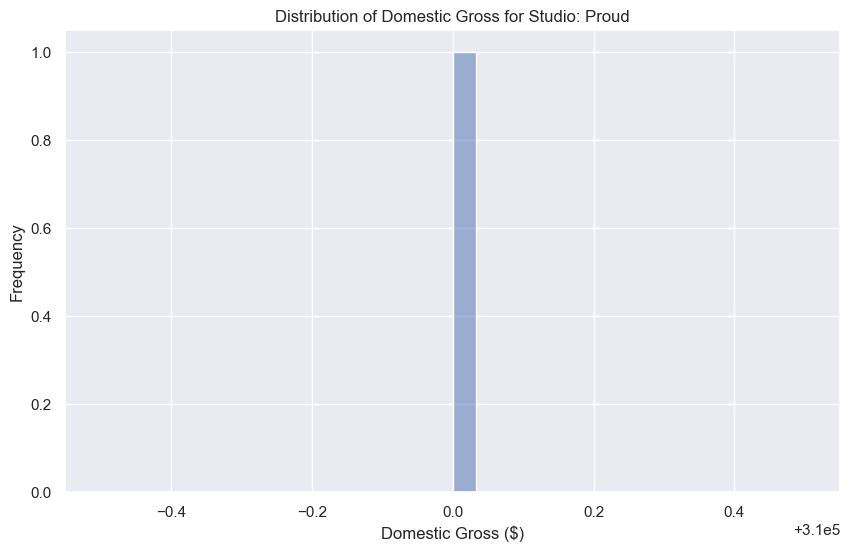

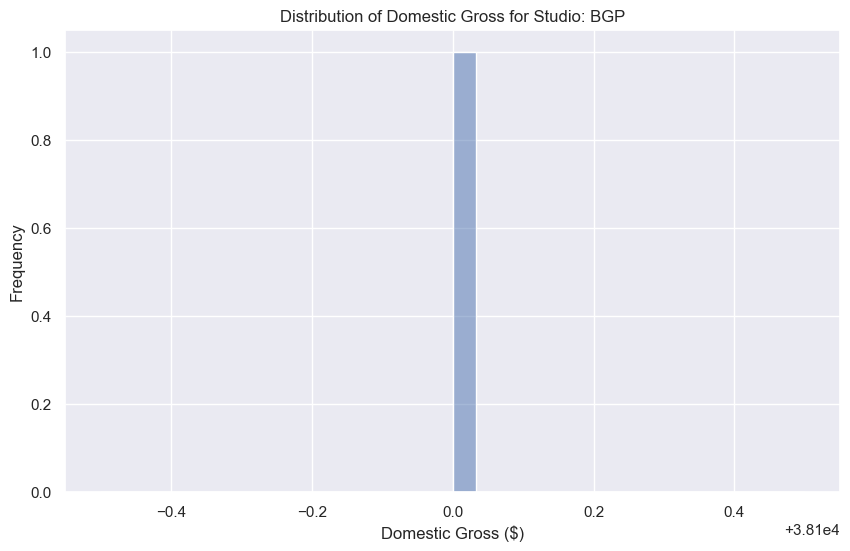

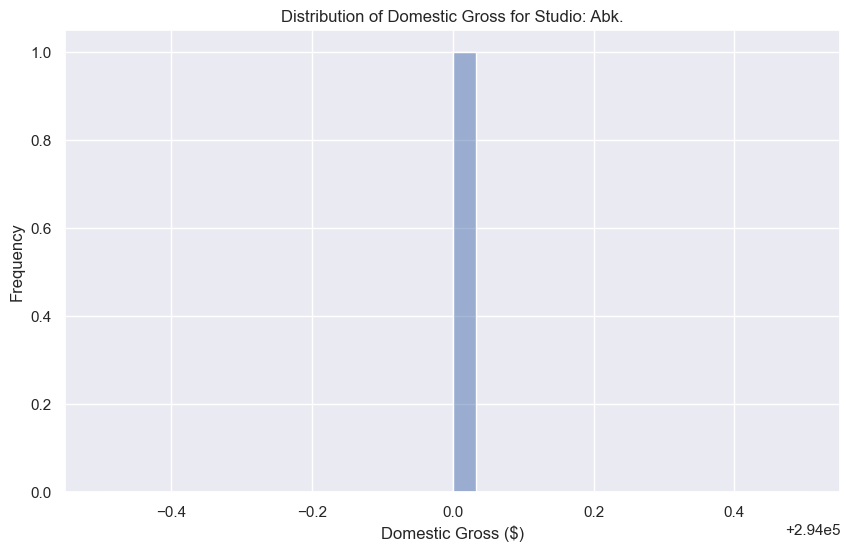

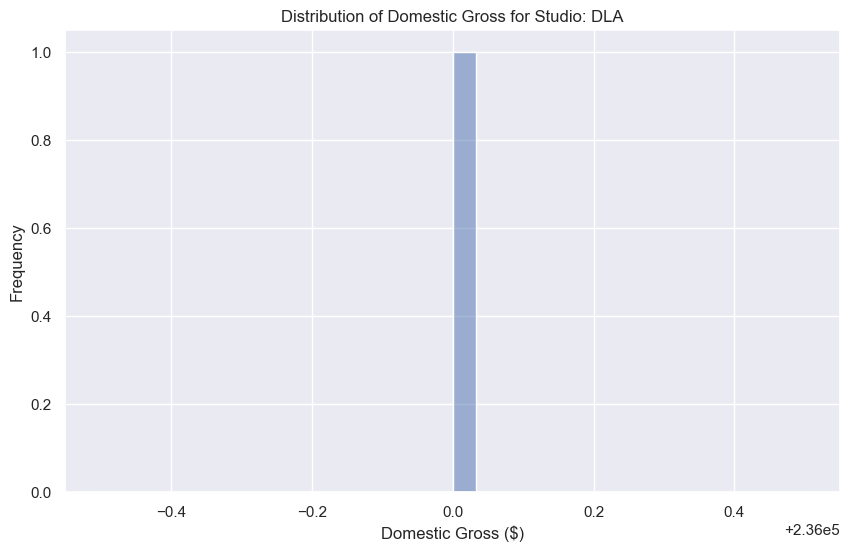

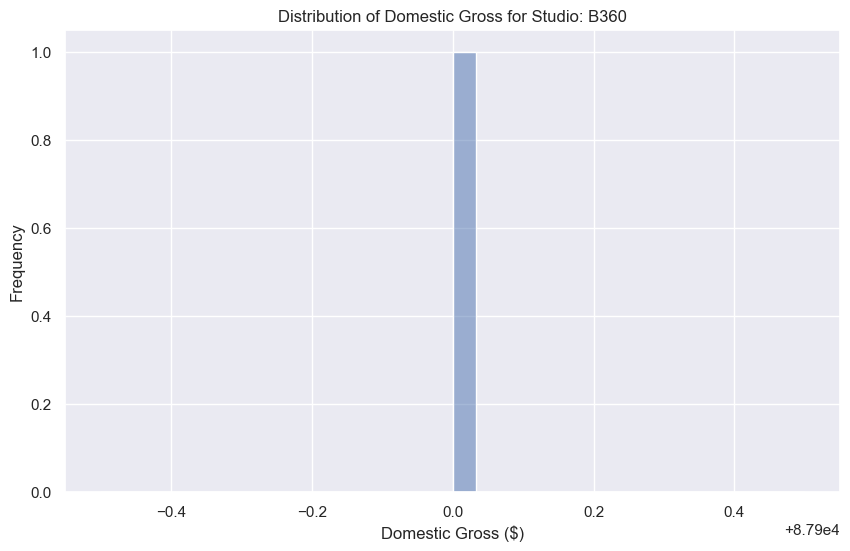

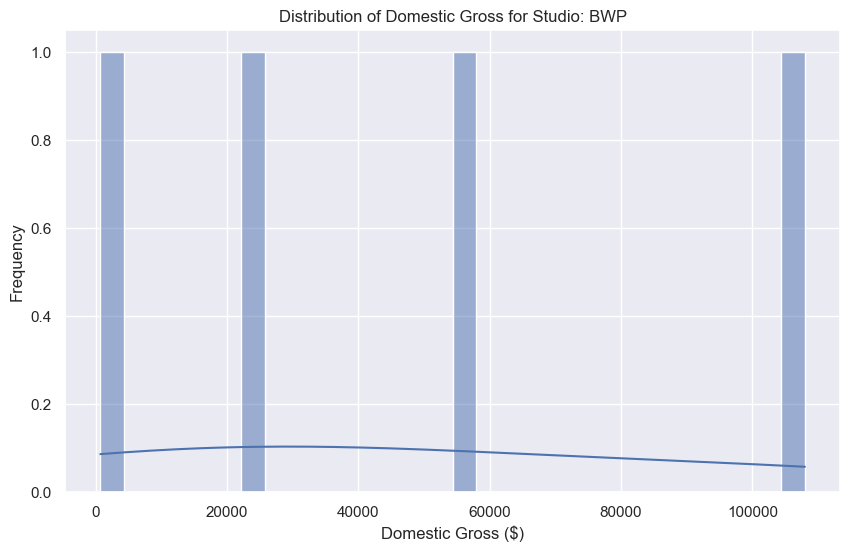

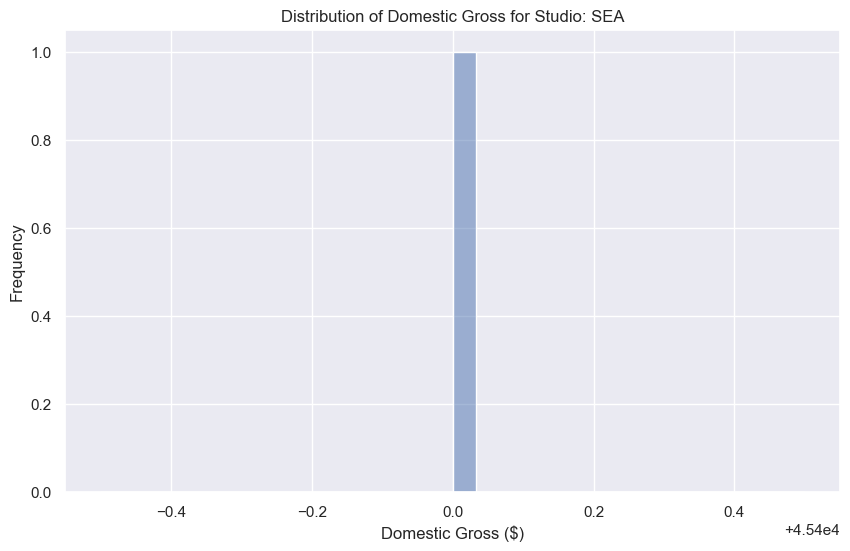

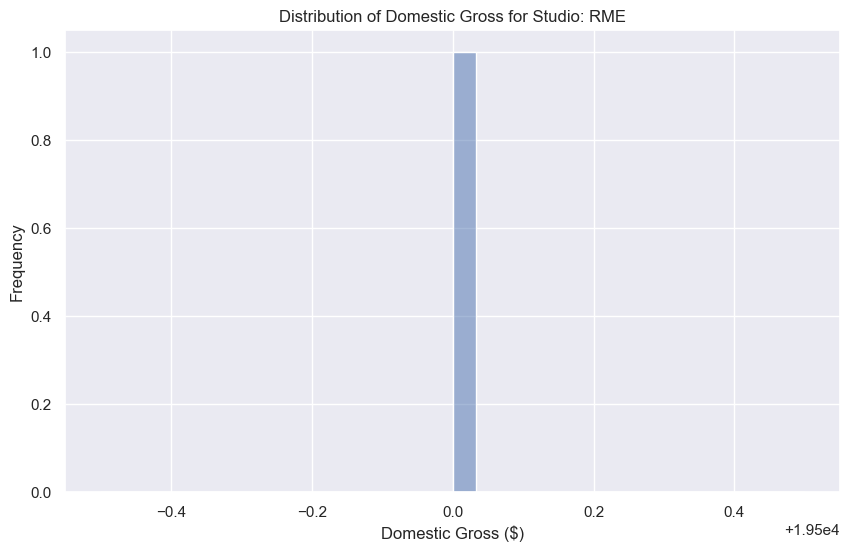

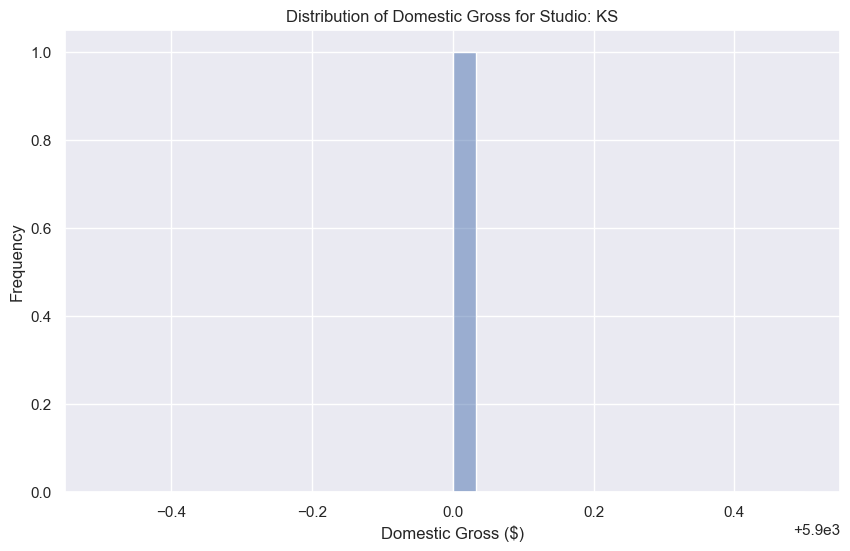

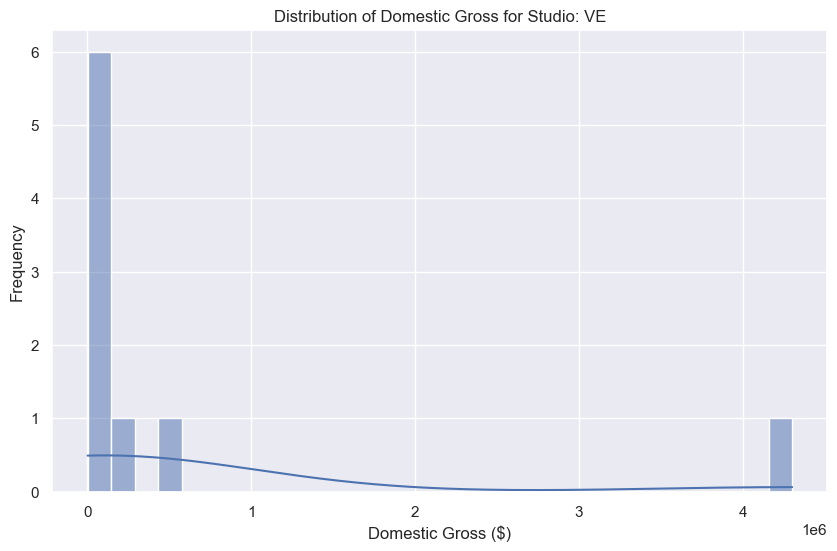

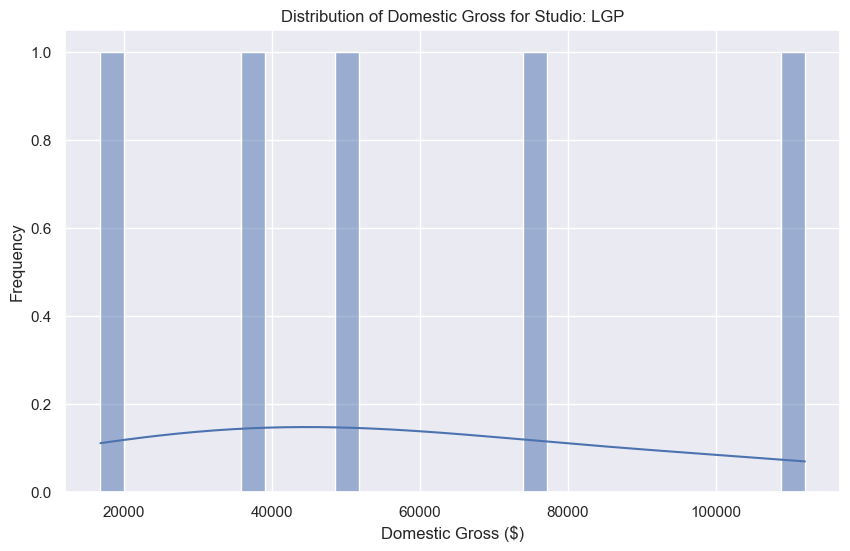

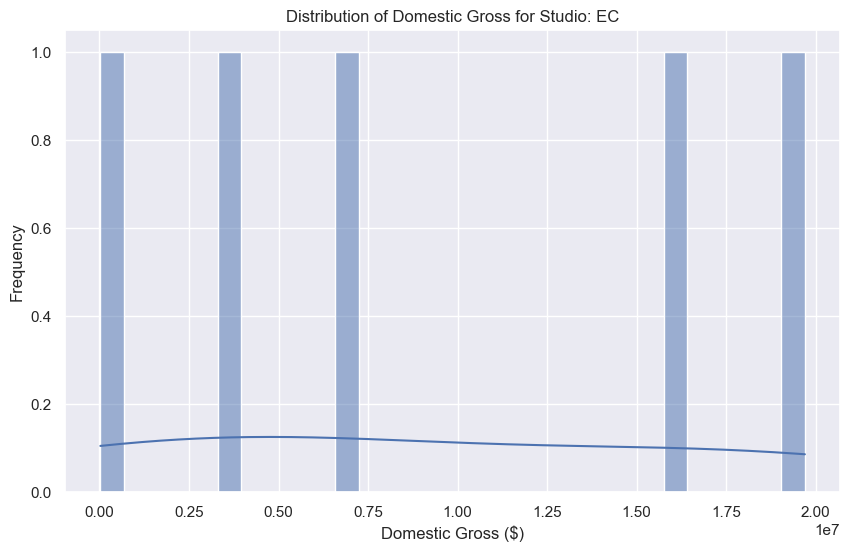

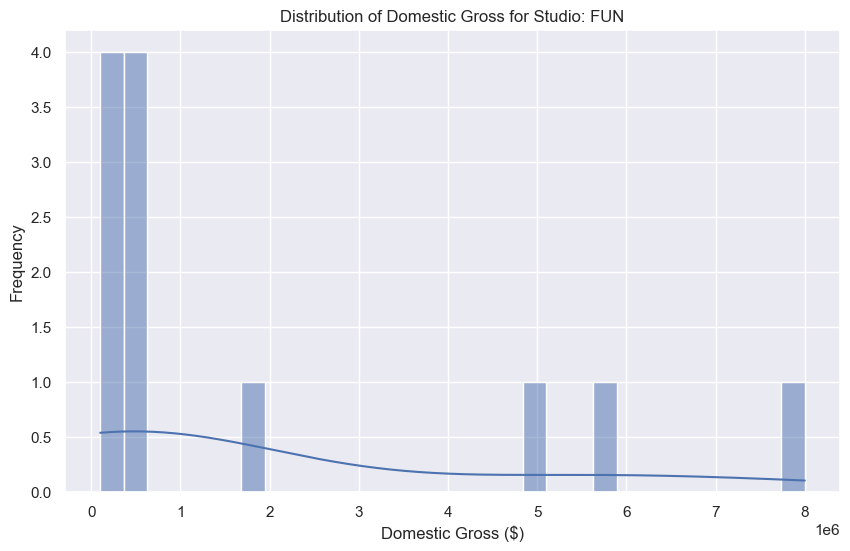

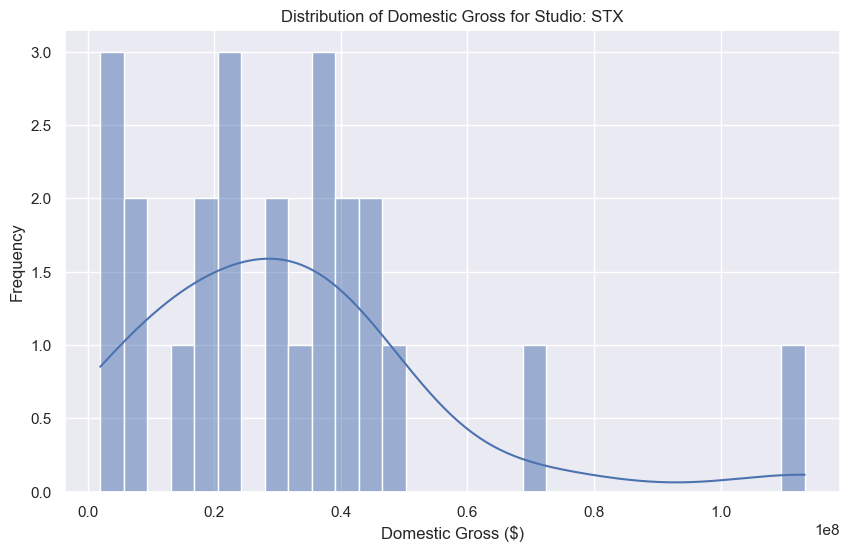

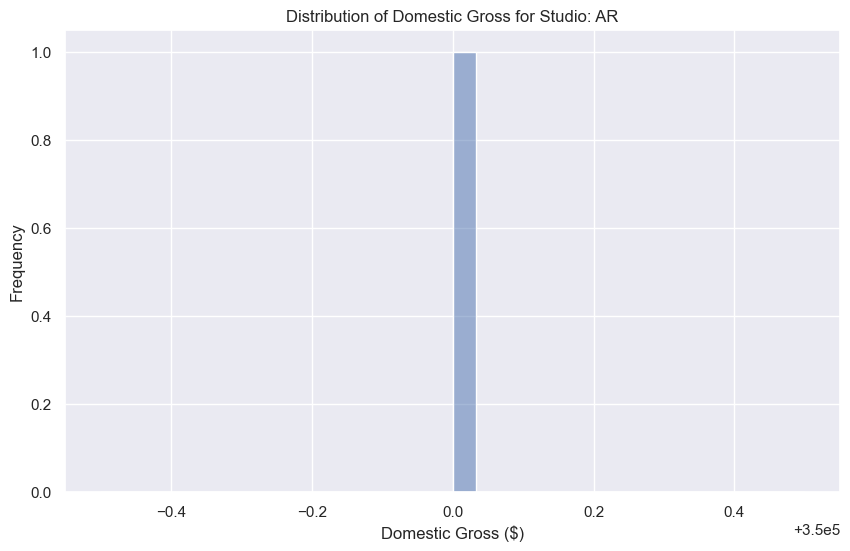

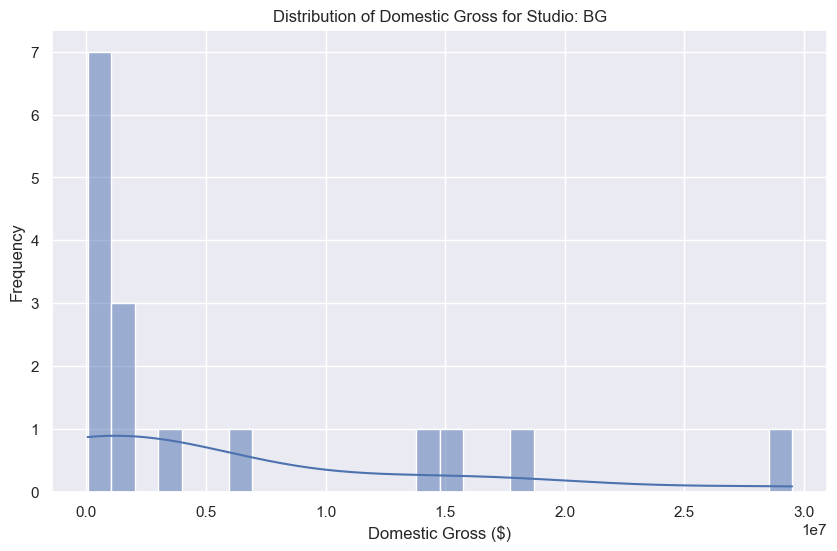

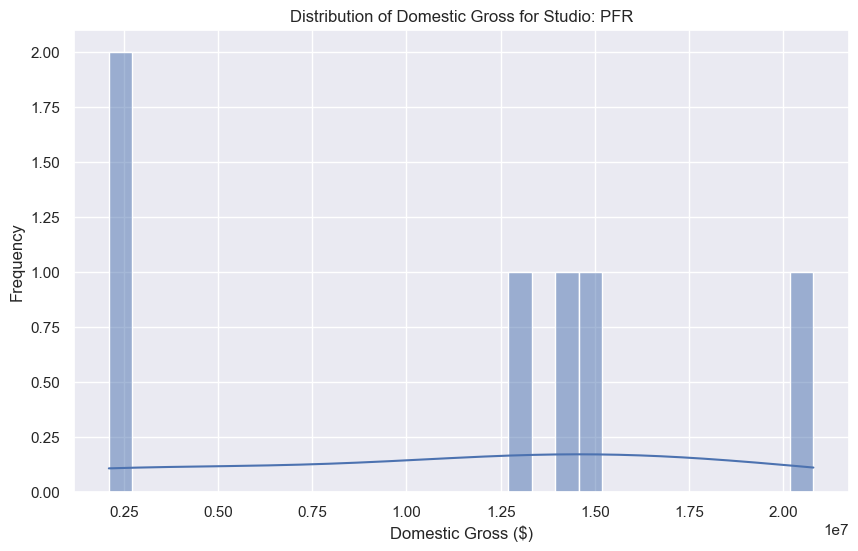

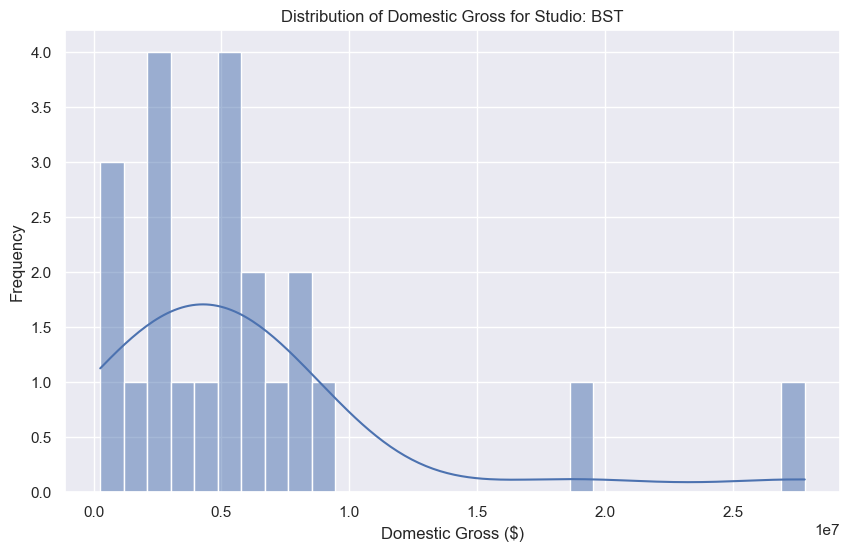

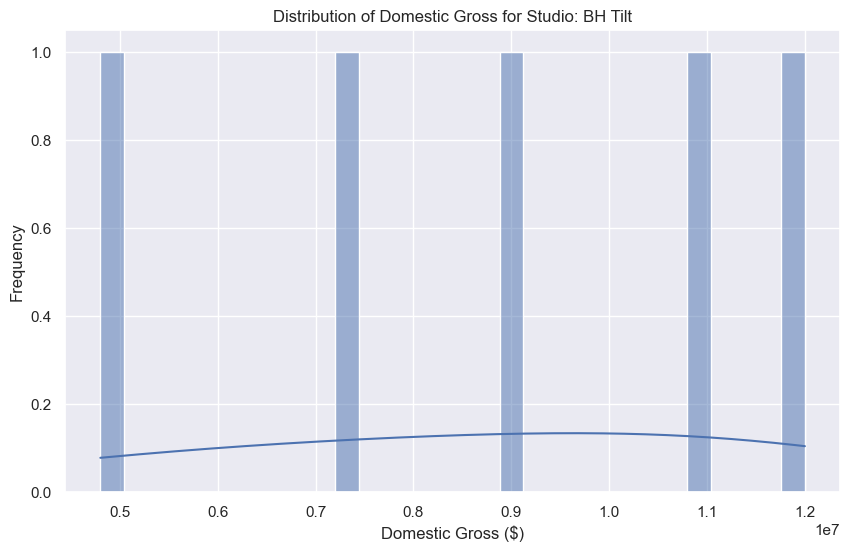

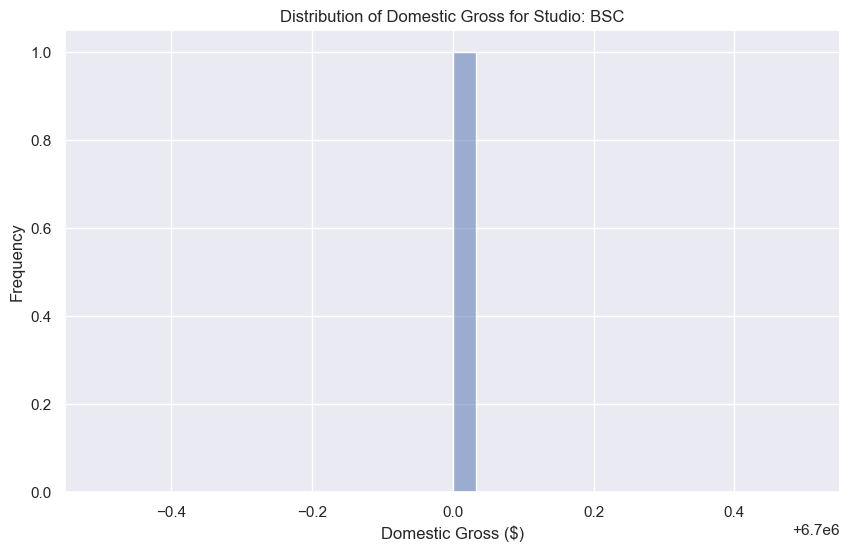

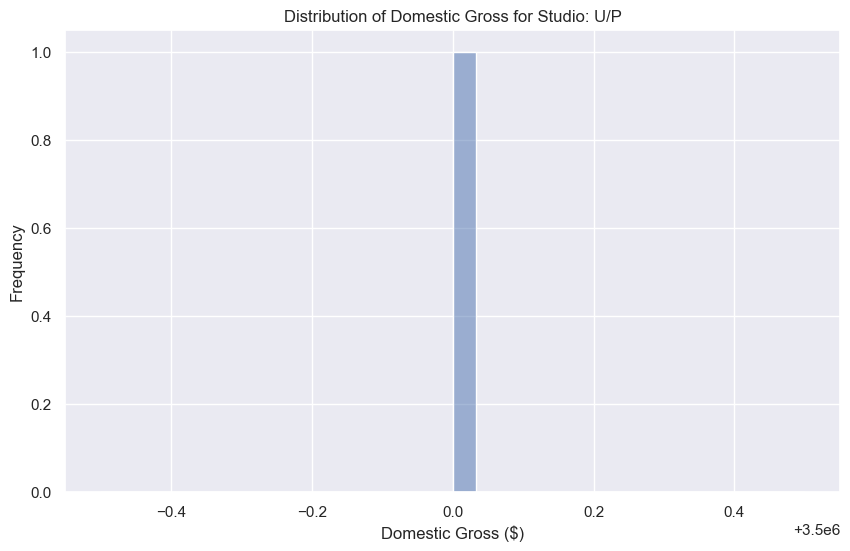

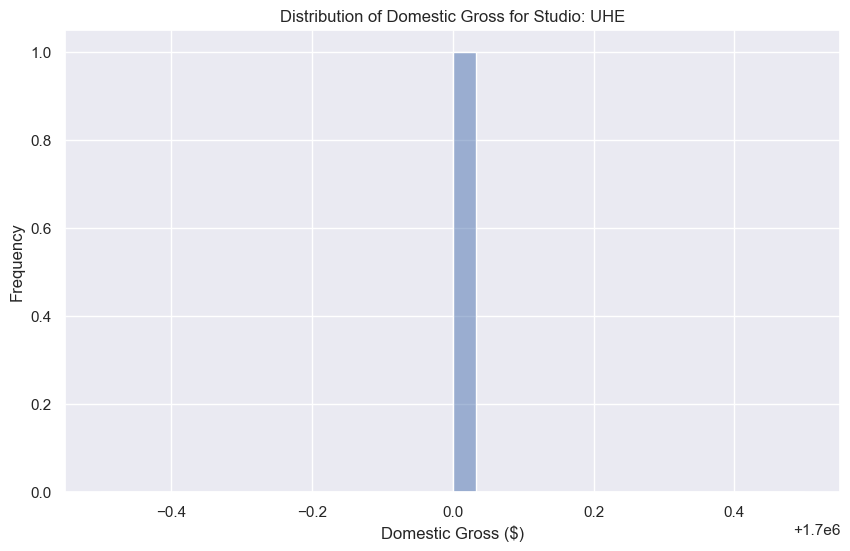

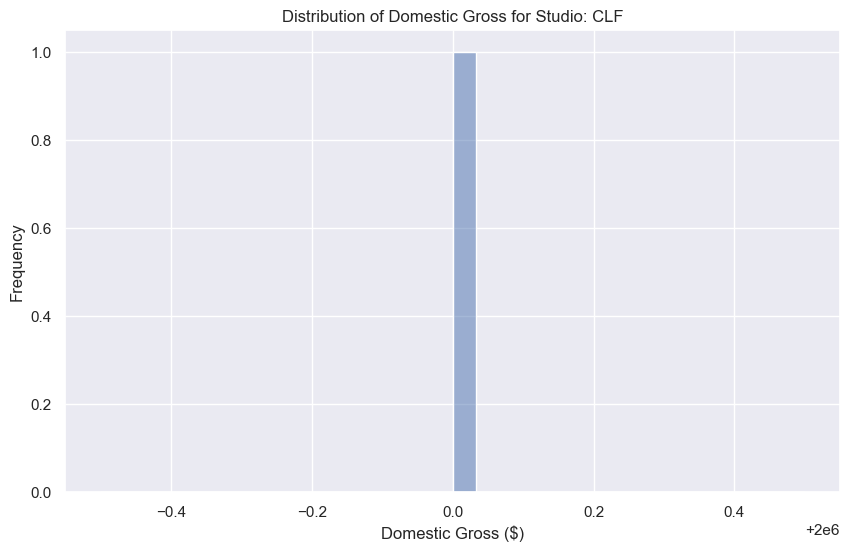

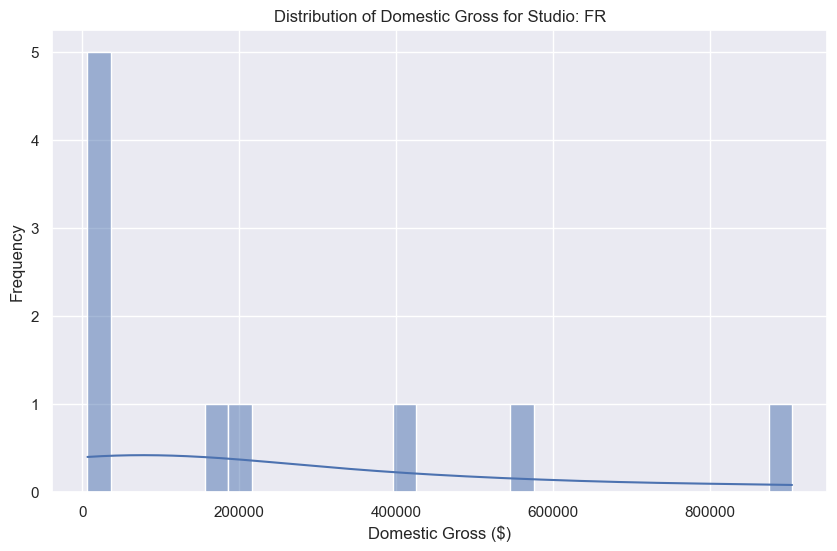

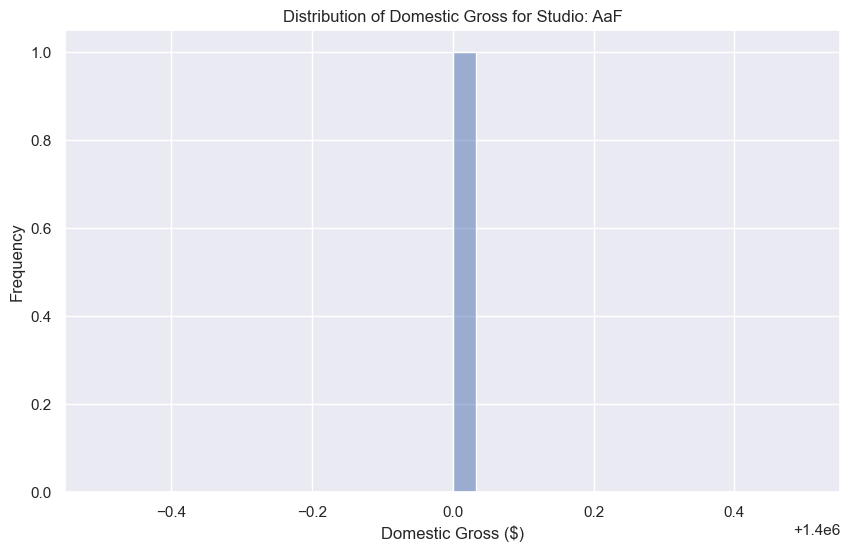

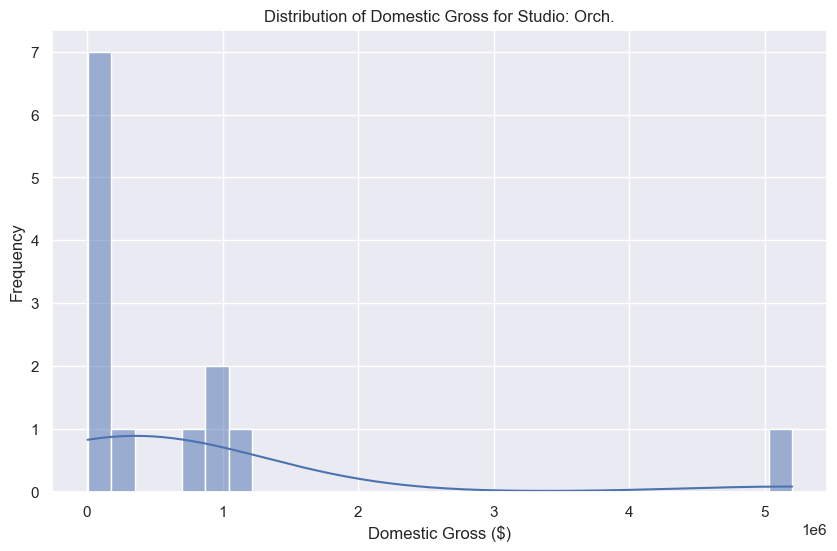

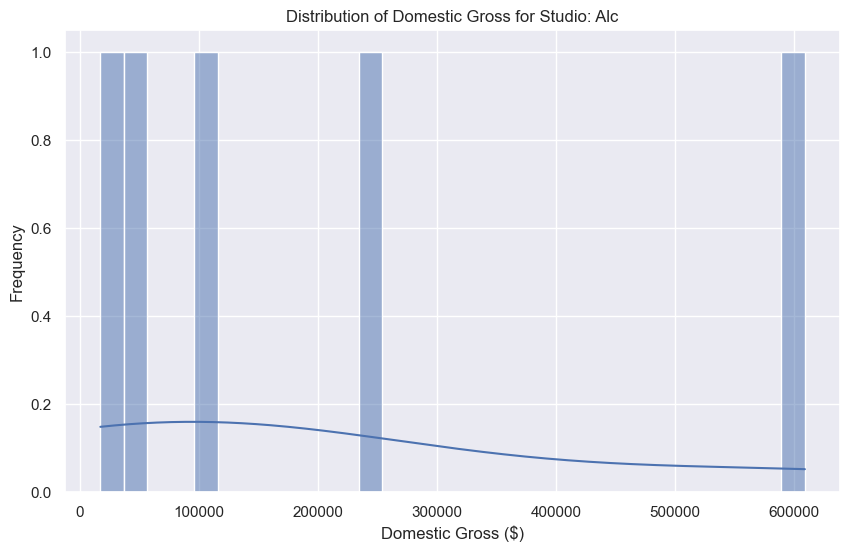

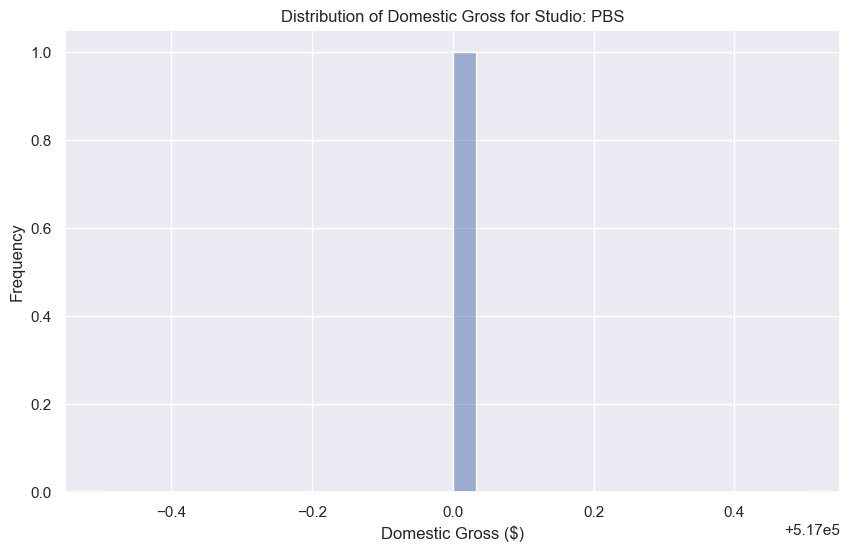

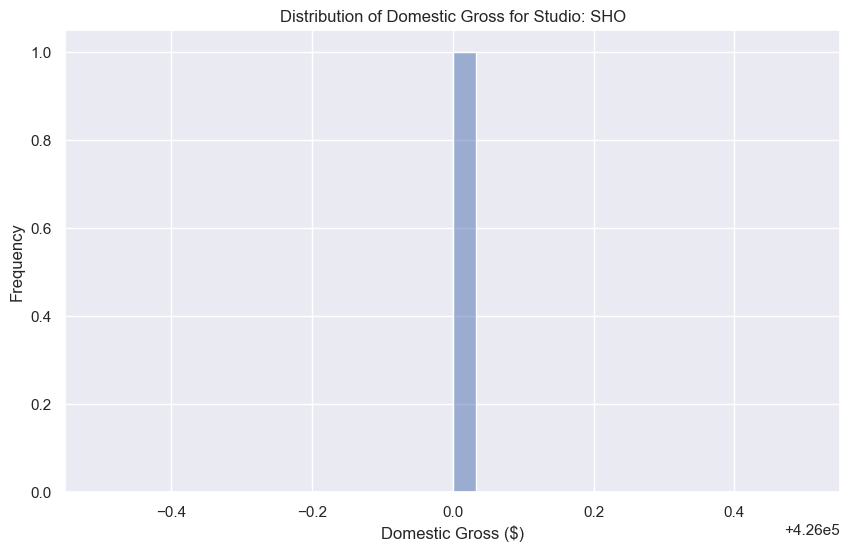

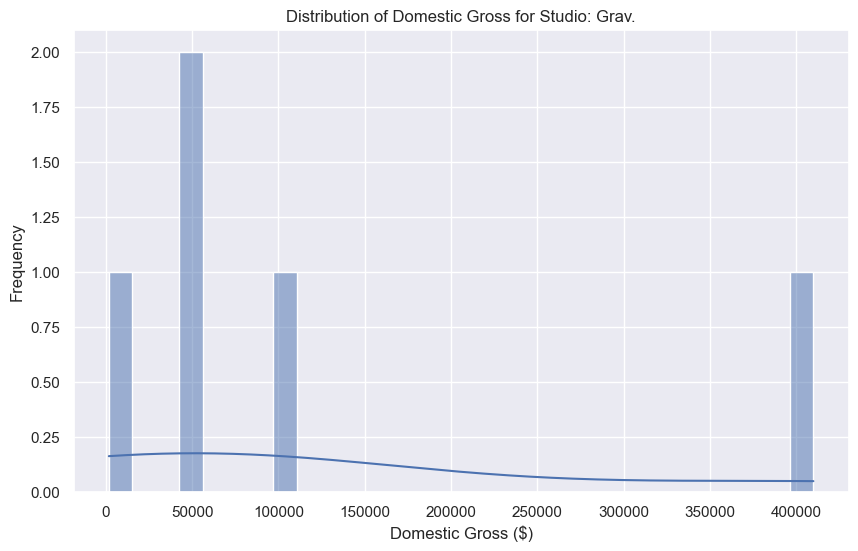

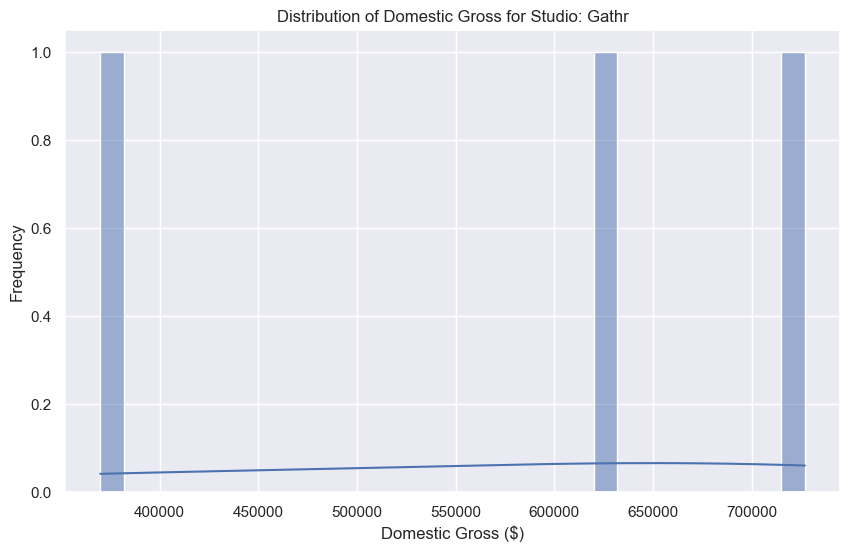

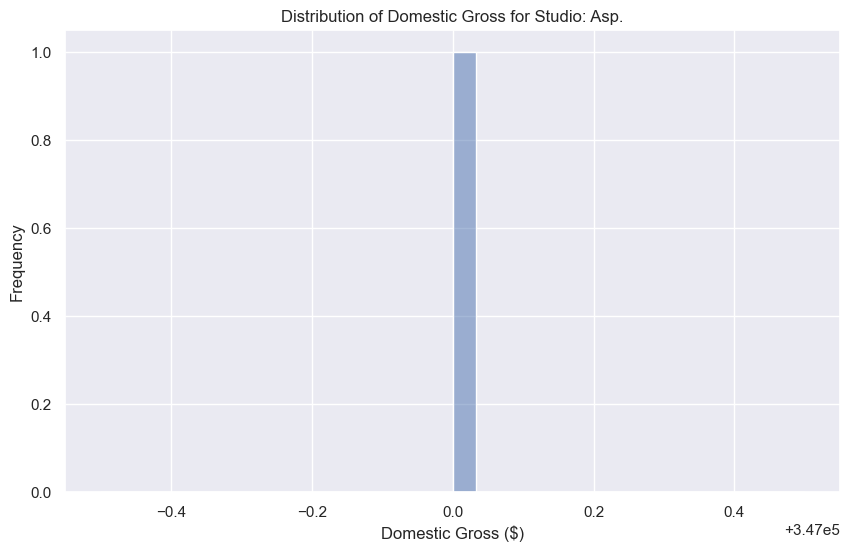

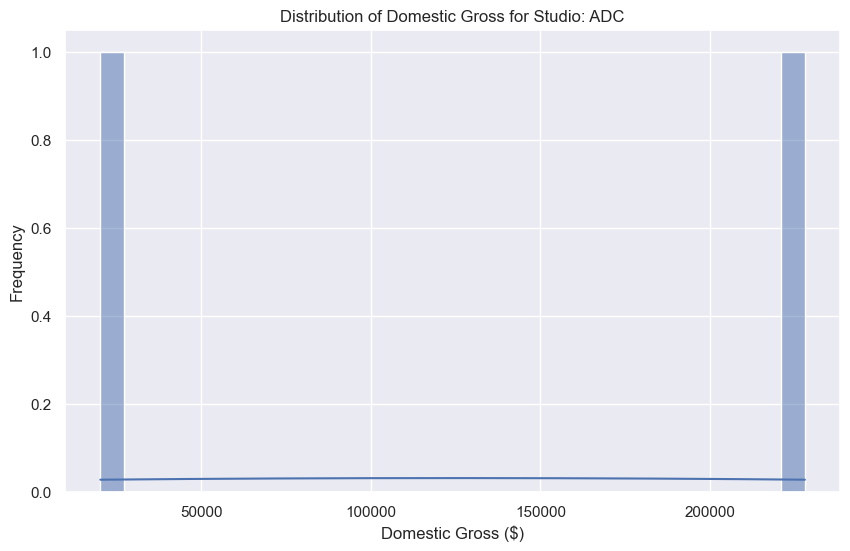

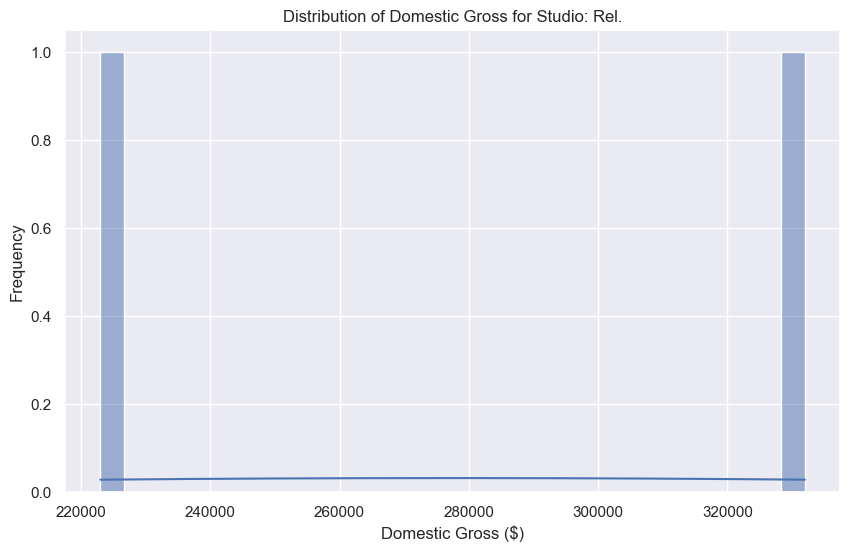

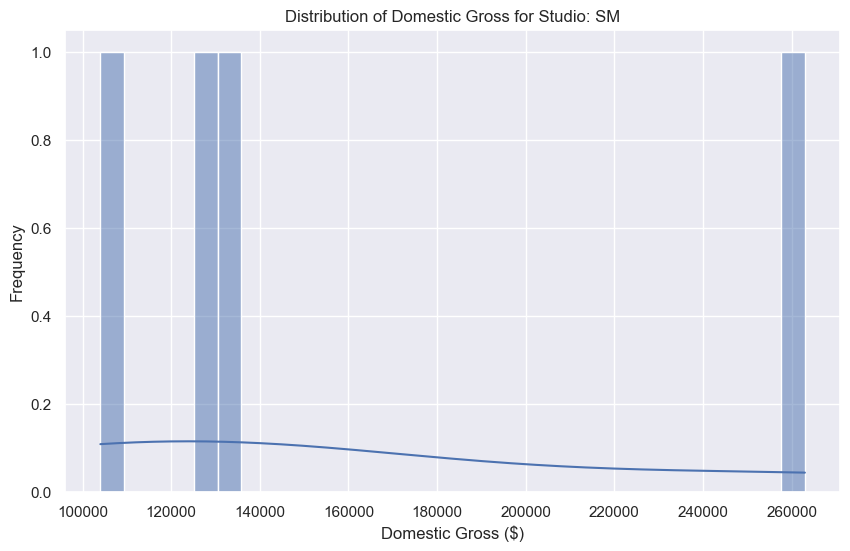

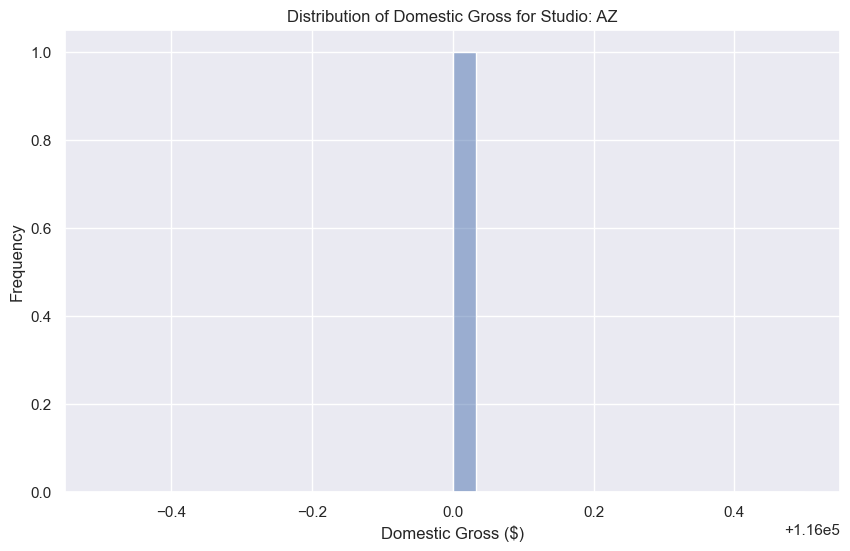

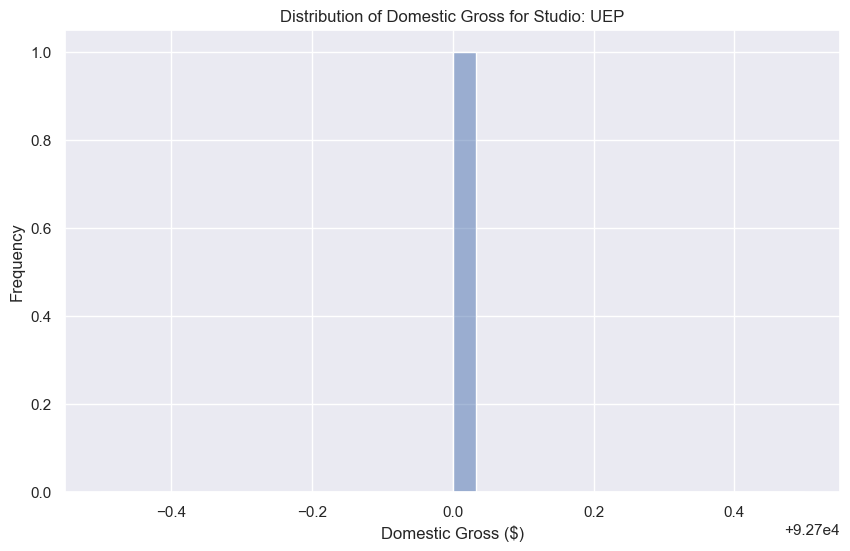

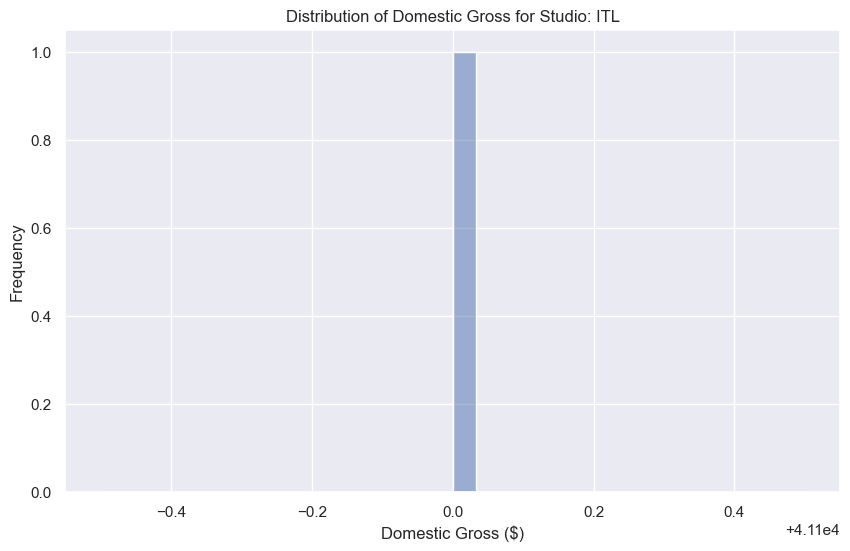

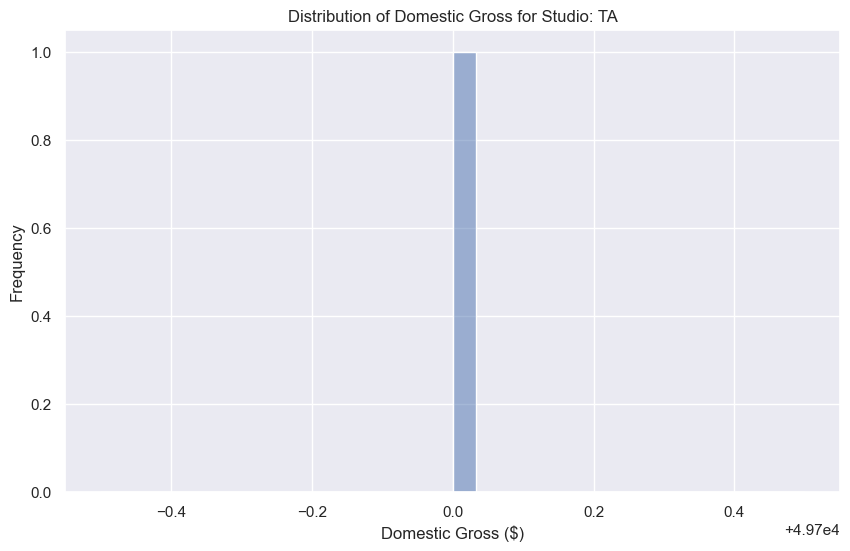

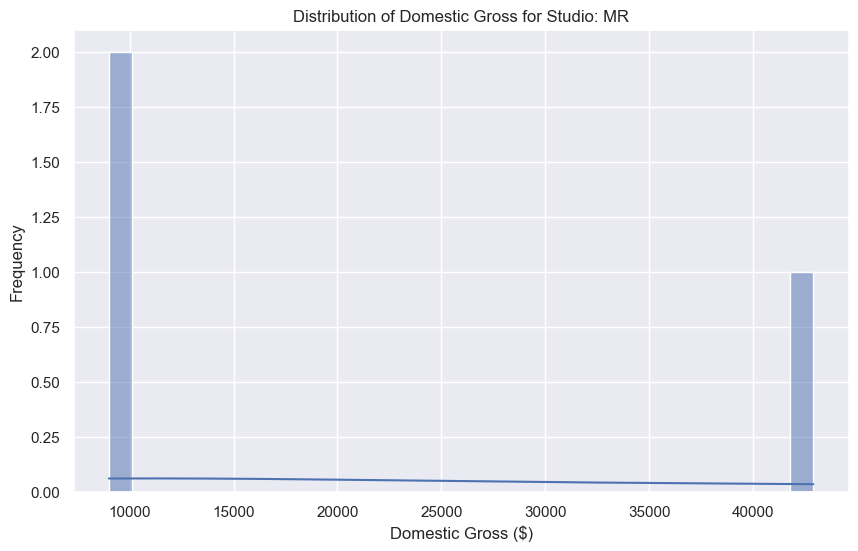

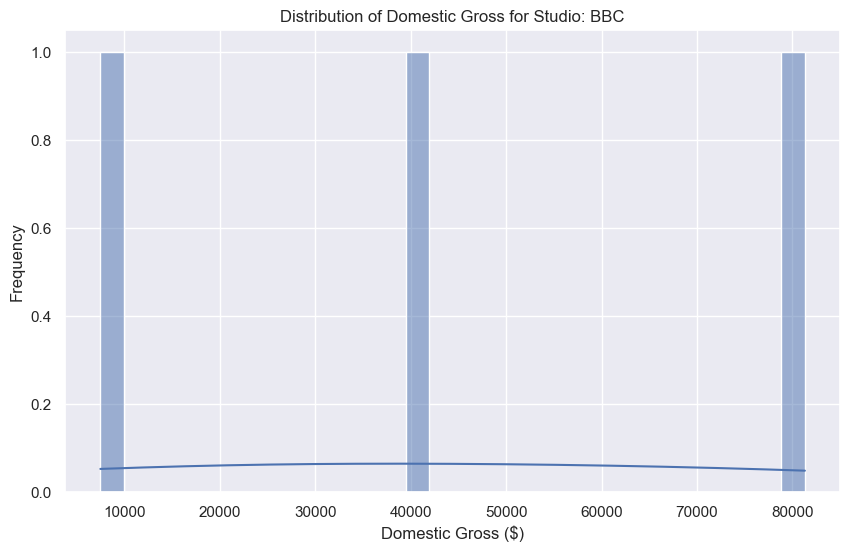

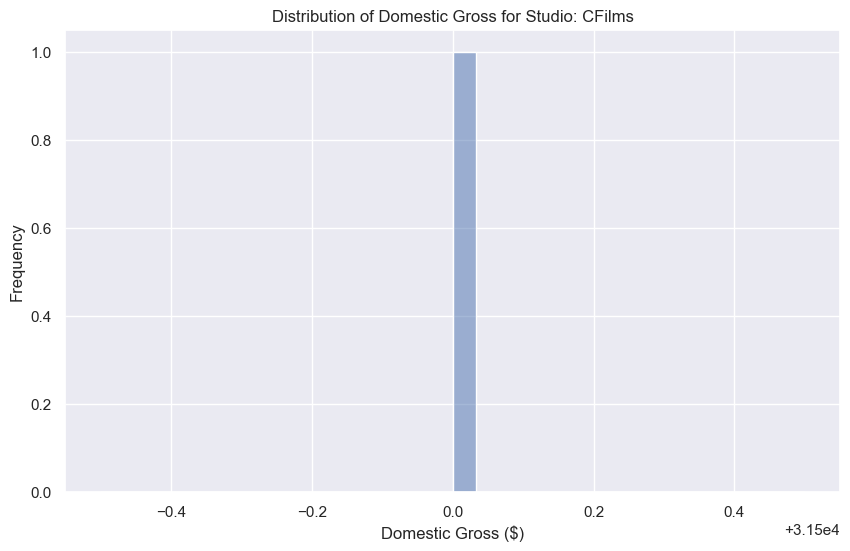

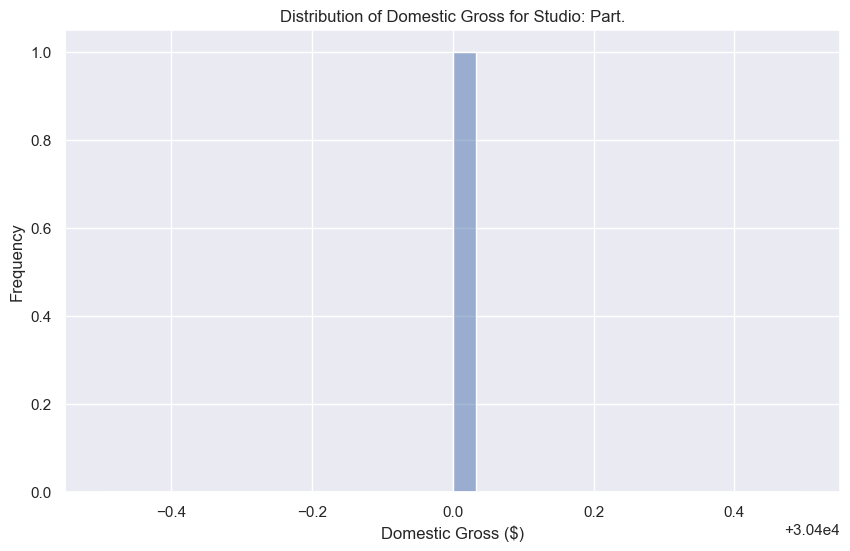

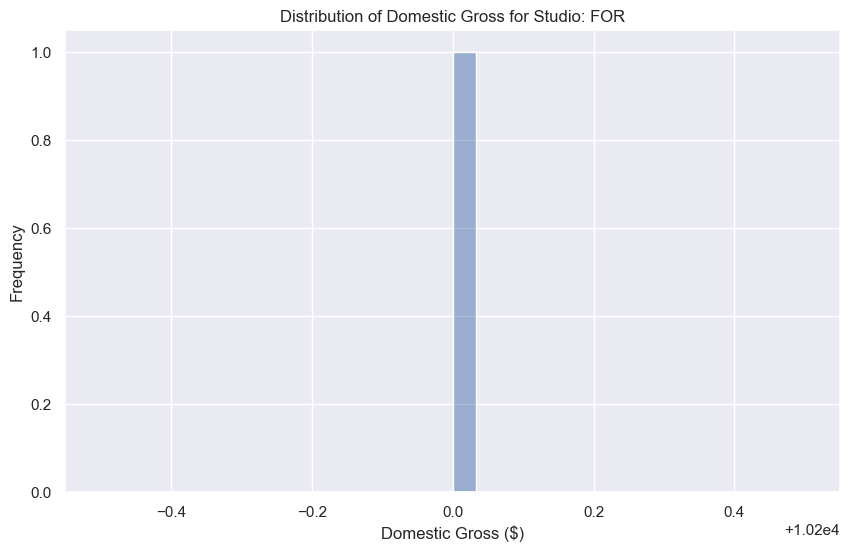

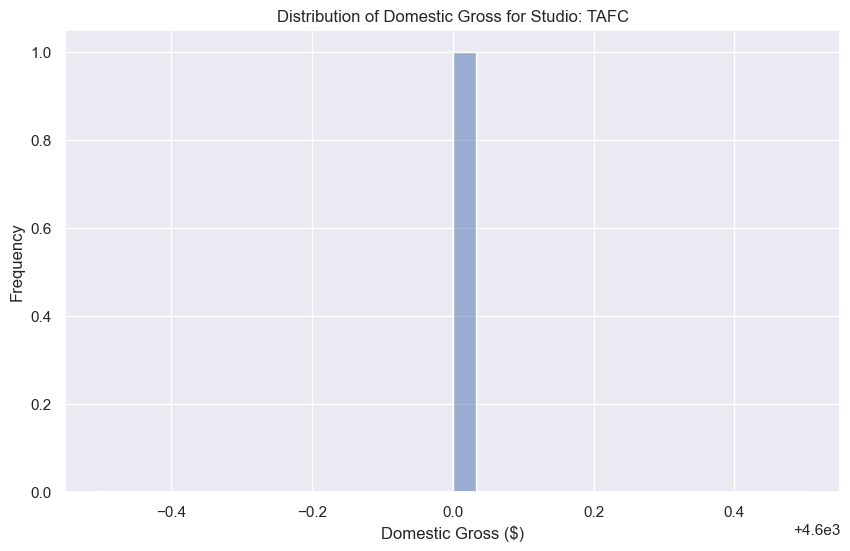

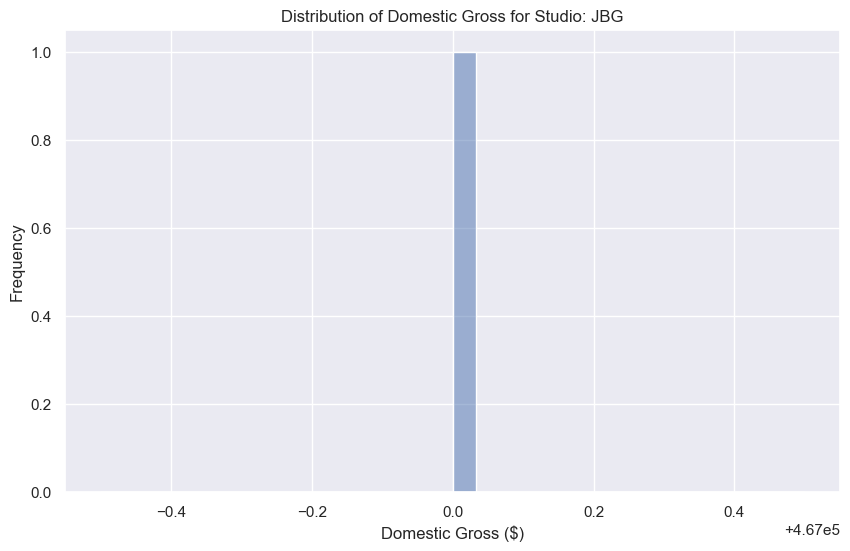

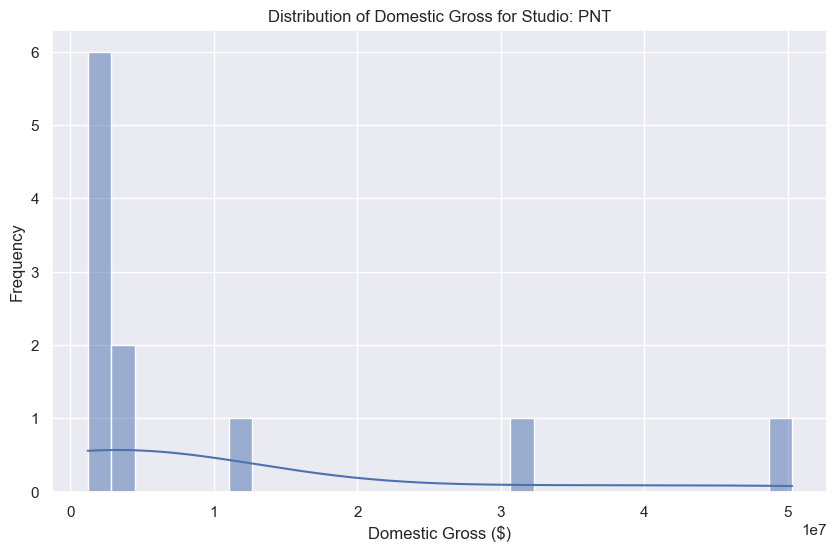

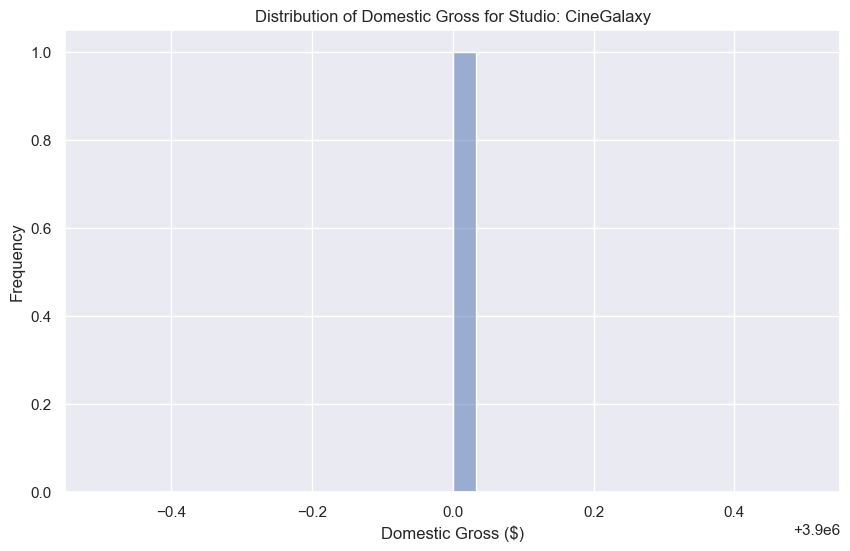

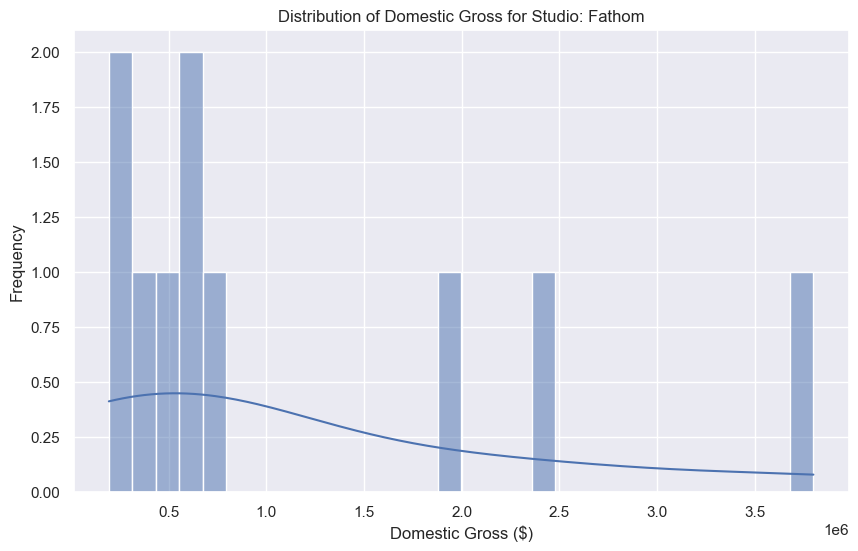

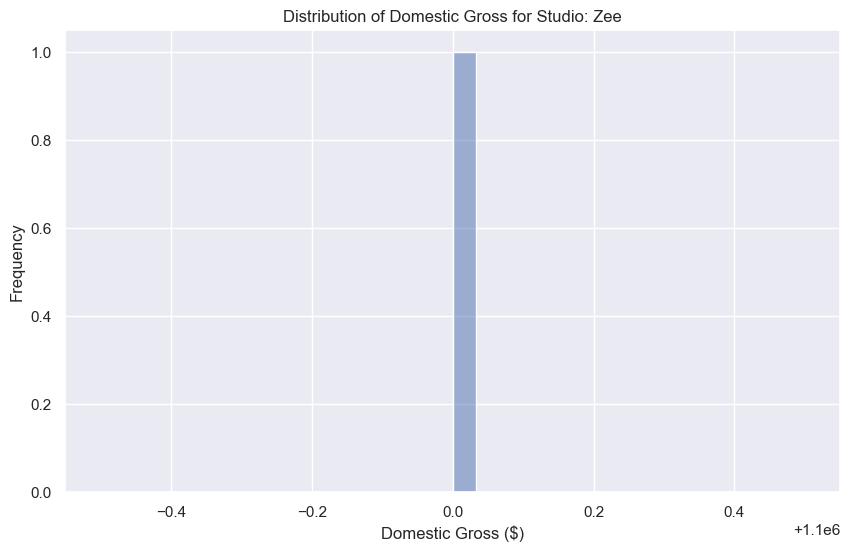

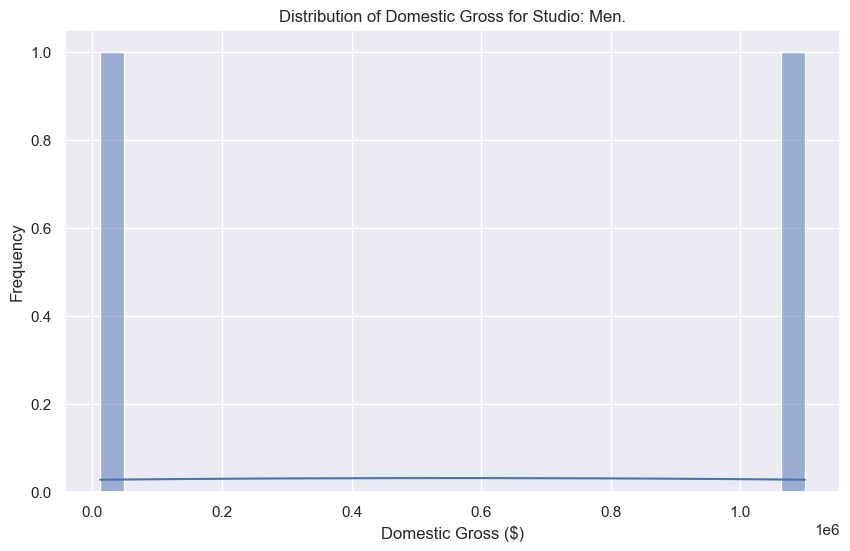

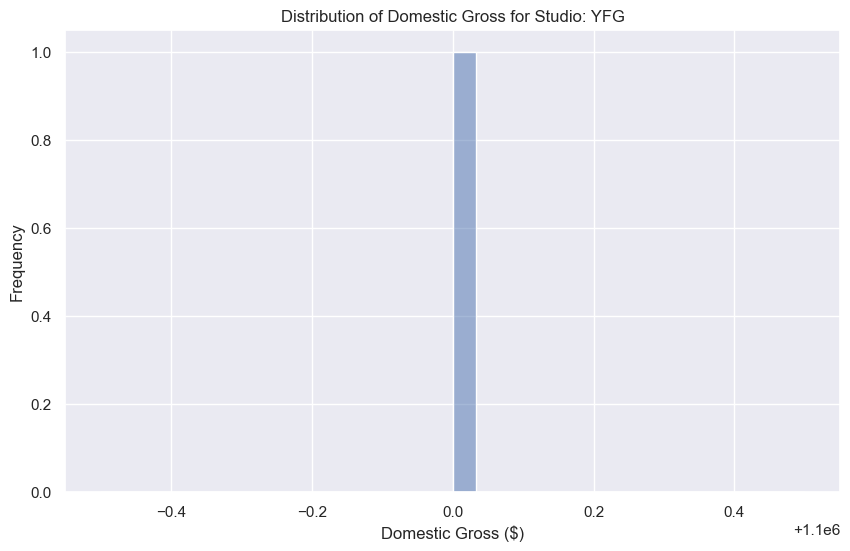

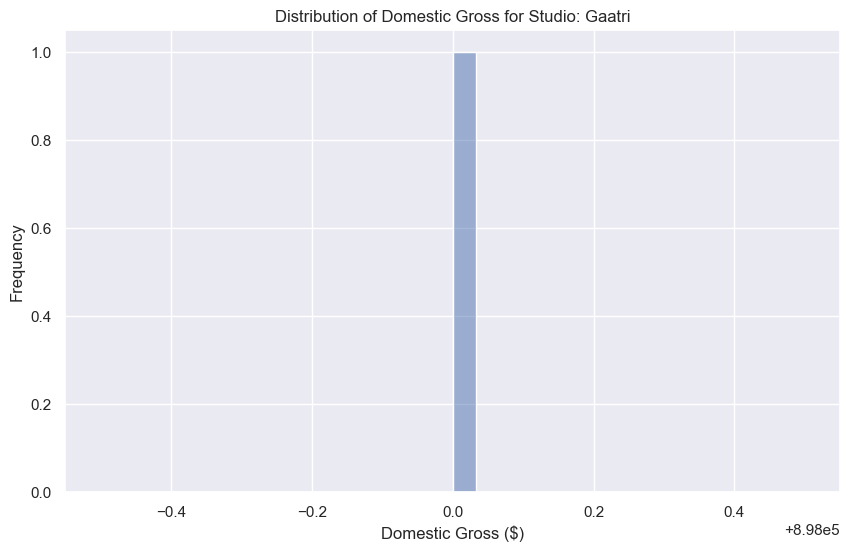

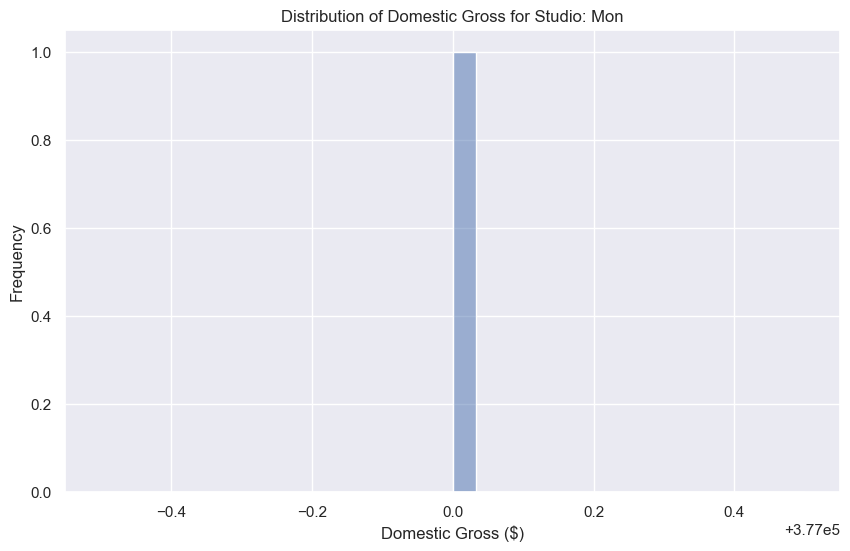

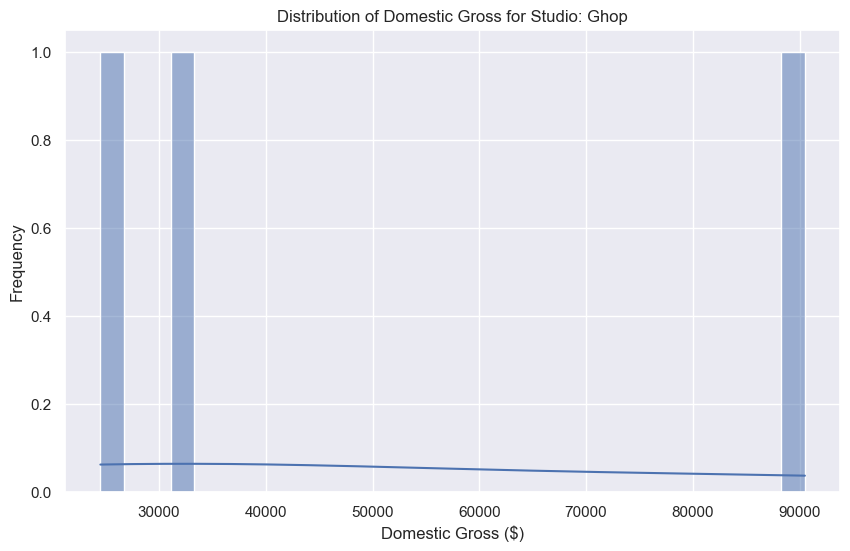

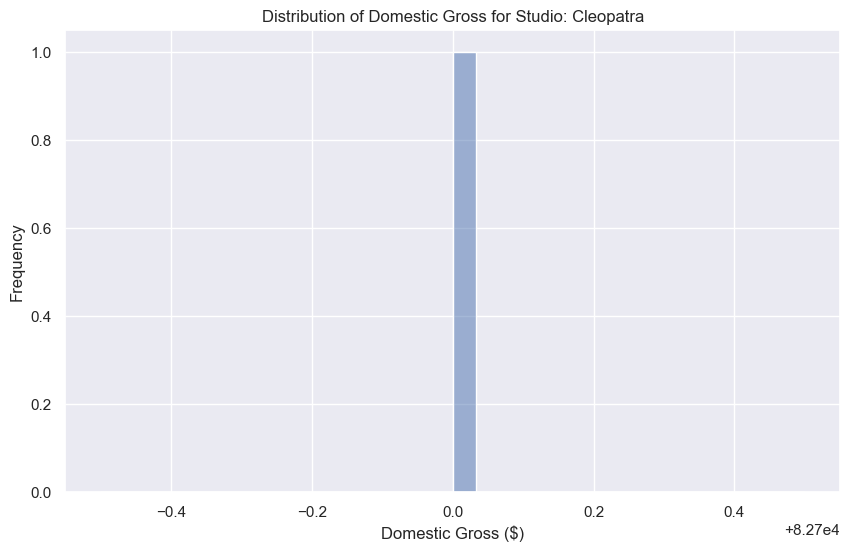

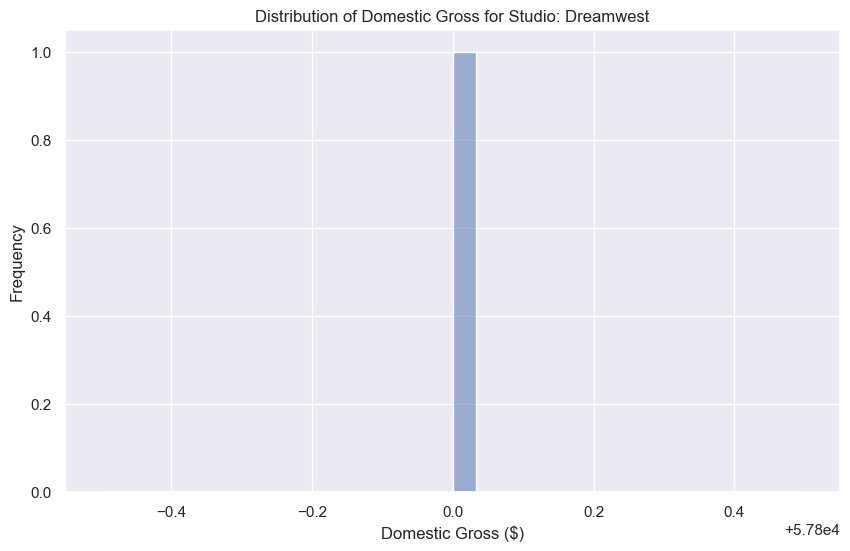

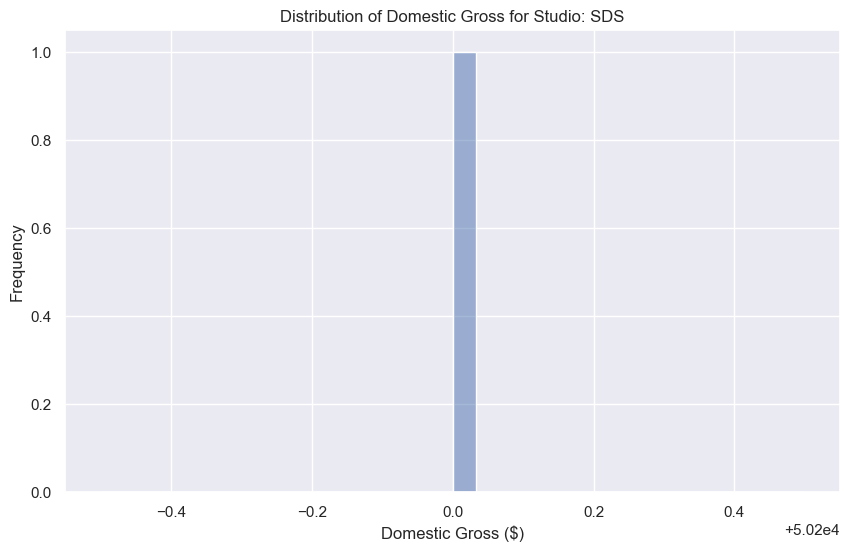

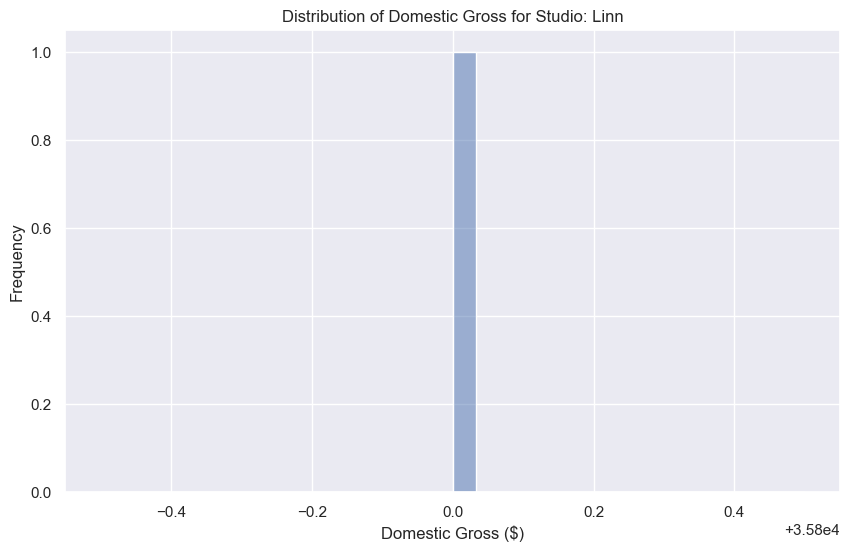

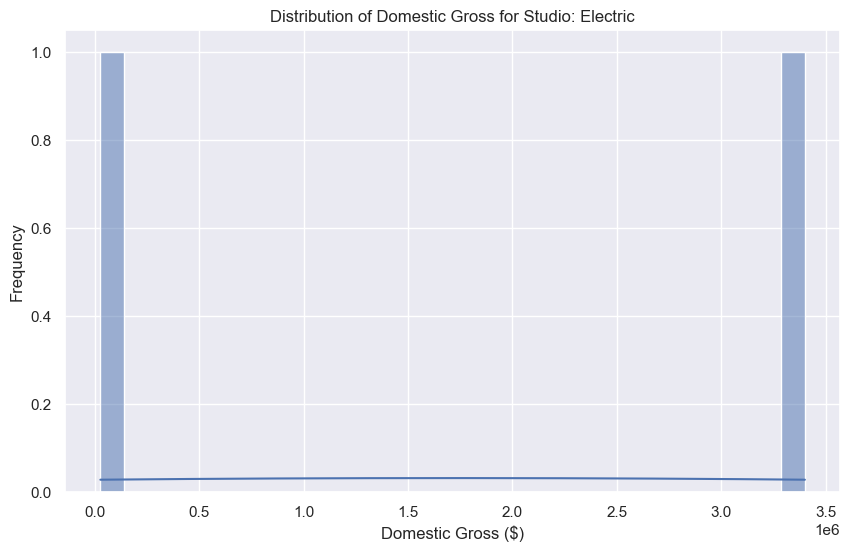

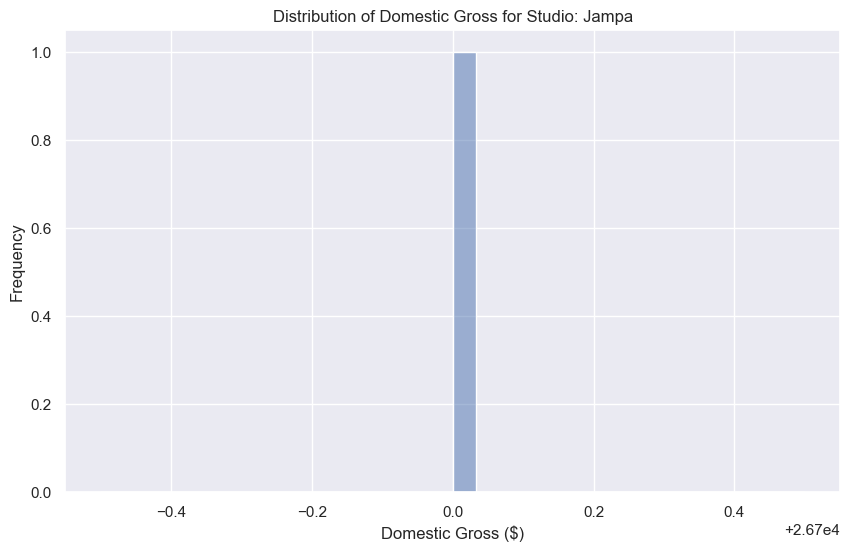

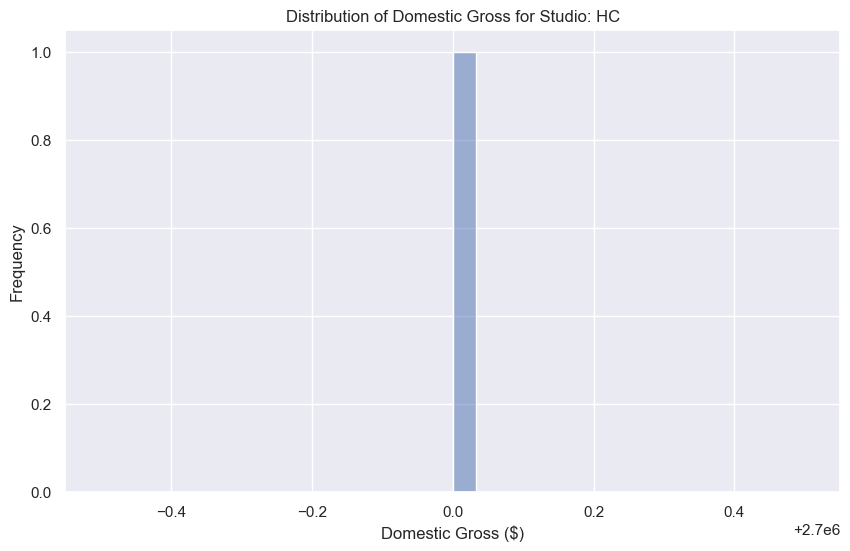

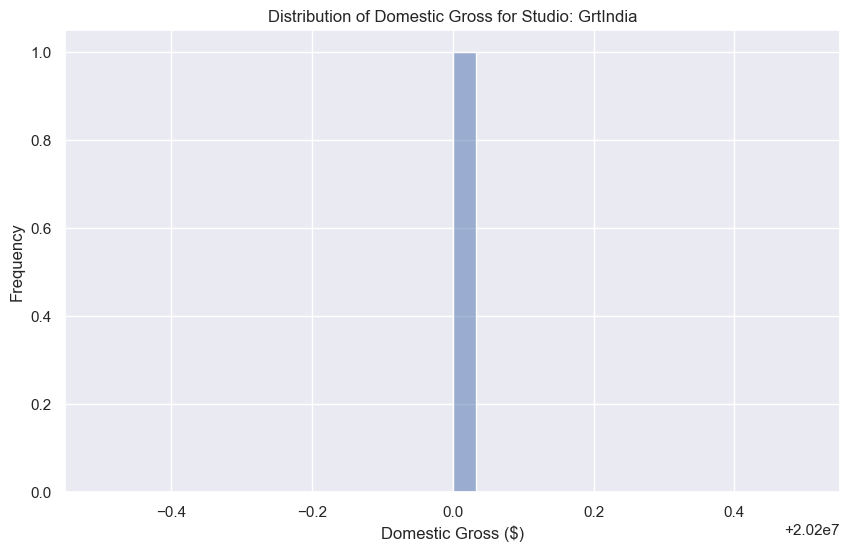

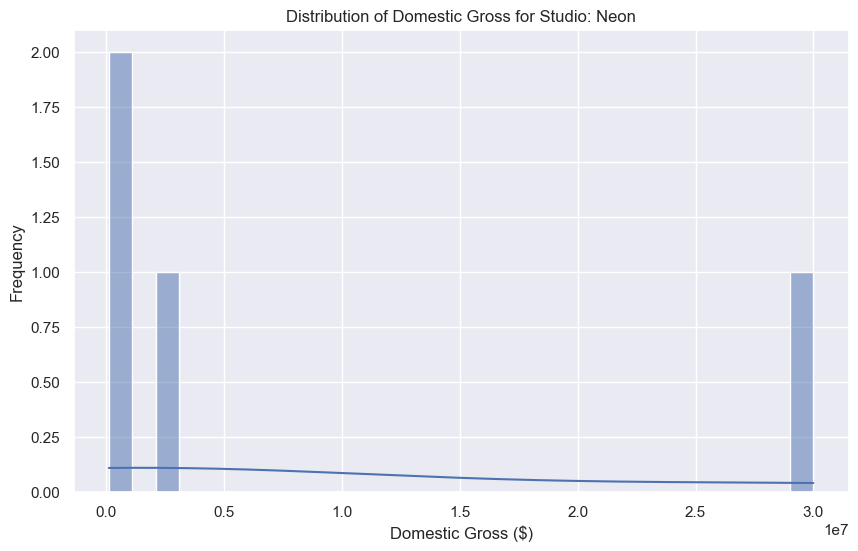

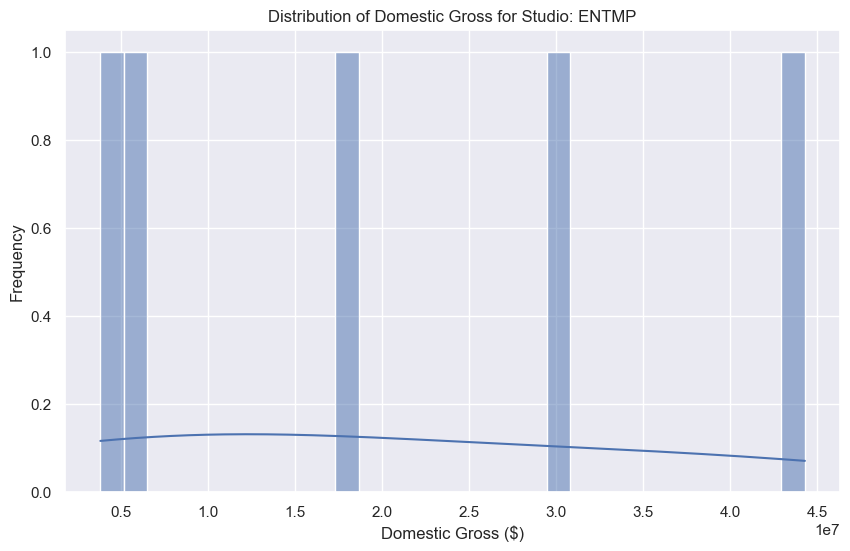

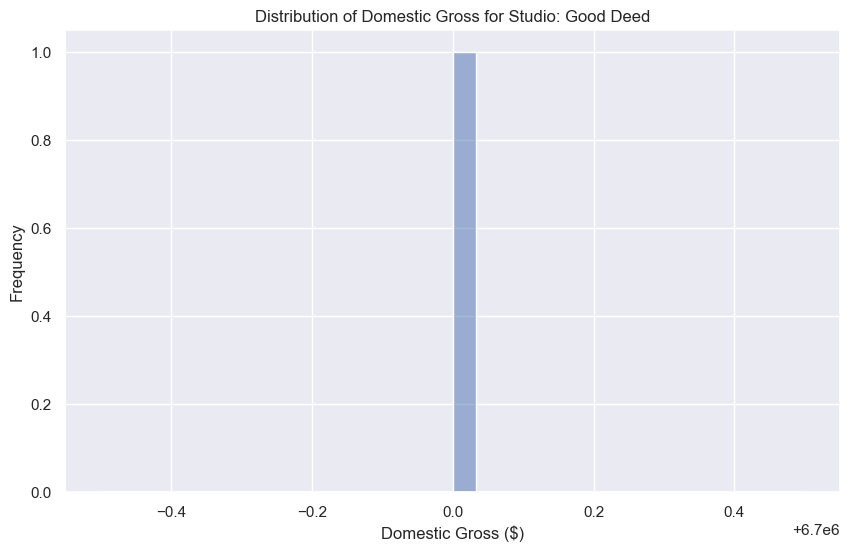

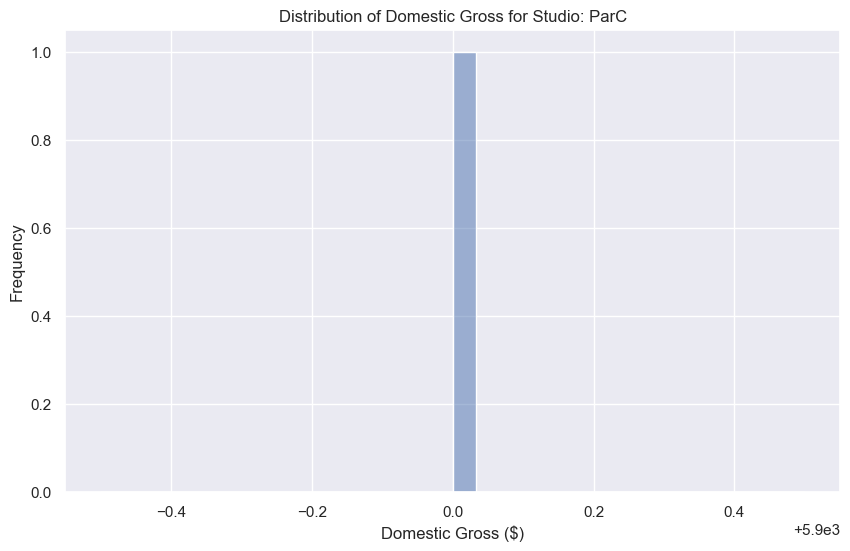

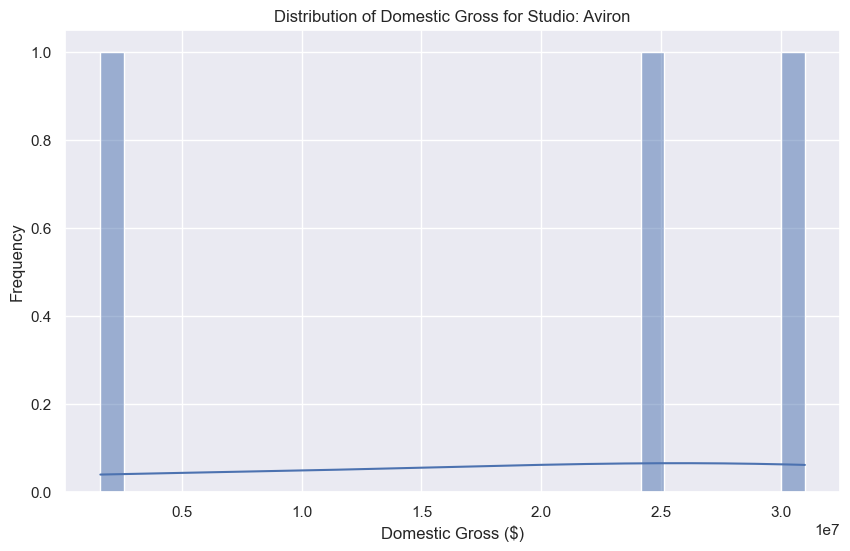

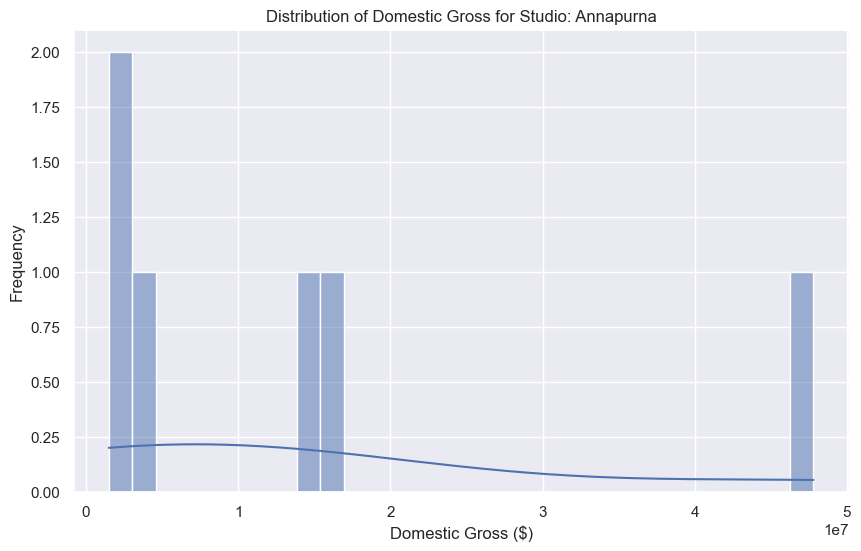

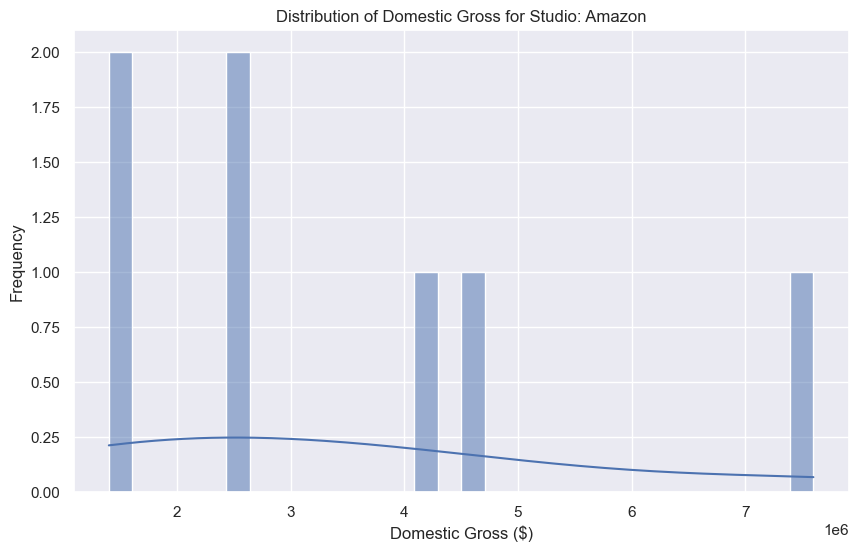

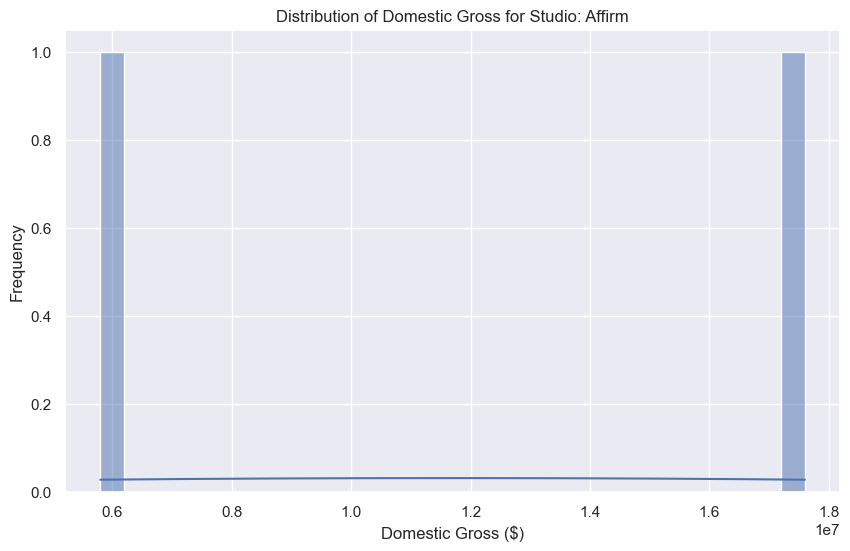

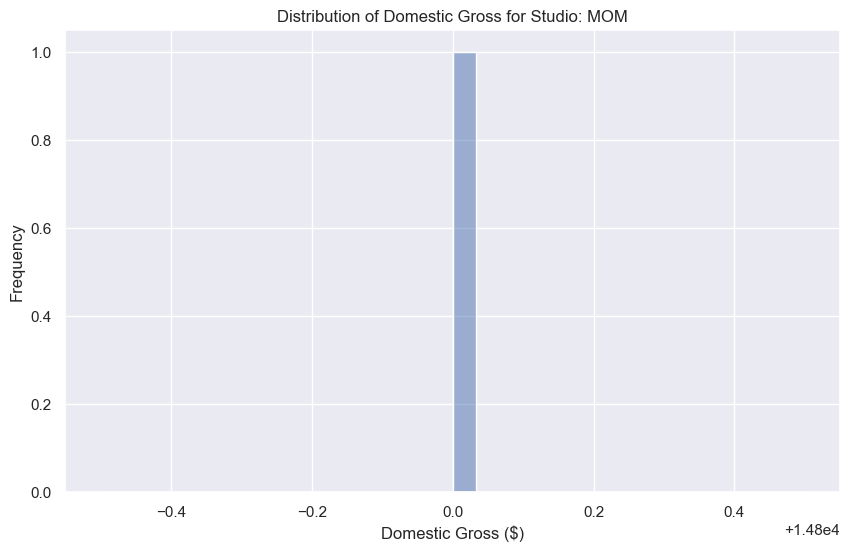

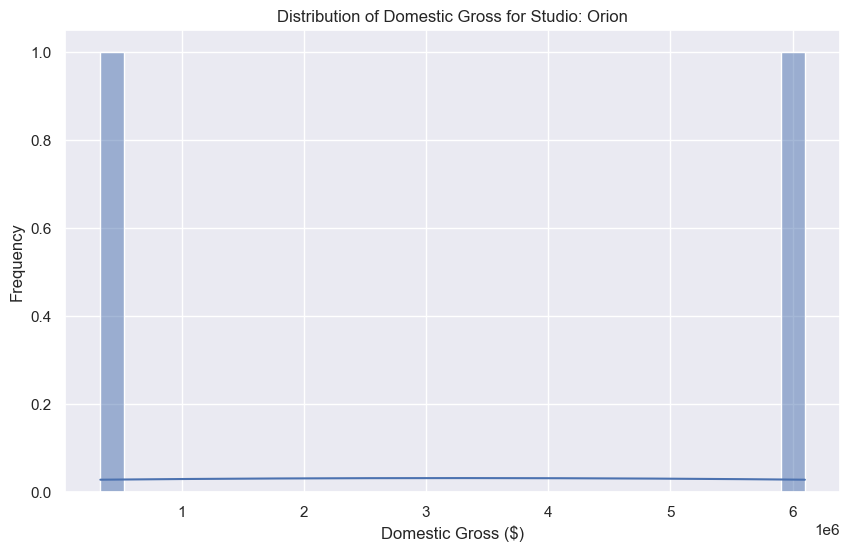

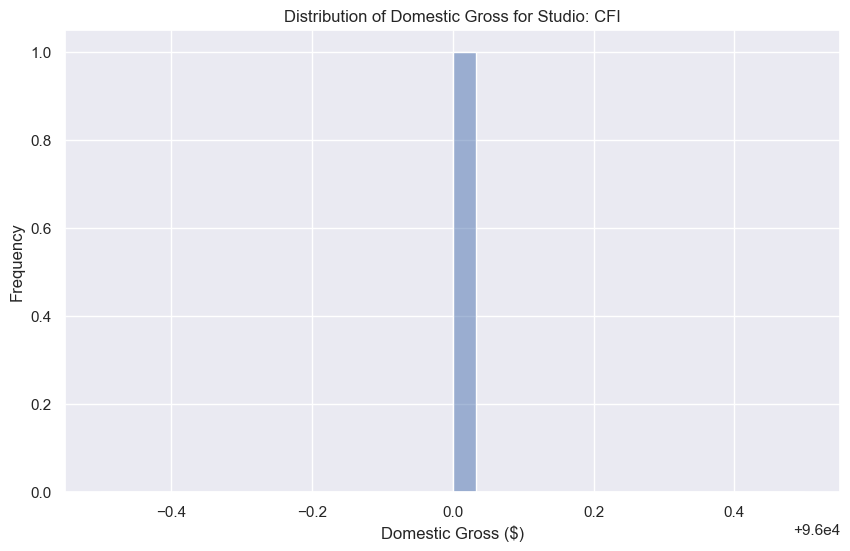

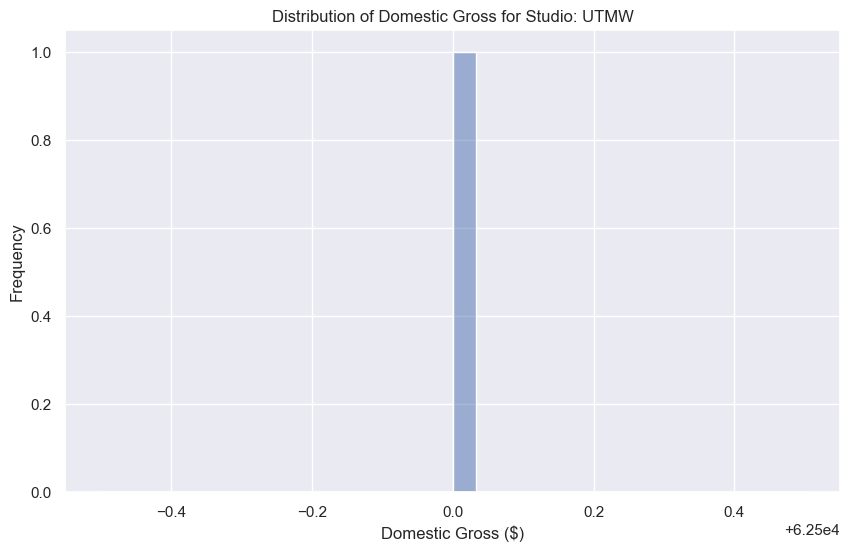

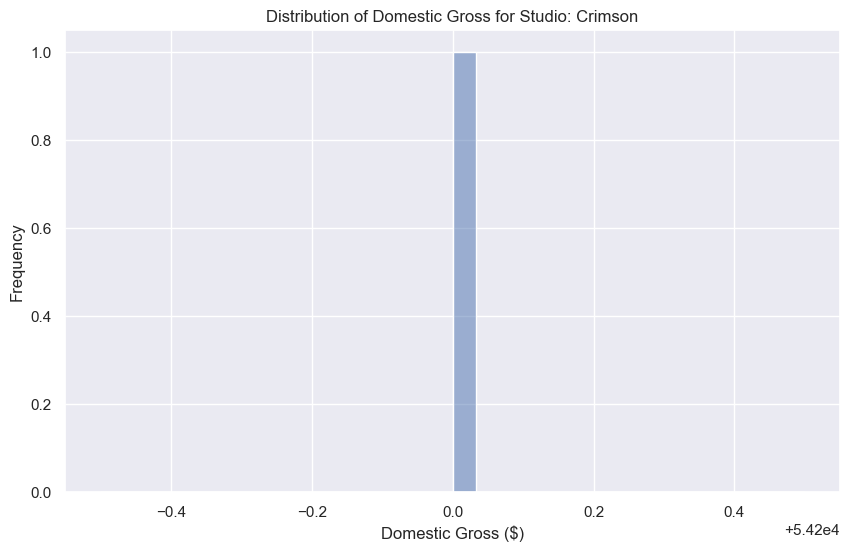

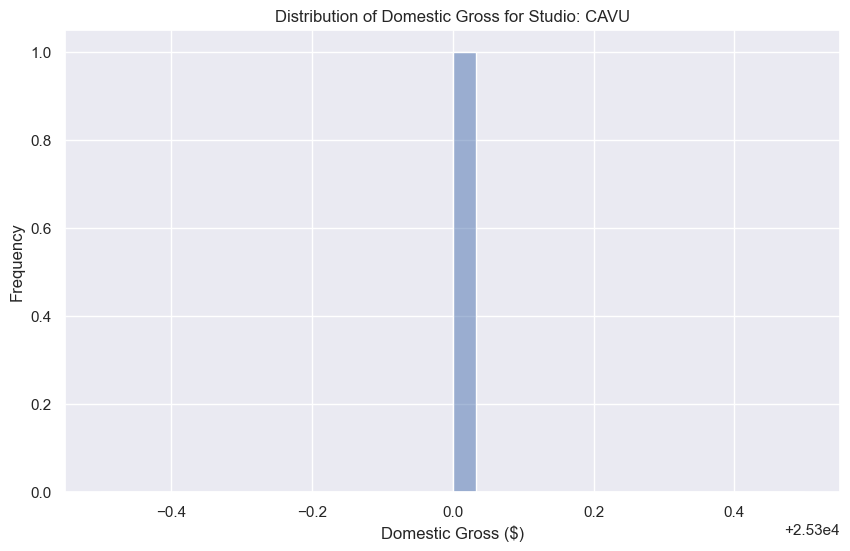

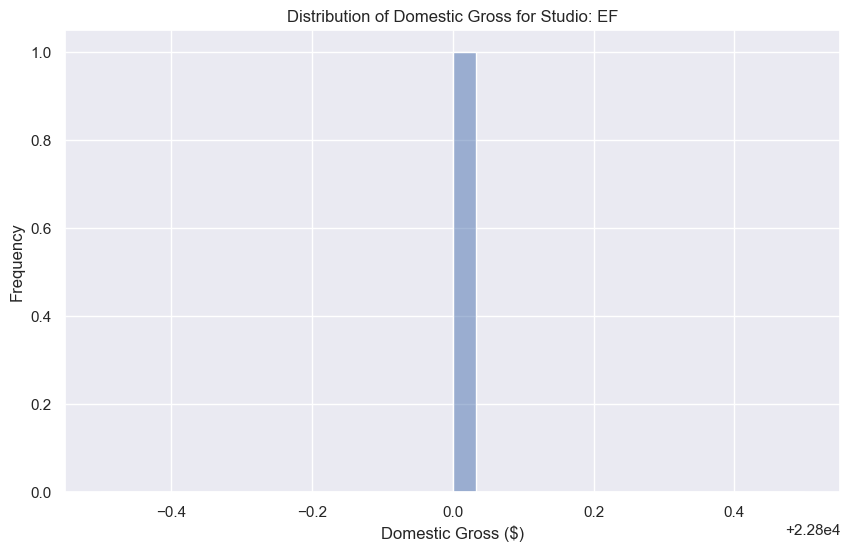

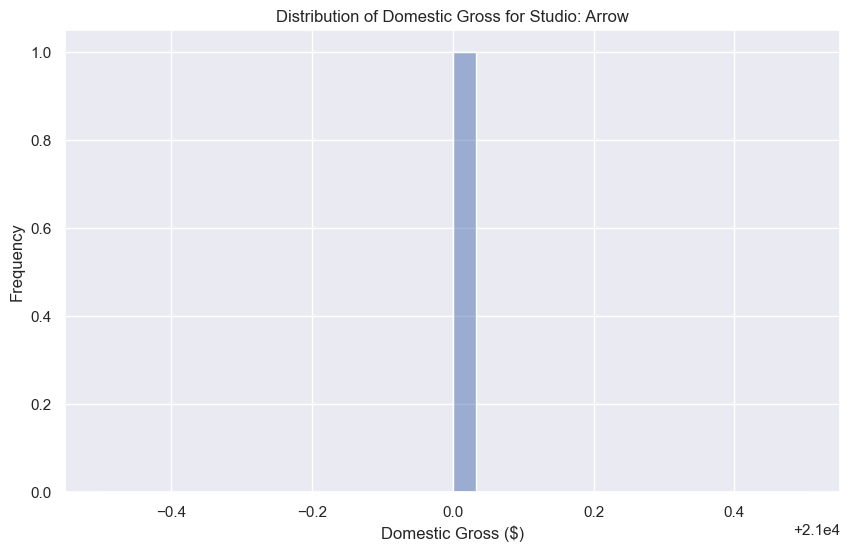

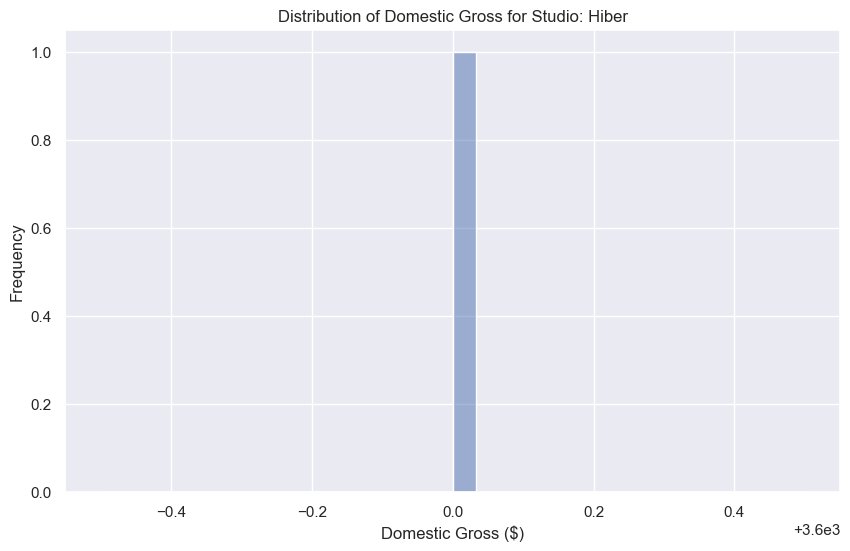

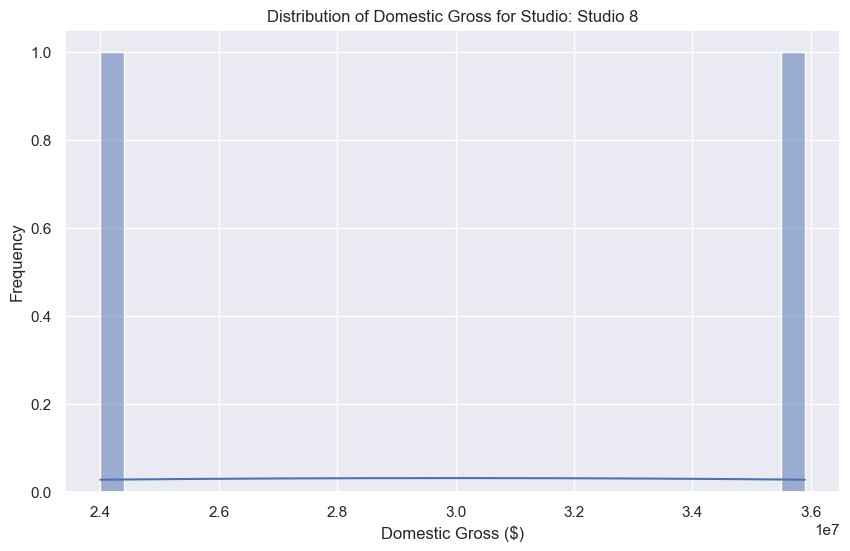

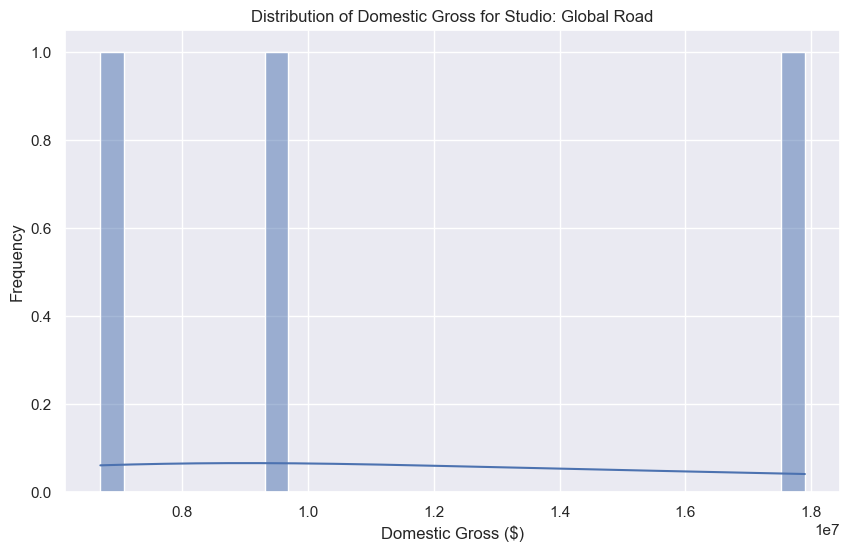

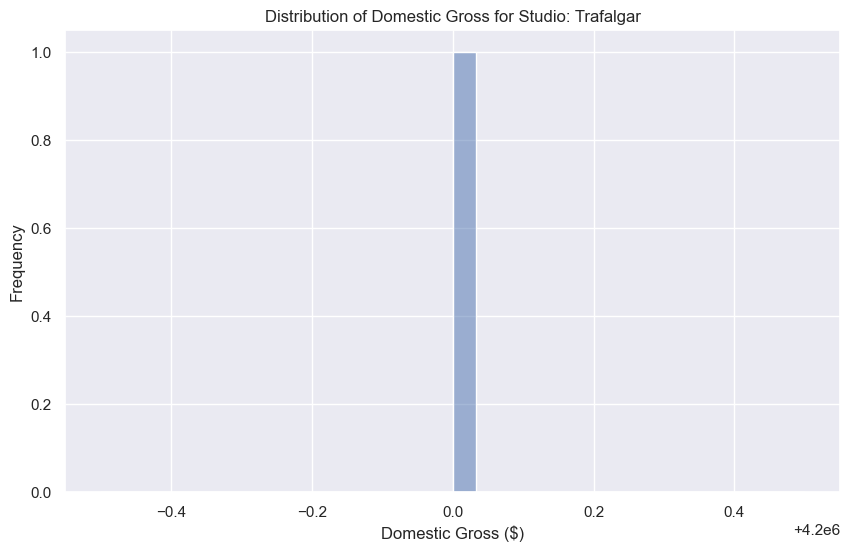

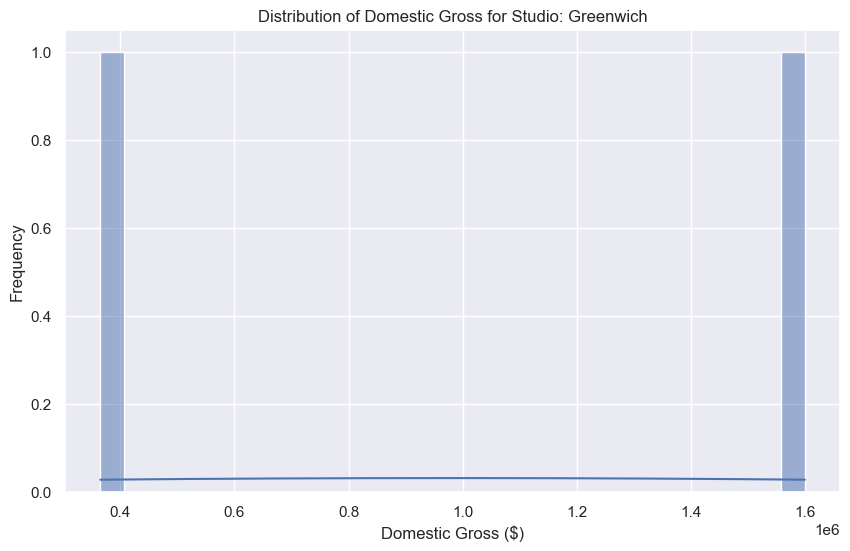

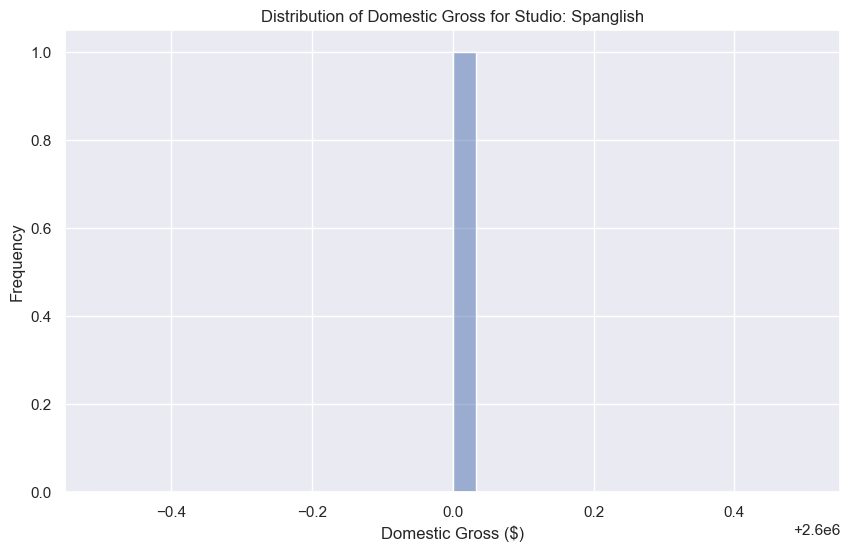

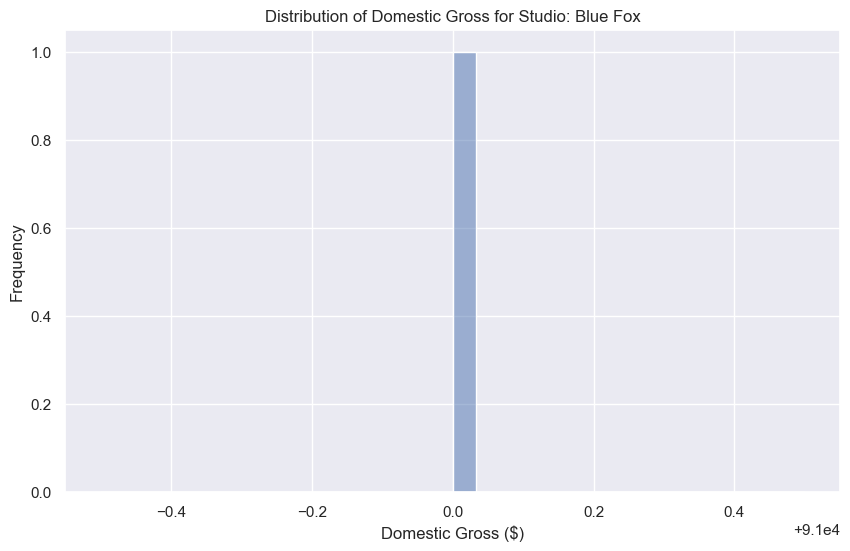

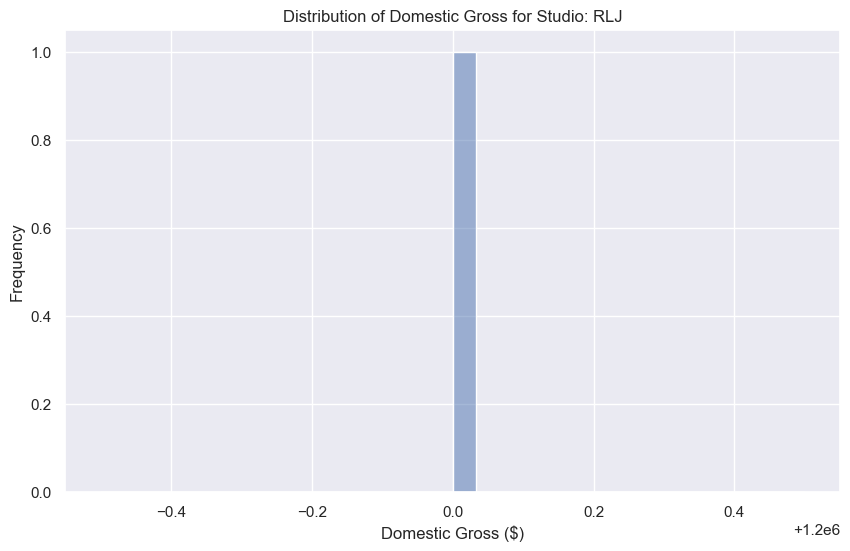

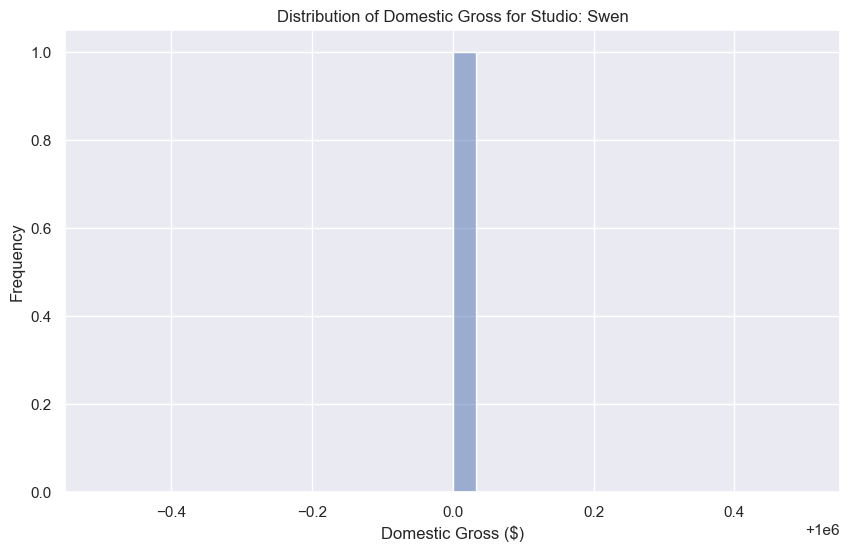

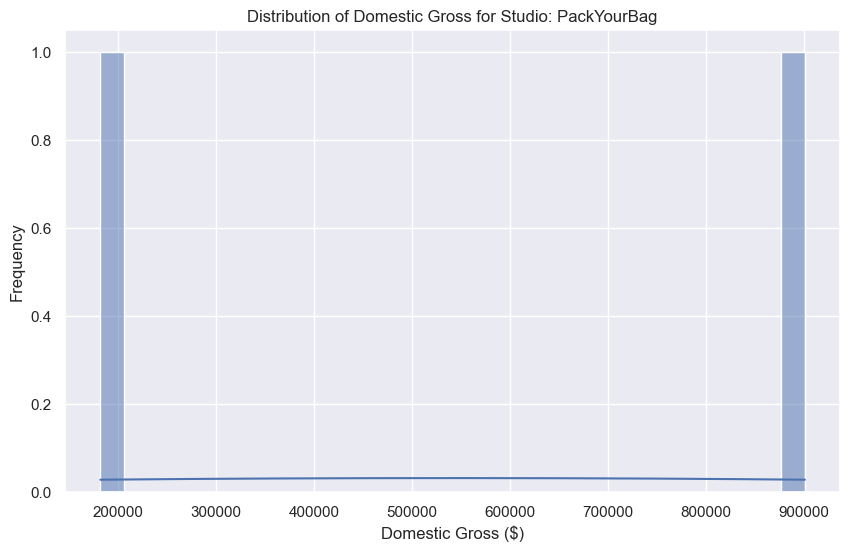

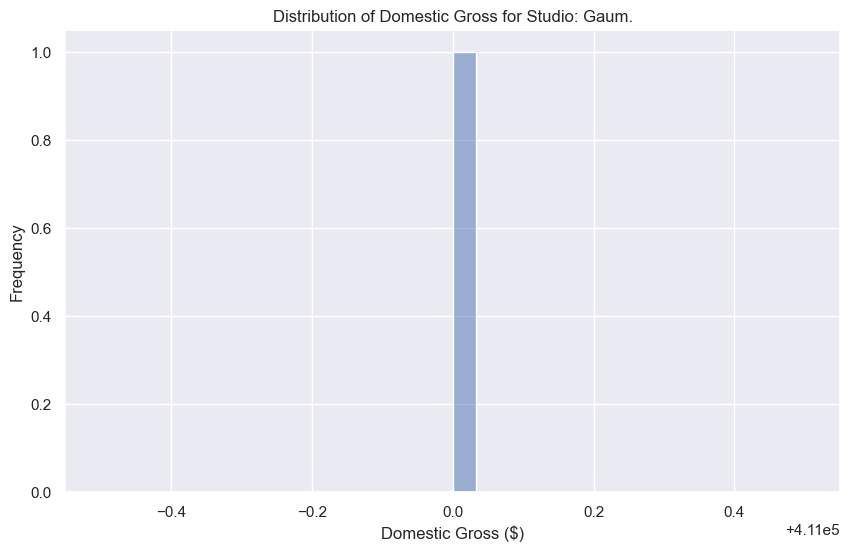

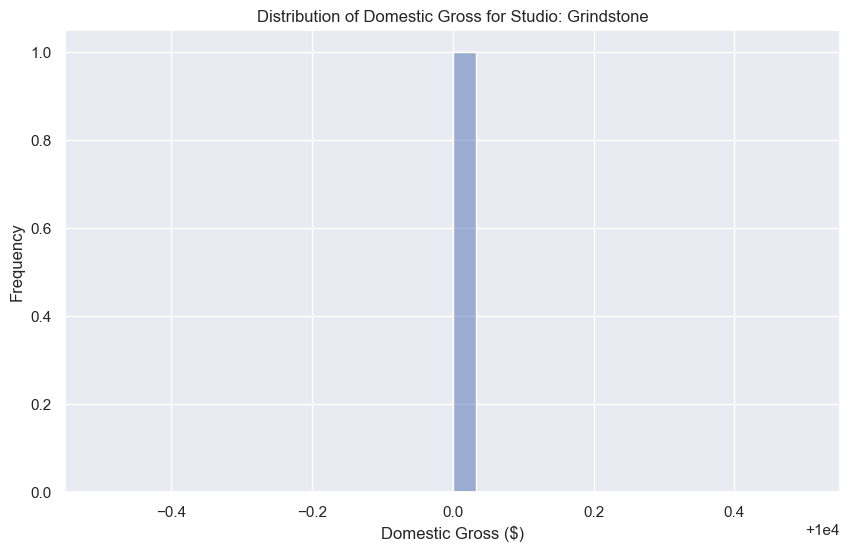

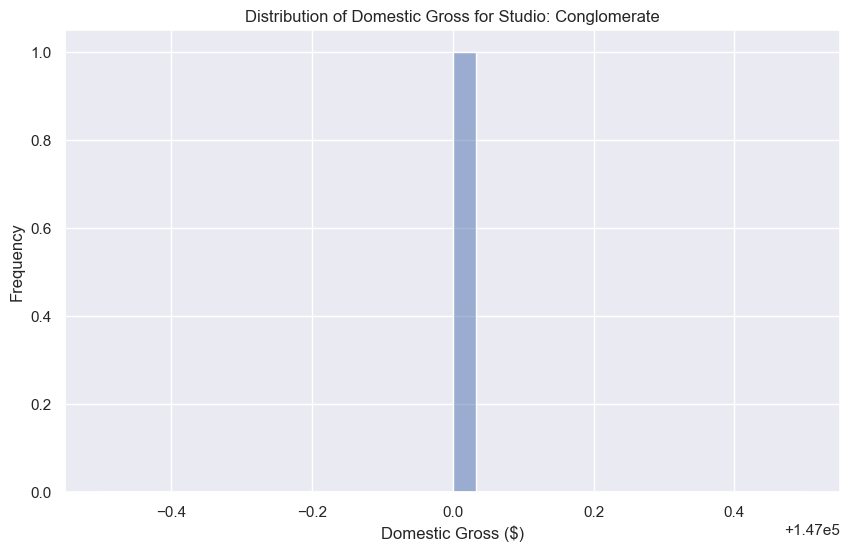

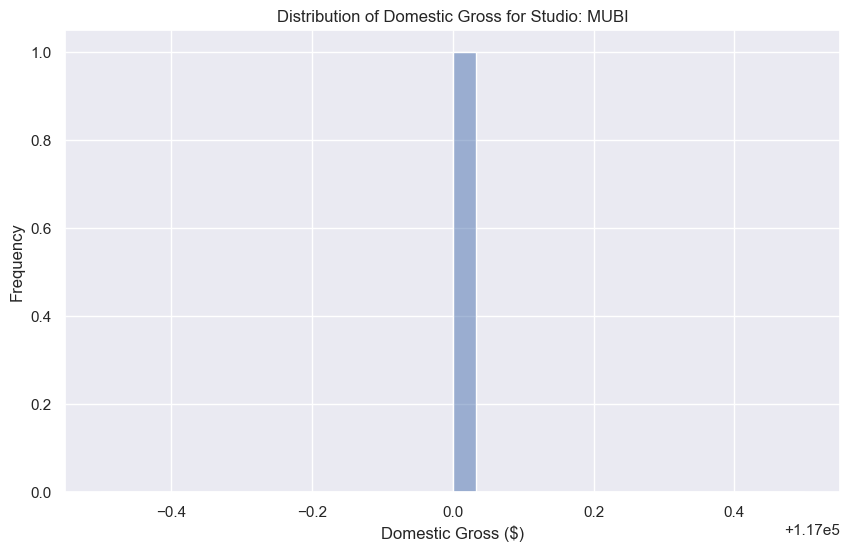

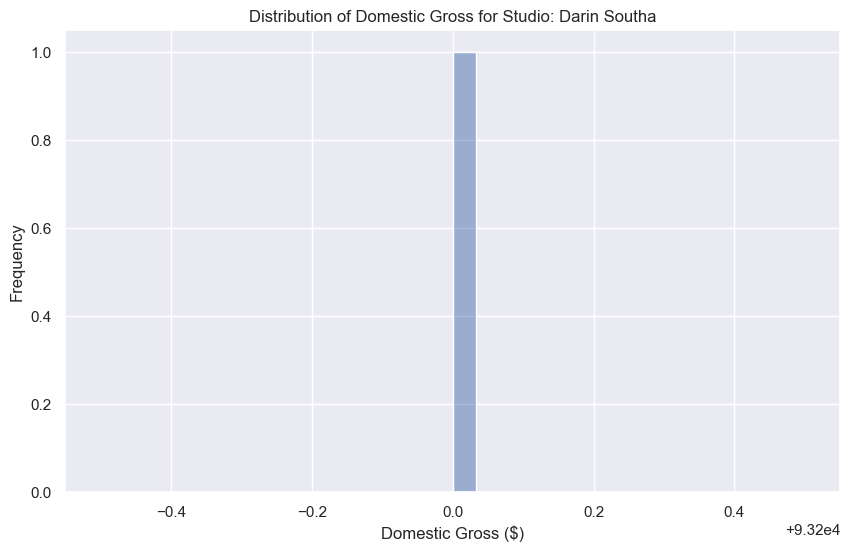

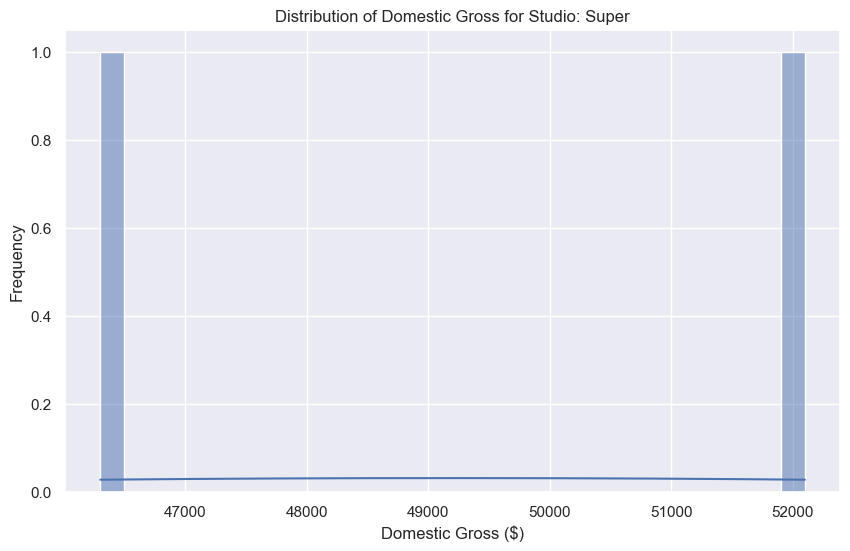

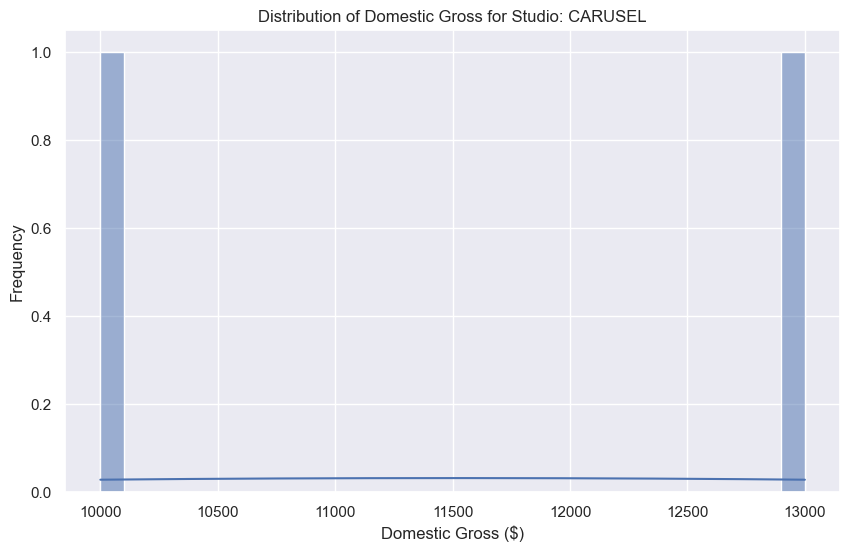

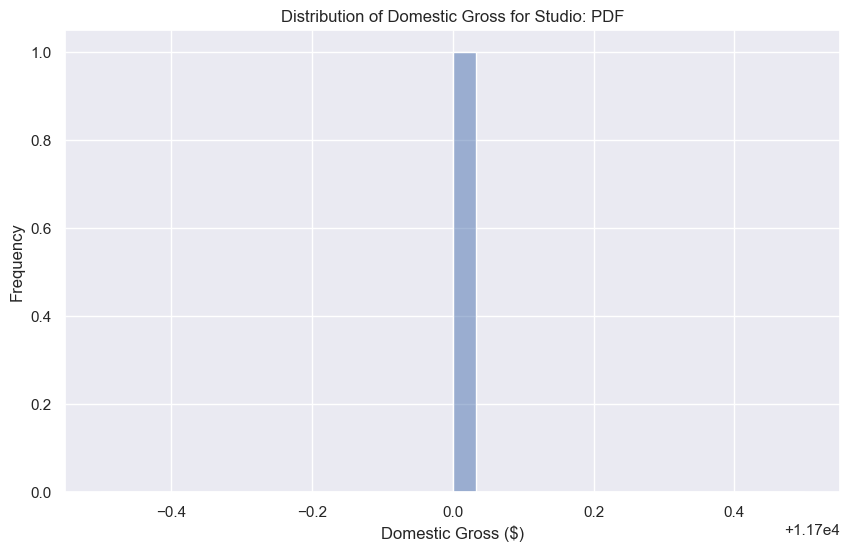

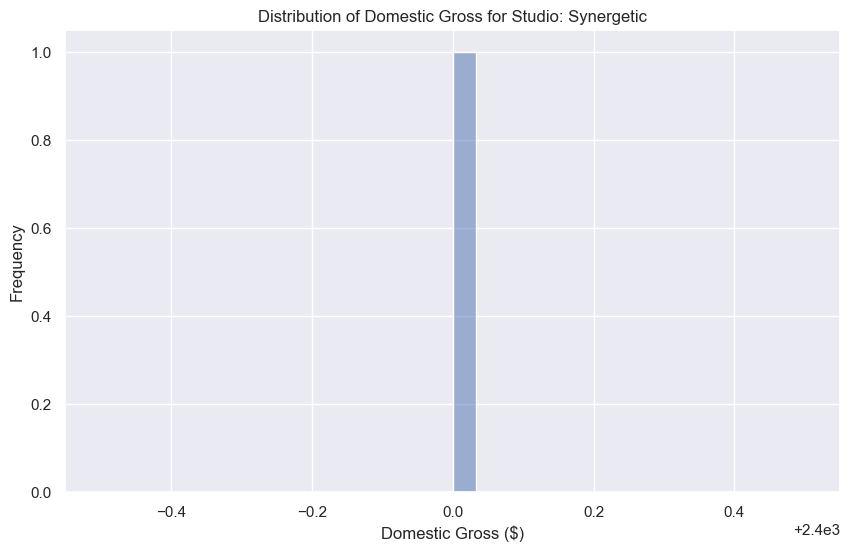

In [36]:
# Separate data based on studio and compare domestic_gross distributions
for studio in movie_gross['studio'].unique():
    subset = movie_gross[movie_gross['studio'] == studio]
    plt.figure(figsize=(10, 6))
    sns.histplot(subset['domestic_gross'], bins=30, kde=True)
    plt.title(f'Distribution of Domestic Gross for Studio: {studio}')
    plt.xlabel('Domestic Gross ($)')
    plt.ylabel('Frequency')
    plt.show()


                domestic_gross  foreign_gross      year
domestic_gross        1.000000       0.767991  0.018708
foreign_gross         0.767991       1.000000  0.145653
year                  0.018708       0.145653  1.000000


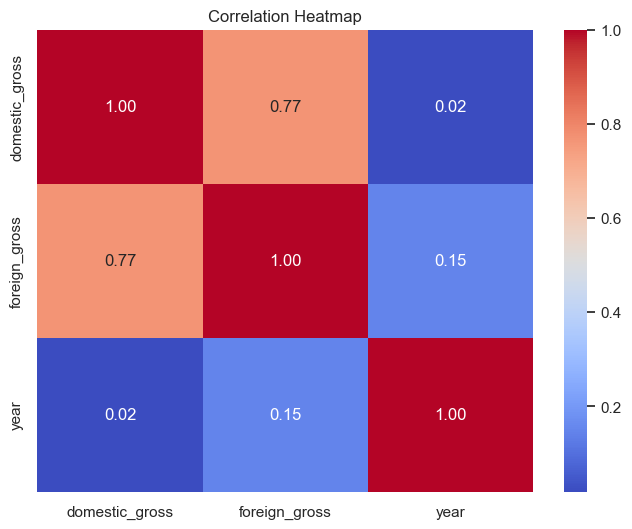

In [38]:
# Clean up the columns by removing commas and converting to float
movie_gross['domestic_gross'] = movie_gross['domestic_gross'].replace({',': ''}, regex=True).astype(float)
movie_gross['foreign_gross'] = movie_gross['foreign_gross'].replace({',': ''}, regex=True).astype(float)

# Now calculate the correlation matrix
correlation_matrix = movie_gross[['domestic_gross', 'foreign_gross', 'year']].corr()
print(correlation_matrix)

# Heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()


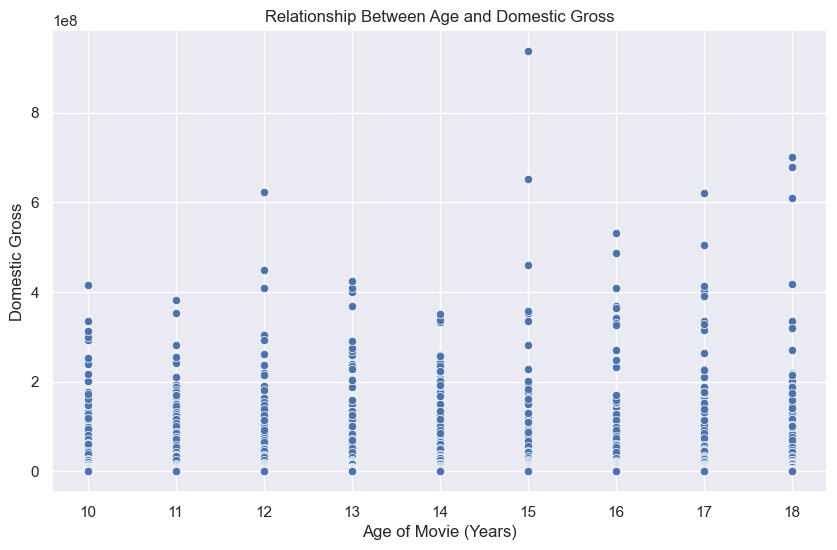

In [39]:
# Assuming 'year' represents the year sold, we'll calculate 'Age' using a hypothetical 'year_built' column
# Here, we'll assume 'year_built' is the year the movie was made. For simplicity, we can assume it's 2000 for now.
movie_gross['year_built'] = 2000  # Adjust according to actual available data if needed
movie_gross['Age'] = movie_gross['year'] - movie_gross['year_built']

# Plot the relationship between 'Age' and 'domestic_gross'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movie_gross, x='Age', y='domestic_gross')
plt.title('Relationship Between Age and Domestic Gross')
plt.xlabel('Age of Movie (Years)')
plt.ylabel('Domestic Gross')
plt.show()


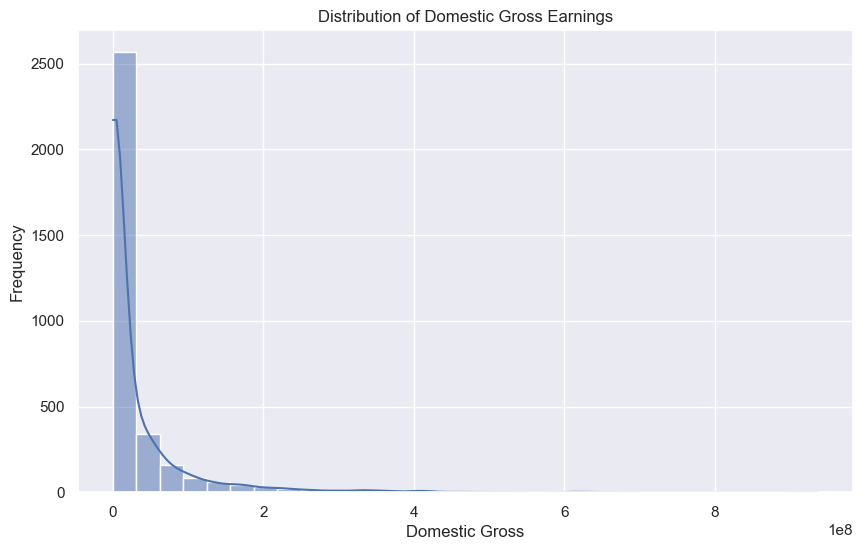

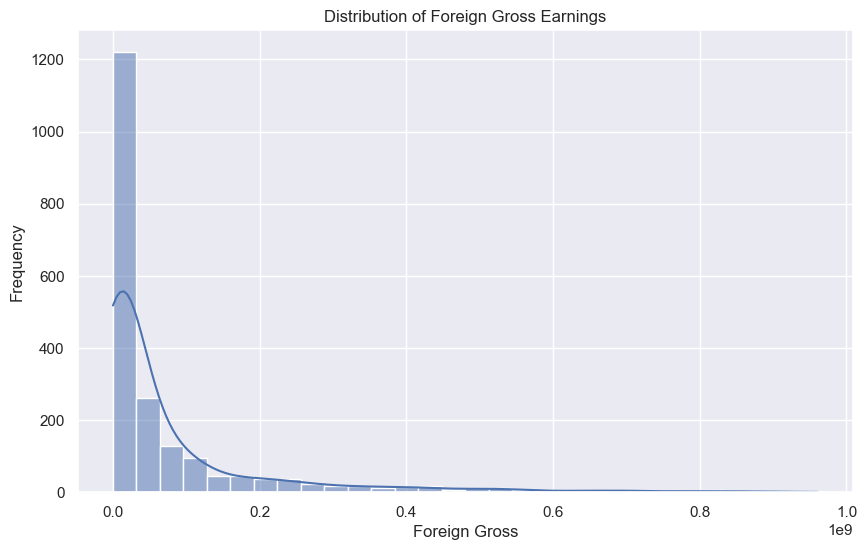

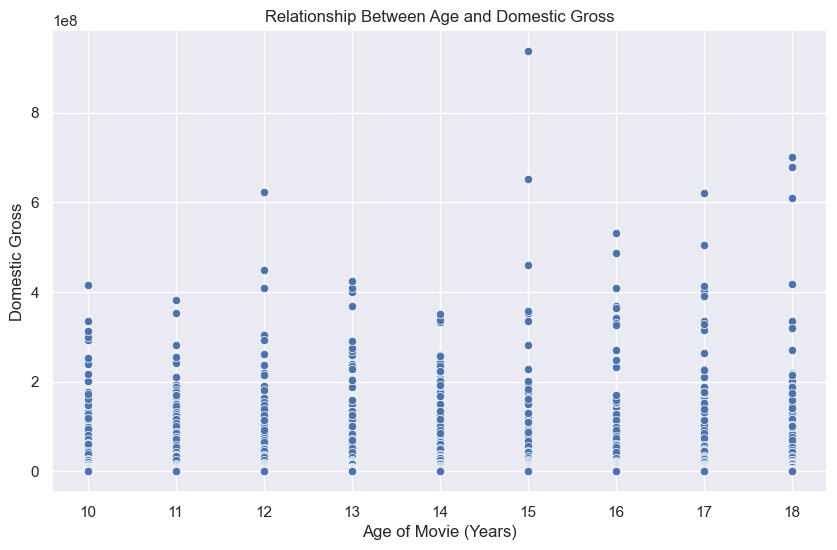

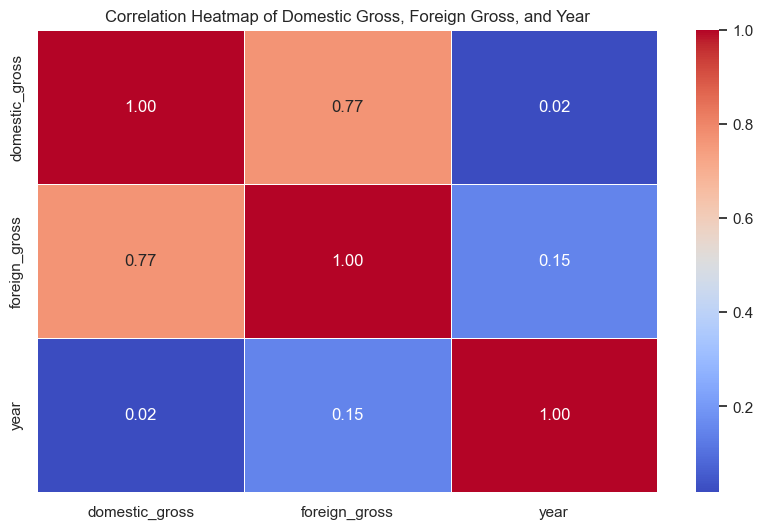

In [40]:
# Histogram of domestic_gross
plt.figure(figsize=(10, 6))
sns.histplot(movie_gross['domestic_gross'], bins=30, kde=True)
plt.title('Distribution of Domestic Gross Earnings')
plt.xlabel('Domestic Gross')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Histogram of foreign_gross
plt.figure(figsize=(10, 6))
sns.histplot(movie_gross['foreign_gross'], bins=30, kde=True)
plt.title('Distribution of Foreign Gross Earnings')
plt.xlabel('Foreign Gross')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Scatterplot of Age vs Domestic Gross
plt.figure(figsize=(10, 6))
sns.scatterplot(data=movie_gross, x='Age', y='domestic_gross')
plt.title('Relationship Between Age and Domestic Gross')
plt.xlabel('Age of Movie (Years)')
plt.ylabel('Domestic Gross')
plt.grid(True)
plt.show()

# Correlation heatmap of selected features
plt.figure(figsize=(10, 6))
correlation_matrix = movie_gross[['domestic_gross', 'foreign_gross', 'year']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Domestic Gross, Foreign Gross, and Year')
plt.show()
